# packages

In [1]:
#importing packages

# Importing patient class and functions
import patientFunctions as ptFn
# Importing Libraries
import os
import pandas as pd
import numpy as np
# import os

# directory

In [2]:
#location of original data
starting_directory = os.getcwd()

machine_directory = 'C:/Users/mcremer' #the C and path to the project folder
# machine_directory = 'C:/Users/maega' #when working from home machine
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '012 Processed Data/data-2024-06-05' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

patient_directory = path

os.chdir(patient_directory)


## saving outputs

In [3]:
#updates to directory management
machine_directory = 'C:/Users/mcremer' #the C and path to the project folder
# machine_directory = 'C:/Users/maega' #when working from home machine
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '014_Mistic2' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

# parent_dir = path
outputDir = path
# os.chdir(outputDir)

In [4]:
folderNameHeader = "Stats"
folderNameCommon = ""
folderNameSuffix = "_250401"

# fileNameHeader_1 = "ALKnownPts"
# fileNameHeader_2 = "ALUnknownPts"
# fileNameCommon = "_EchoAdj_time-comp"
fileNameSuffix = "__250401"

folder_data_out = ptFn.makeFolderPathForData(parent_dir=outputDir, folderName_header=folderNameHeader, 
                                        folderName_common=folderNameCommon, folderName_suffix=folderNameSuffix)
# outputToExcel(*, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, 
#               fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= *)

# fig_file_out = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid=**, 
#                                  fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)

folderNameOut = folder_data_out


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [6]:
mpl.rcParams['figure.dpi'] = 300

# goals of script
To segement data for statistical analysis and perform initial stats.  Looking for list of features that are statistically significantly different between CA+ and CA- patients (what is their relationship to the selected features?).  Also looking for the raw data adjacent to diagnostic imaging: relative time range in our data, statistical comparisons in that dataset.

# importing patient data
full patient class

In [7]:
# #location of original data
# starting_directory = os.getcwd()

# machine_directory = 'C:/Users/mcremer' #the C and path to the project folder
# # machine_directory = 'C:/Users/maega' #when working from home machine
# storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
# project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
# project_lv2_directory = '012 Processed Data/data-2024-06-05' #deeper part of project folder

# path = os.path.join(machine_directory, storage_directory, 
#                     project_directory, project_lv2_directory)

# patient_directory = path

# os.chdir(patient_directory)


In [8]:
#importing patient data as dictionaries of dataframes

#build a dictionary of patients and their values 
ptFiles = ptFn.GetListofPTfiles(patient_directory, '.xlsx', 'data')

# patientDictAmyloid = {}
# patientDictSurvival = {}
# patientDictLabs = {}
# patientDictEcho = {}
# patientDictNotes = {}
# patientDictDx = {}
# patientDictVitalStatus = {}
# patientDictSex = {}
# patientDictAge = {}
# patientDictChemo = {}
# patientDictImmuno = {}
# patientDictHeme = {}
# patientDictRad = {}
# patientDictOther = {}

patientDictionary = {}

#loop through the listOfPatients 
for file in ptFiles: 
    pt = ptFn.patient(patient_directory, file, 4)
    patientDictionary[pt.ptID] = pt
    # patientDictAmyloid[pt.ptID] = pt.amyloid_status
    # patientDictSurvival[pt.ptID] = pt.survival
    # patientDictLabs[pt.ptID] = pt.labsData
    # patientDictEcho[pt.ptID] = pt.echoData
    # patientDictNotes[pt.ptID] = pt.MDnotes
    # patientDictDx[pt.ptID] = pt.dx
    # patientDictVitalStatus[pt.ptID] = pt.vitalStatus
    # patientDictSex[pt.ptID] = pt.sex
    # patientDictAge[pt.ptID] = pt.ageDx
    # patientDictChemo[pt.ptID] = pt.ChemoTx
    # patientDictImmuno[pt.ptID] = pt.ImmunoTx
    # patientDictHeme[pt.ptID] = pt.HemeTx
    # patientDictRad[pt.ptID] = pt.RadTx
    # patientDictOther[pt.ptID] = pt.OtherTx

In [9]:
print(patientDictionary.keys())

dict_keys(['A-02', 'A-03', 'B-01', 'B-02', 'B-03', 'C-01', 'C-02', 'C-03', 'D-01', 'D-03', 'E-01', 'E-02', 'E-03', 'F-01', 'F-02', 'F-03', 'G-01', 'G-02', 'G-03', 'H-01', 'H-02', 'H-03', 'I-01', 'I-02', 'I-03', 'J-01', 'J-02', 'J-03', 'K-01', 'K-02', 'K-03', 'L-01', 'L-02', 'L-03', 'M-01', 'M-02', 'M-03', 'N-01', 'N-02', 'N-03', 'O-01', 'O-02', 'O-03', 'P-01', 'P-02', 'P-03', 'Q-01', 'Q-02', 'Q-03', 'R-01', 'R-02', 'R-03', 'S-02', 'T-01', 'T-02', 'U-01', 'U-02', 'V-01', 'V-02', 'W-01', 'W-02', 'X-01', 'X-02', 'Y-01', 'Y-02', 'Z-01', 'Z-02'])


In [10]:
#removing patients that were excluded from the dataset
del patientDictionary['K-01']
del patientDictionary["G-01"]
del patientDictionary['J-01']
del patientDictionary["L-02"]


In [11]:
#list of patients by amyloid status 

listPositive = []
listNegative = []
listOther = []

# ptFn.getListSortedByAmyloid(patientDictAmyloid, listPositive= listPositive,
#                        listNegative=listNegative, listOther=listOther)

for ptID in patientDictionary.keys(): 
    #get the amyloid status
    pt_amyloid_status = patientDictionary[ptID].amyloid_status
    if pt_amyloid_status == "yes": 
        listPositive.append(ptID)
    elif pt_amyloid_status == "no":
        listNegative.append(ptID)
    else:
        listOther.append(ptID)


#first make a copy of the list
listALKnown = listPositive.copy()
#add the negative patients to the list of positive patients
listALKnown.extend(listNegative) 

# Importing Echo Adj features

In [12]:
os.chdir(outputDir)

In [13]:
EchoAdjInput = pd.read_excel("DFsForSVM_EchoAdj_time-comp_250317\AL-KnownPts_EchoAdj_time-comp_1Sheet__250317.xlsx", sheet_name="ALL", index_col= 'DeID')

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\mcremer\AppData\Local\Temp\ipykernel_16852\3385830510.py:1: SyntaxWarning: invalid escape sequence '\A'
  EchoAdjInput = pd.read_excel("DFsForSVM_EchoAdj_time-comp_250317\AL-KnownPts_EchoAdj_time-comp_1Sheet__250317.xlsx", sheet_name="ALL", index_col= 'DeID')


In [14]:
len(listALKnown)

44

In [15]:
#removing the penalty information, from all columns but the relative time column
reltime_col= EchoAdjInput["RelTime(Days)"]
EchoAdjInput= EchoAdjInput.replace(-1, np.nan) #-1 was the penalty value used for missing data
EchoAdjInput["RelTime(Days)"] = reltime_col #adding the time info back

## time of echo

In [16]:
imagingDates = {}
dict_imagingDates_Days = {}
for ptID in patientDictionary.keys():
    ptEchoData = patientDictionary[ptID].echoData
    patientEchoDate = ptEchoData.at[0,"time from diagnosis to first echo (months)"]
    patientMRIDate = ptEchoData.at[0, 'time from dagnosis to MRI (months)']

    if type(patientEchoDate) != str and np.isnan(patientEchoDate) == False:
        imagingDates[ptID] = patientEchoDate
        #convert from months to days
        dict_imagingDates_Days[ptID] = patientEchoDate * 30

    #only if the patient doesn't have an echo date do you check for an MRI date
    elif type(patientMRIDate) != str and np.isnan(patientMRIDate) == False:
        imagingDates[ptID] = patientMRIDate
        #convert from months to days
        dict_imagingDates_Days[ptID] = patientMRIDate * 30
    else: 
        print(ptID + " has no imaging data")
        print(ptID + " amyloidosis status " + patientDictionary[ptID].amyloid_status )


U-02 has no imaging data
U-02 amyloidosis status unk


## difference in time

In [17]:
timeDiff = {}
for ptID in EchoAdjInput.index:
    timeDiff[ptID] = EchoAdjInput.loc[ptID, "RelTime(Days)"]- dict_imagingDates_Days[ptID].astype(int)

timeDiff_df = pd.DataFrame.from_dict(timeDiff, orient = "index", columns= ["time_diff"])

In [18]:
print("How long after imaging were labs collected? Negative numbers are labs collected before imaging. \n"
    "min: " ,  min(timeDiff.values()) , " days"
    "\nmax: " , max(timeDiff.values()), " days")

How long after imaging were labs collected? Negative numbers are labs collected before imaging. 
min:  -56  days
max:  706  days


In [19]:
Echo_forAnalysis = pd.concat([EchoAdjInput, timeDiff_df], axis=1)

In [20]:
timeDiff_df.describe()

time_diff
count   44.000000
mean    17.454545
std    109.236985
min    -56.000000
25%     -2.500000
50%      0.000000
75%      1.000000
max    706.000000

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
timeDiff_df.loc[listPositive]

time_diff
B-02          2
C-03          0
E-01         -7
E-02         45
F-03        706
G-02          0
I-01          5
I-03        -28
J-02          0
K-02        -10
M-02          0
N-03          0
O-03        101
Q-02          0
Q-03        -21
T-01         -1
V-02          1
W-01        -11
X-01         84
X-02         -7
Y-02         44

Text(0.5, 1.0, 'lab time since diagnostic imaging')

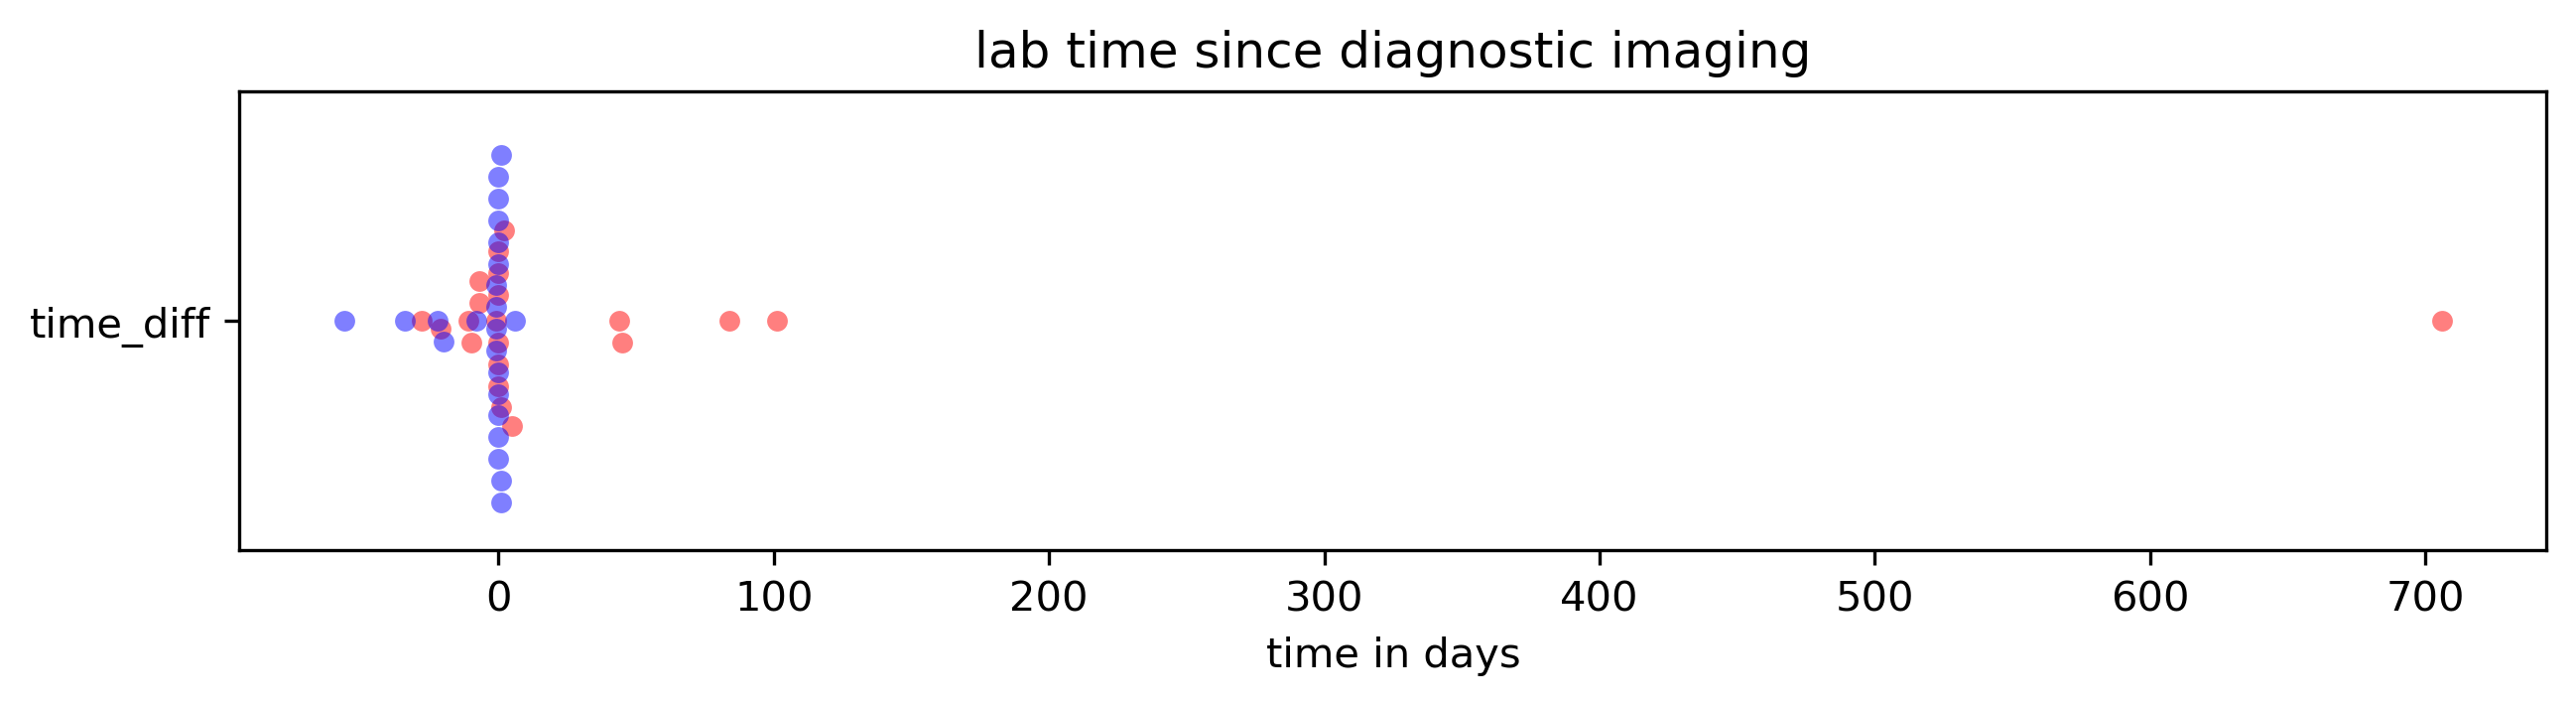

In [23]:
fig, axs = plt.subplots(figsize=(10,2))
sns.swarmplot(timeDiff_df.loc[listPositive], color = 'red', alpha = 0.5, ax= axs, orient='h')
# # sns.boxplot(timeDiff_df.loc[listPositive], color = 'red', ax= axs, orient='h')
sns.swarmplot(timeDiff_df.loc[listNegative], color = 'blue', alpha = 0.5, ax= axs, orient='h')

plt.xlabel("time in days")
plt.title("lab time since diagnostic imaging")
# sns.swarmplot(Echo_forAnalysis, x = 'time_diff', y = 'Amyloid Status_yes', hue='Amyloid Status_yes')

In [24]:
EchoAdjInput_describe = EchoAdjInput.describe().T

In [25]:
EchoAdjInput_describe

count         mean          std  \
Amyloid Status_no                         44.0     0.522727     0.505258   
Amyloid Status_unk                        44.0     0.000000     0.000000   
Amyloid Status_yes                        44.0     0.477273     0.505258   
Dx_MGUS                                   44.0     0.363636     0.486607   
Dx_MM                                     44.0     0.545455     0.503686   
Dx_other                                  44.0     0.090909     0.290803   
Sex_female                                44.0     0.386364     0.492545   
Sex_male                                  44.0     0.613636     0.492545   
Age                                       44.0    62.954545    10.270650   
Survival (in months)                      44.0    29.059091    25.769318   
ChemoTx                                   44.0     0.454545     0.503686   
ChemoTx Number                            44.0     1.136364     1.549057   
ImmunoTx                                  44.0     0.250000     0.438019   
ImmunoTx Number                           44.0     0.363636     0.718231   
HemeTx                                    44.0     0.181818     0.390154   
HemeTx Number                             44.0     0.181818     0.390154   
RadTx                                     44.0     0.022727     0.150756   
RadTx Number                              44.0     0.022727     0.150756   
OtherTx                                   44.0     0.022727     0.150756   
OtherTx Number                            44.0     0.045455     0.301511   
RelTime(Days)                             44.0   333.613636   704.104485   
ALT Result(U/L)                           32.0    30.531250    33.621215   
AST Result(U/L)                           33.0    30.969697    26.082184   
Albumin Electrophoresis Result            28.0     5.325000     9.066692   
Albumin Result(gm/dL)                     34.0     3.529412     0.907721   
BUN Result(mg/dL)                         37.0    22.756757    12.300419   
Beta-2-Microglobulin Result               27.0     4.259259     3.402856   
Calcium Result(mg/dL)                     36.0     8.872222     0.718972   
Chloride Result(mmol/L)                   36.0   101.722222     5.327080   
Creatinine Result(mg/dL)                  37.0     1.516216     1.148311   
Ferritin Result(ng/mL)                    14.0   539.214286   555.880200   
Glucose Result                            36.0   101.833333    22.515392   
HCT Result                                38.0    36.402632     5.232254   
Hemoglobin Result                         39.0    12.056410     1.813371   
Kappa Free Light Chains Result (mg/L)     29.0   101.756897   169.506193   
LDH Result(U/L)                           28.0   245.107143    80.717312   
MCH Result(pg)                            38.0    30.218421     2.420281   
MCHC Result                               38.0    33.126316     1.141995   
MCV Result                                38.0    91.221053     6.497865   
Monocyte Result                           36.0     0.631111     0.362852   
Neutrophil Result                         36.0     4.987222     2.904532   
Nucleated RBC Result                      36.0     0.011111     0.043738   
Pct. Immature Gran Auto Result            32.0     0.650000     0.867700   
Pct. Mono Result                          36.0     8.838889     3.395146   
Pct. Neutrophil Result                    36.0    65.586111    13.182351   
Platelet Count Result(k/uL)               39.0   218.102564   101.311608   
Potassium Result(mmol/L)                  36.0     4.244444     0.510711   
RBC Result                                38.0     4.001316     0.583934   
Serum Electrophoresis Alpha 1 Result      28.0     0.514286     0.844027   
Serum Electrophoresis Alpha 2 Result      28.0     1.710714     4.064511   
Serum Electrophoresis Beta Result         28.0     1.282143     2.511021   
Serum Electrophoresis Gamma Result        28.0     1.085714     1.392231   
Sodium Result

In [26]:
dict_plottingRanges = {"graph 1": [0, 1],
                       "graph 2": [2, 10],
                       "graph 3": [11, 50],
                       "graph 4": [51, 100],
                       "graph 5": [101, 400],
                       "graph 6" : [401, 1000],
                       "graph 7": [1000, 10000]}
dict_graph_column_groups = {}
for graph in dict_plottingRanges.keys(): 
    a, b = dict_plottingRanges[graph][0], dict_plottingRanges[graph][1]
    dict_graph_column_groups[graph] = [data for data in EchoAdjInput_describe.index 
                                       if EchoAdjInput_describe.loc[data, "mean"] > a and 
                                       EchoAdjInput_describe.loc[data,'mean'] < b]

In [27]:
#fixing the available data for the ploting by removing columns from the descriptive stats before making list of features for plotting

EchoAdj_forPlot = EchoAdjInput_describe.T.drop(columns = ['Amyloid Status_yes', 
                                                   'Amyloid Status_no','Amyloid Status_unk', 'Dx_other',
                                                   'Dx_MM', 'Dx_MGUS','Sex_female','Sex_male', 'OtherTx Number',
                                                   'HemeTx Number', 'RadTx Number', 'ImmunoTx Number', 'ChemoTx Number',
                                                   "OtherTx", "HemeTx", "ImmunoTx", "ChemoTx", "RadTx", "Age", "Survival (in months)",
                                                   "RelTime(Days)"]).T


In [28]:
dict_plottingRanges = {"graph 1": [0, 1],
                       "graph 2": [2, 10],
                       "graph 3": [11, 50],
                       "graph 4": [51, 100],
                       "graph 5": [101, 400],
                       "graph 6" : [401, 1000],
                       "graph 7": [1000, 10000]}
dict_graph_column_groups = {}
for graph in dict_plottingRanges.keys(): 
    a, b = dict_plottingRanges[graph][0], dict_plottingRanges[graph][1]
    dict_graph_column_groups[graph] = [data for data in EchoAdj_forPlot.index 
                                       if EchoAdj_forPlot.loc[data, "mean"] > a and 
                                       EchoAdj_forPlot.loc[data,'mean'] < b]

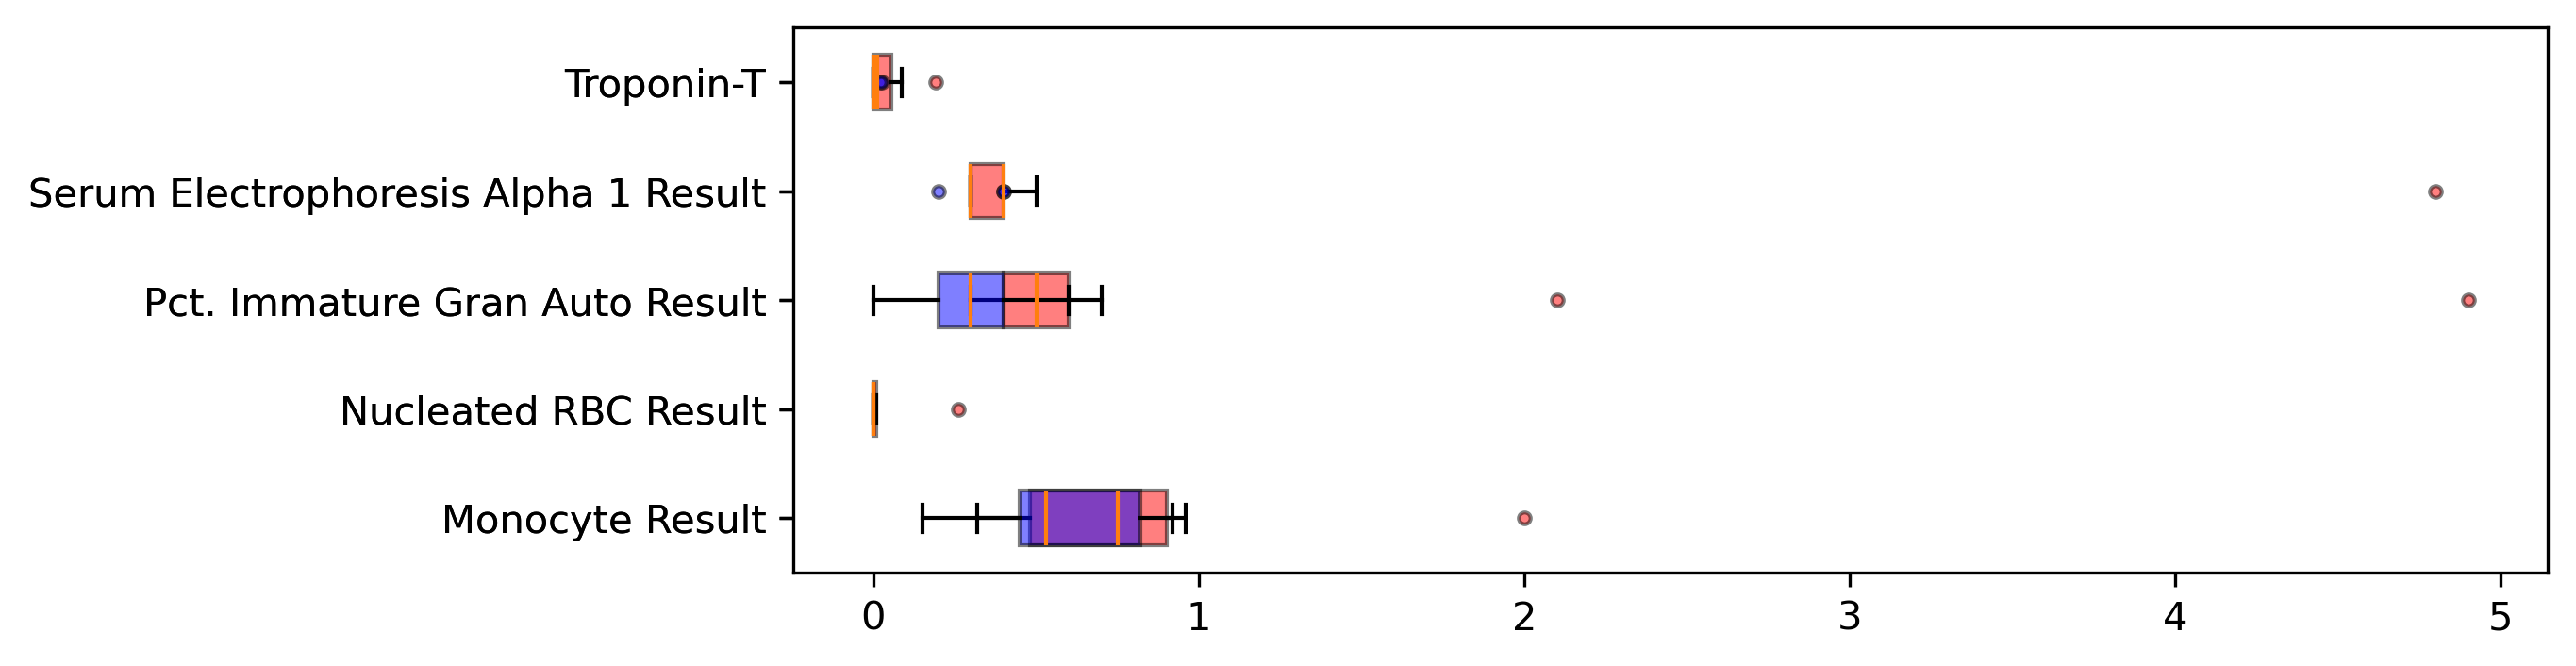

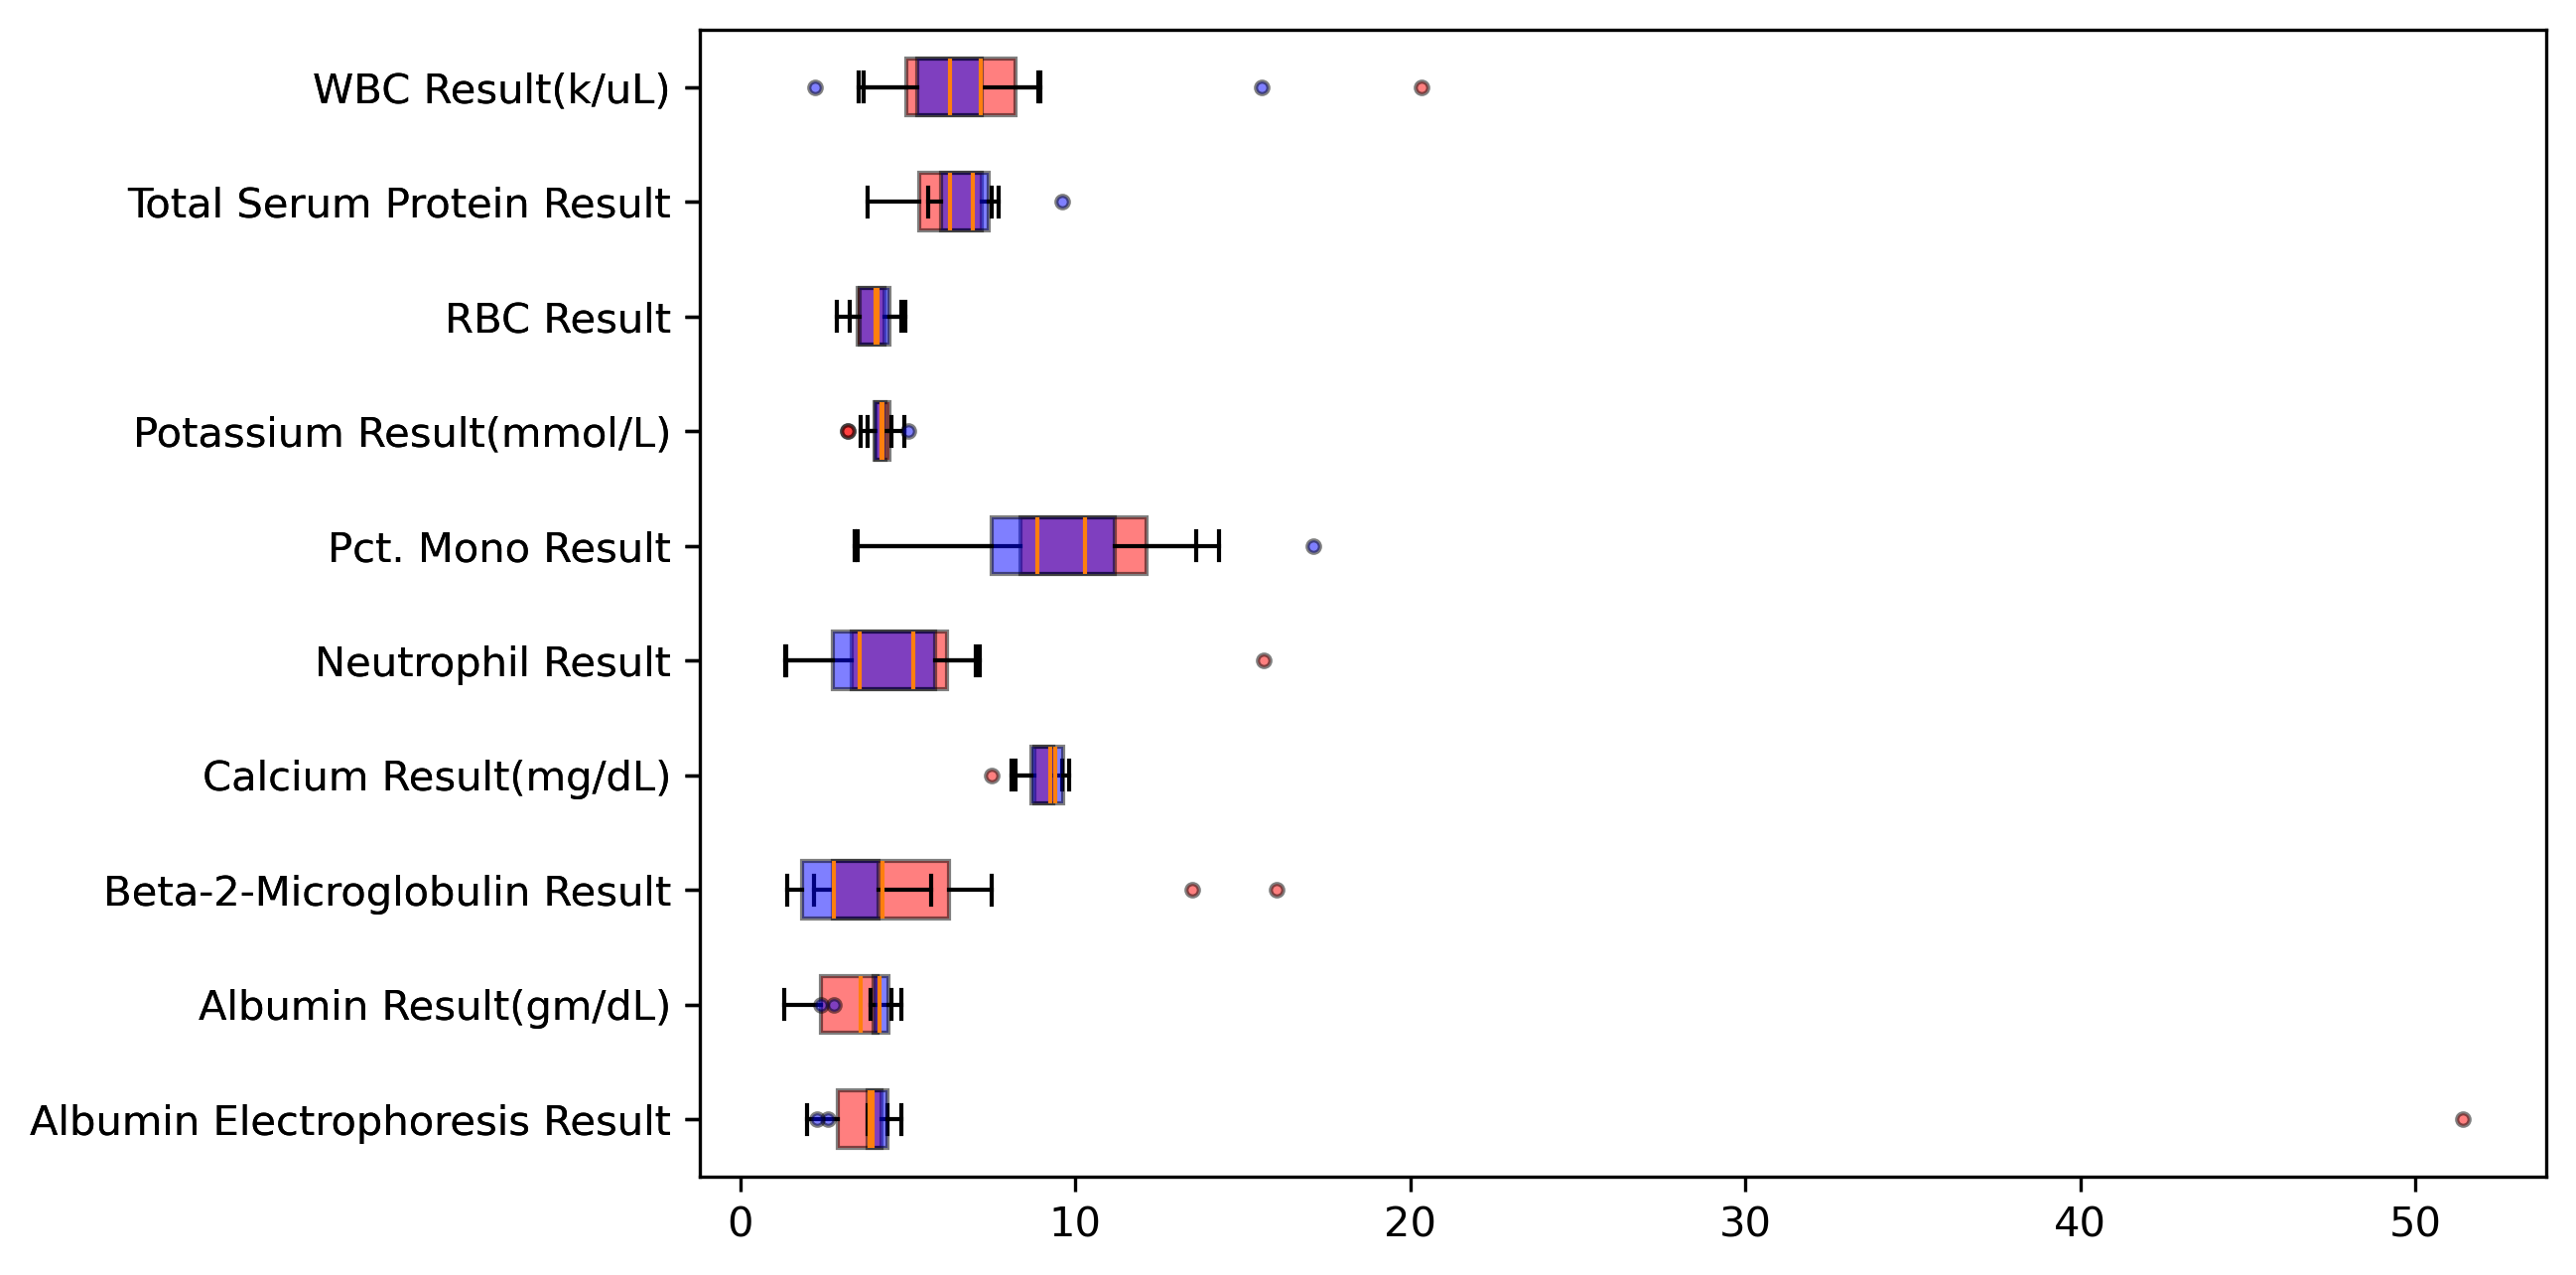

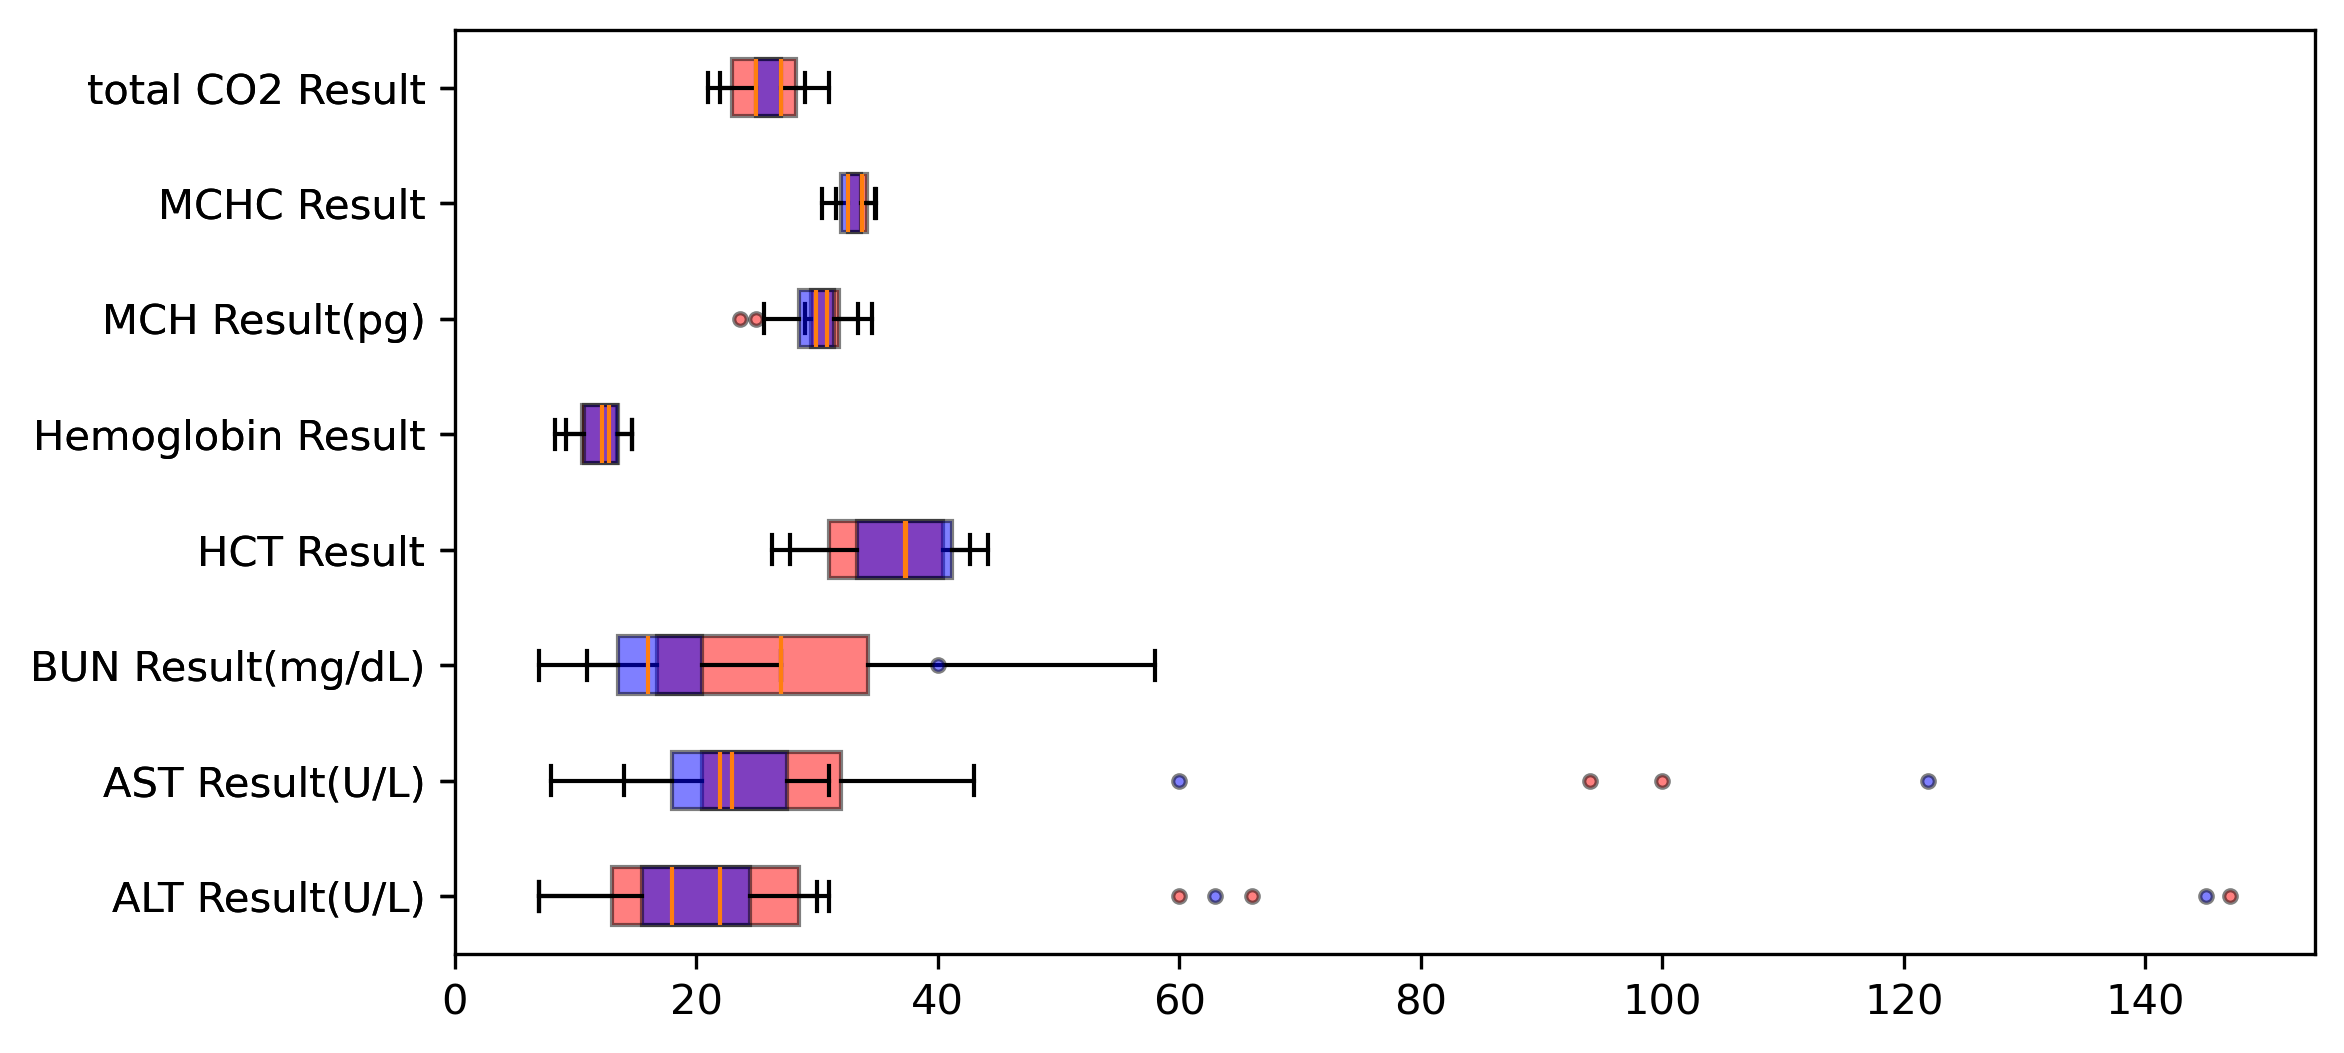

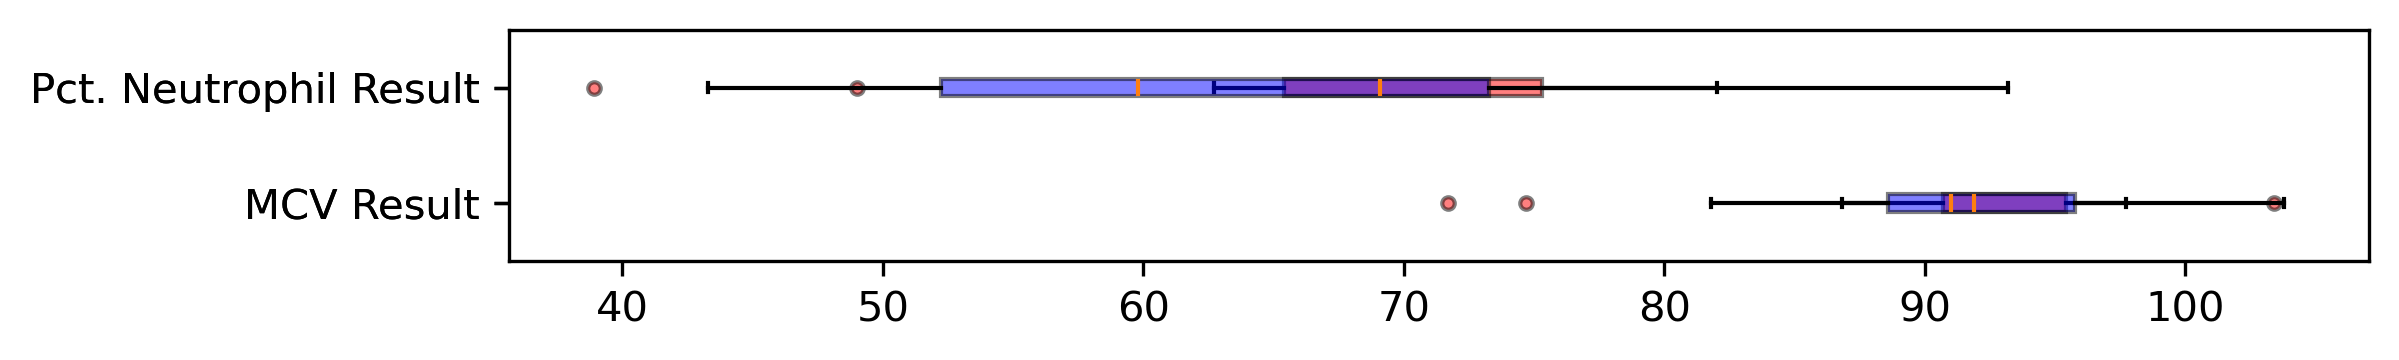

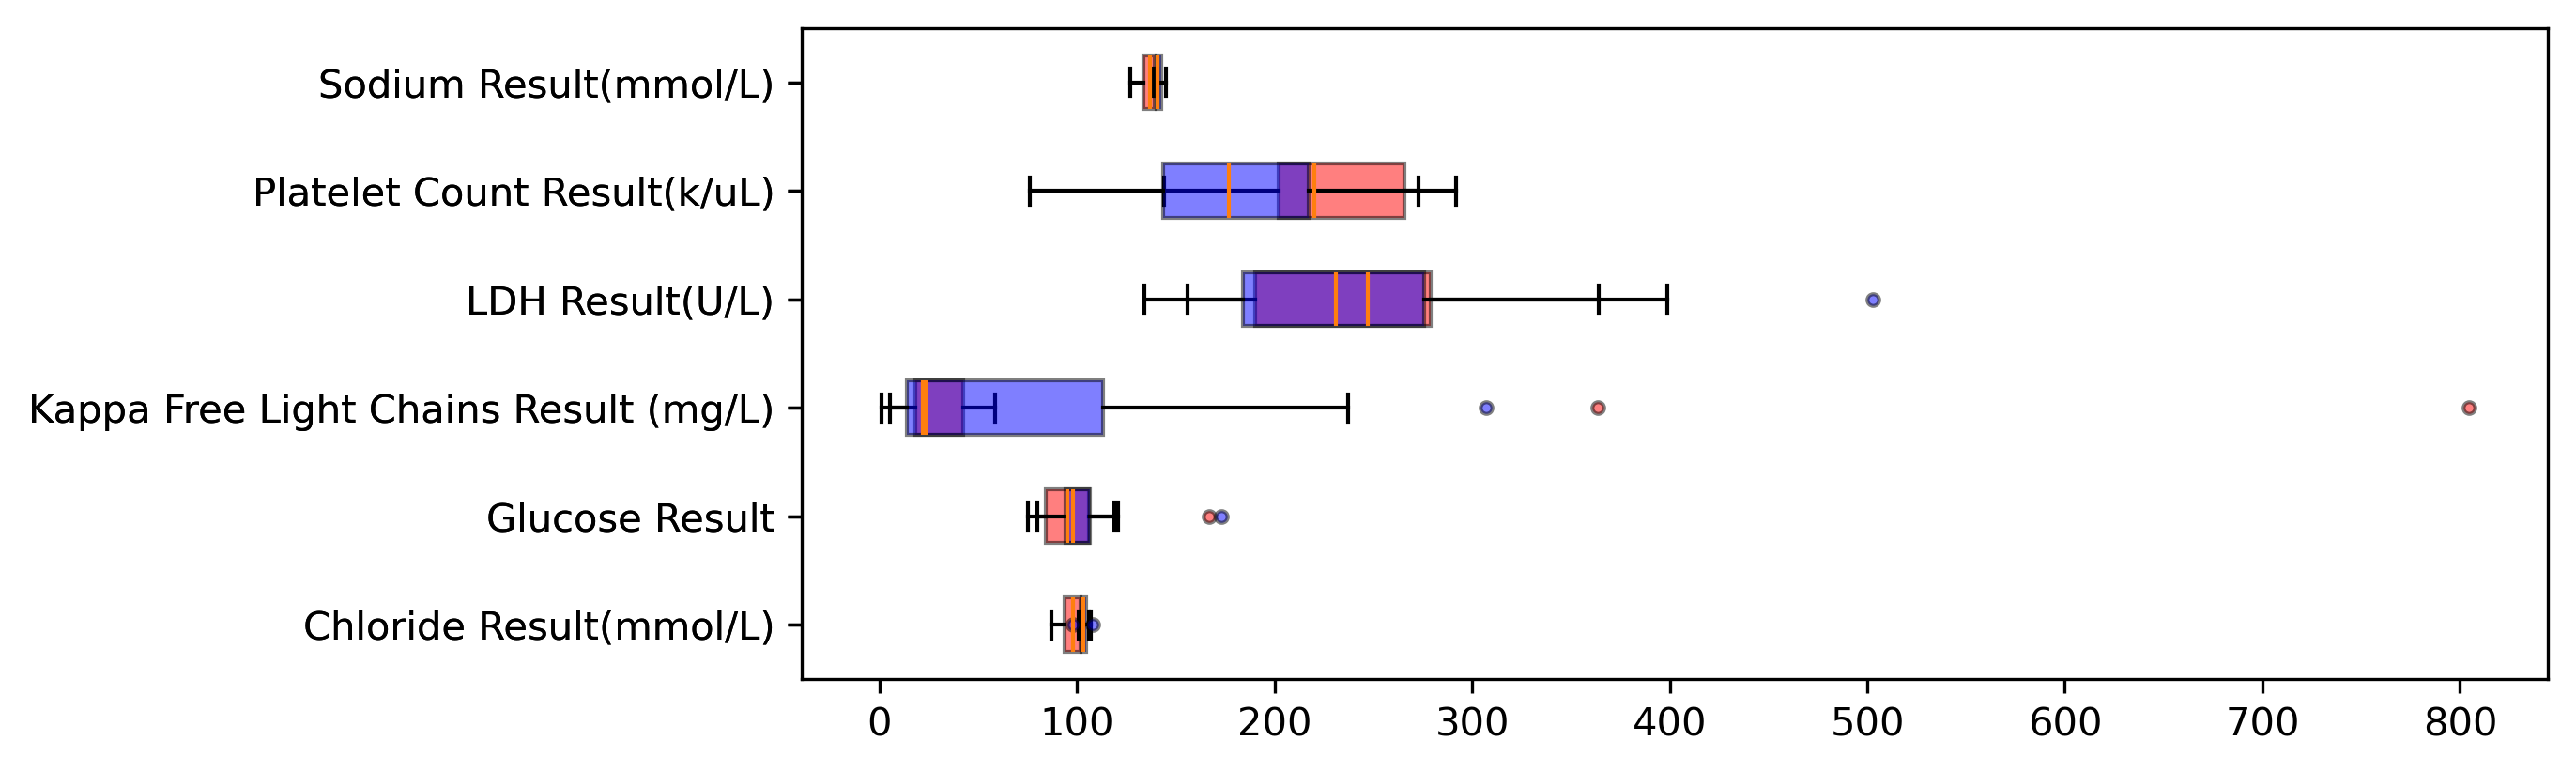

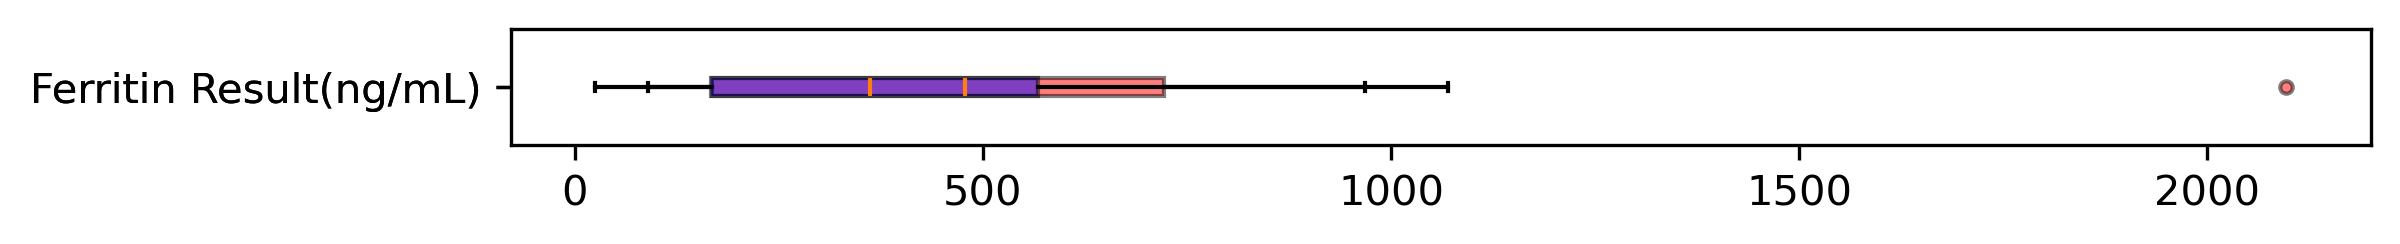

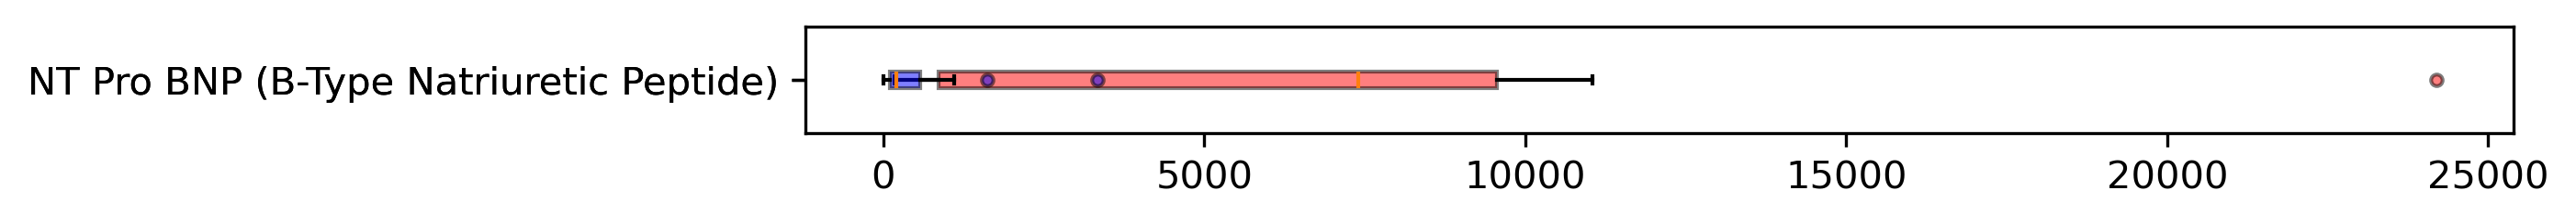

In [29]:
#sorting the for analysis by amyloid status 
figHeight = 0.5
for graph in dict_graph_column_groups.keys():
    #then plot the different pieces of data 
    fig, axs = plt.subplots(figsize = (8, len(dict_graph_column_groups[graph])*figHeight))
    plt.boxplot(Echo_forAnalysis.loc[listPositive][dict_graph_column_groups[graph]].dropna(),
                 vert= False, labels=dict_graph_column_groups[graph], patch_artist=True,
                  boxprops={"facecolor":"red", "alpha":0.5},
                  flierprops = {"marker" : '.', "markersize" : 6, "markerfacecolor" :'red', "alpha": 0.5})
    plt.boxplot(Echo_forAnalysis.loc[listNegative][dict_graph_column_groups[graph]].dropna(),
                vert= False, labels=dict_graph_column_groups[graph], patch_artist=True,
                boxprops={"facecolor":"blue", "alpha":0.5},
                flierprops = {"marker" : '.', "markersize" : 6, "markerfacecolor" :'blue', "alpha": 0.5})
    

## attempt bee swarm plot of the above

In [30]:
EchoAdjInput["DeID"]= EchoAdjInput.index

In [31]:
from sklearn.preprocessing import StandardScaler


In [32]:
EchoAdj_StandardScalar = StandardScaler().fit(EchoAdjInput[EchoAdj_forPlot.index]).transform(EchoAdjInput[EchoAdj_forPlot.index])
EchoAdj_StandardScalar_df = pd.DataFrame(EchoAdj_StandardScalar)

In [33]:
EchoAdj_StandardScalar_df.index = EchoAdjInput.index
EchoAdj_StandardScalar_df.columns = EchoAdj_forPlot.index
EchoAdj_StandardScalar_df["Amyloid Status_yes"]= EchoAdjInput["Amyloid Status_yes"]

<>:2: SyntaxWarning: invalid escape sequence '\E'
<>:2: SyntaxWarning: invalid escape sequence '\E'
C:\Users\mcremer\AppData\Local\Temp\ipykernel_16852\3185932904.py:2: SyntaxWarning: invalid escape sequence '\E'
  stats_df = pd.read_excel("060_output_analysis\EchoAdj-T-test_results_250401.xlsx", index_col=0, header=[1, 2])
c:\Users\mcremer\.conda\envs\BEAT_Labs_20240917_v2\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mcremer\.conda\envs\BEAT_Labs_20240917_v2\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mcremer\.conda\envs\BEAT_Labs_20240917_v2\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 46.2% of the points cannot be placed; you may want to decrease t

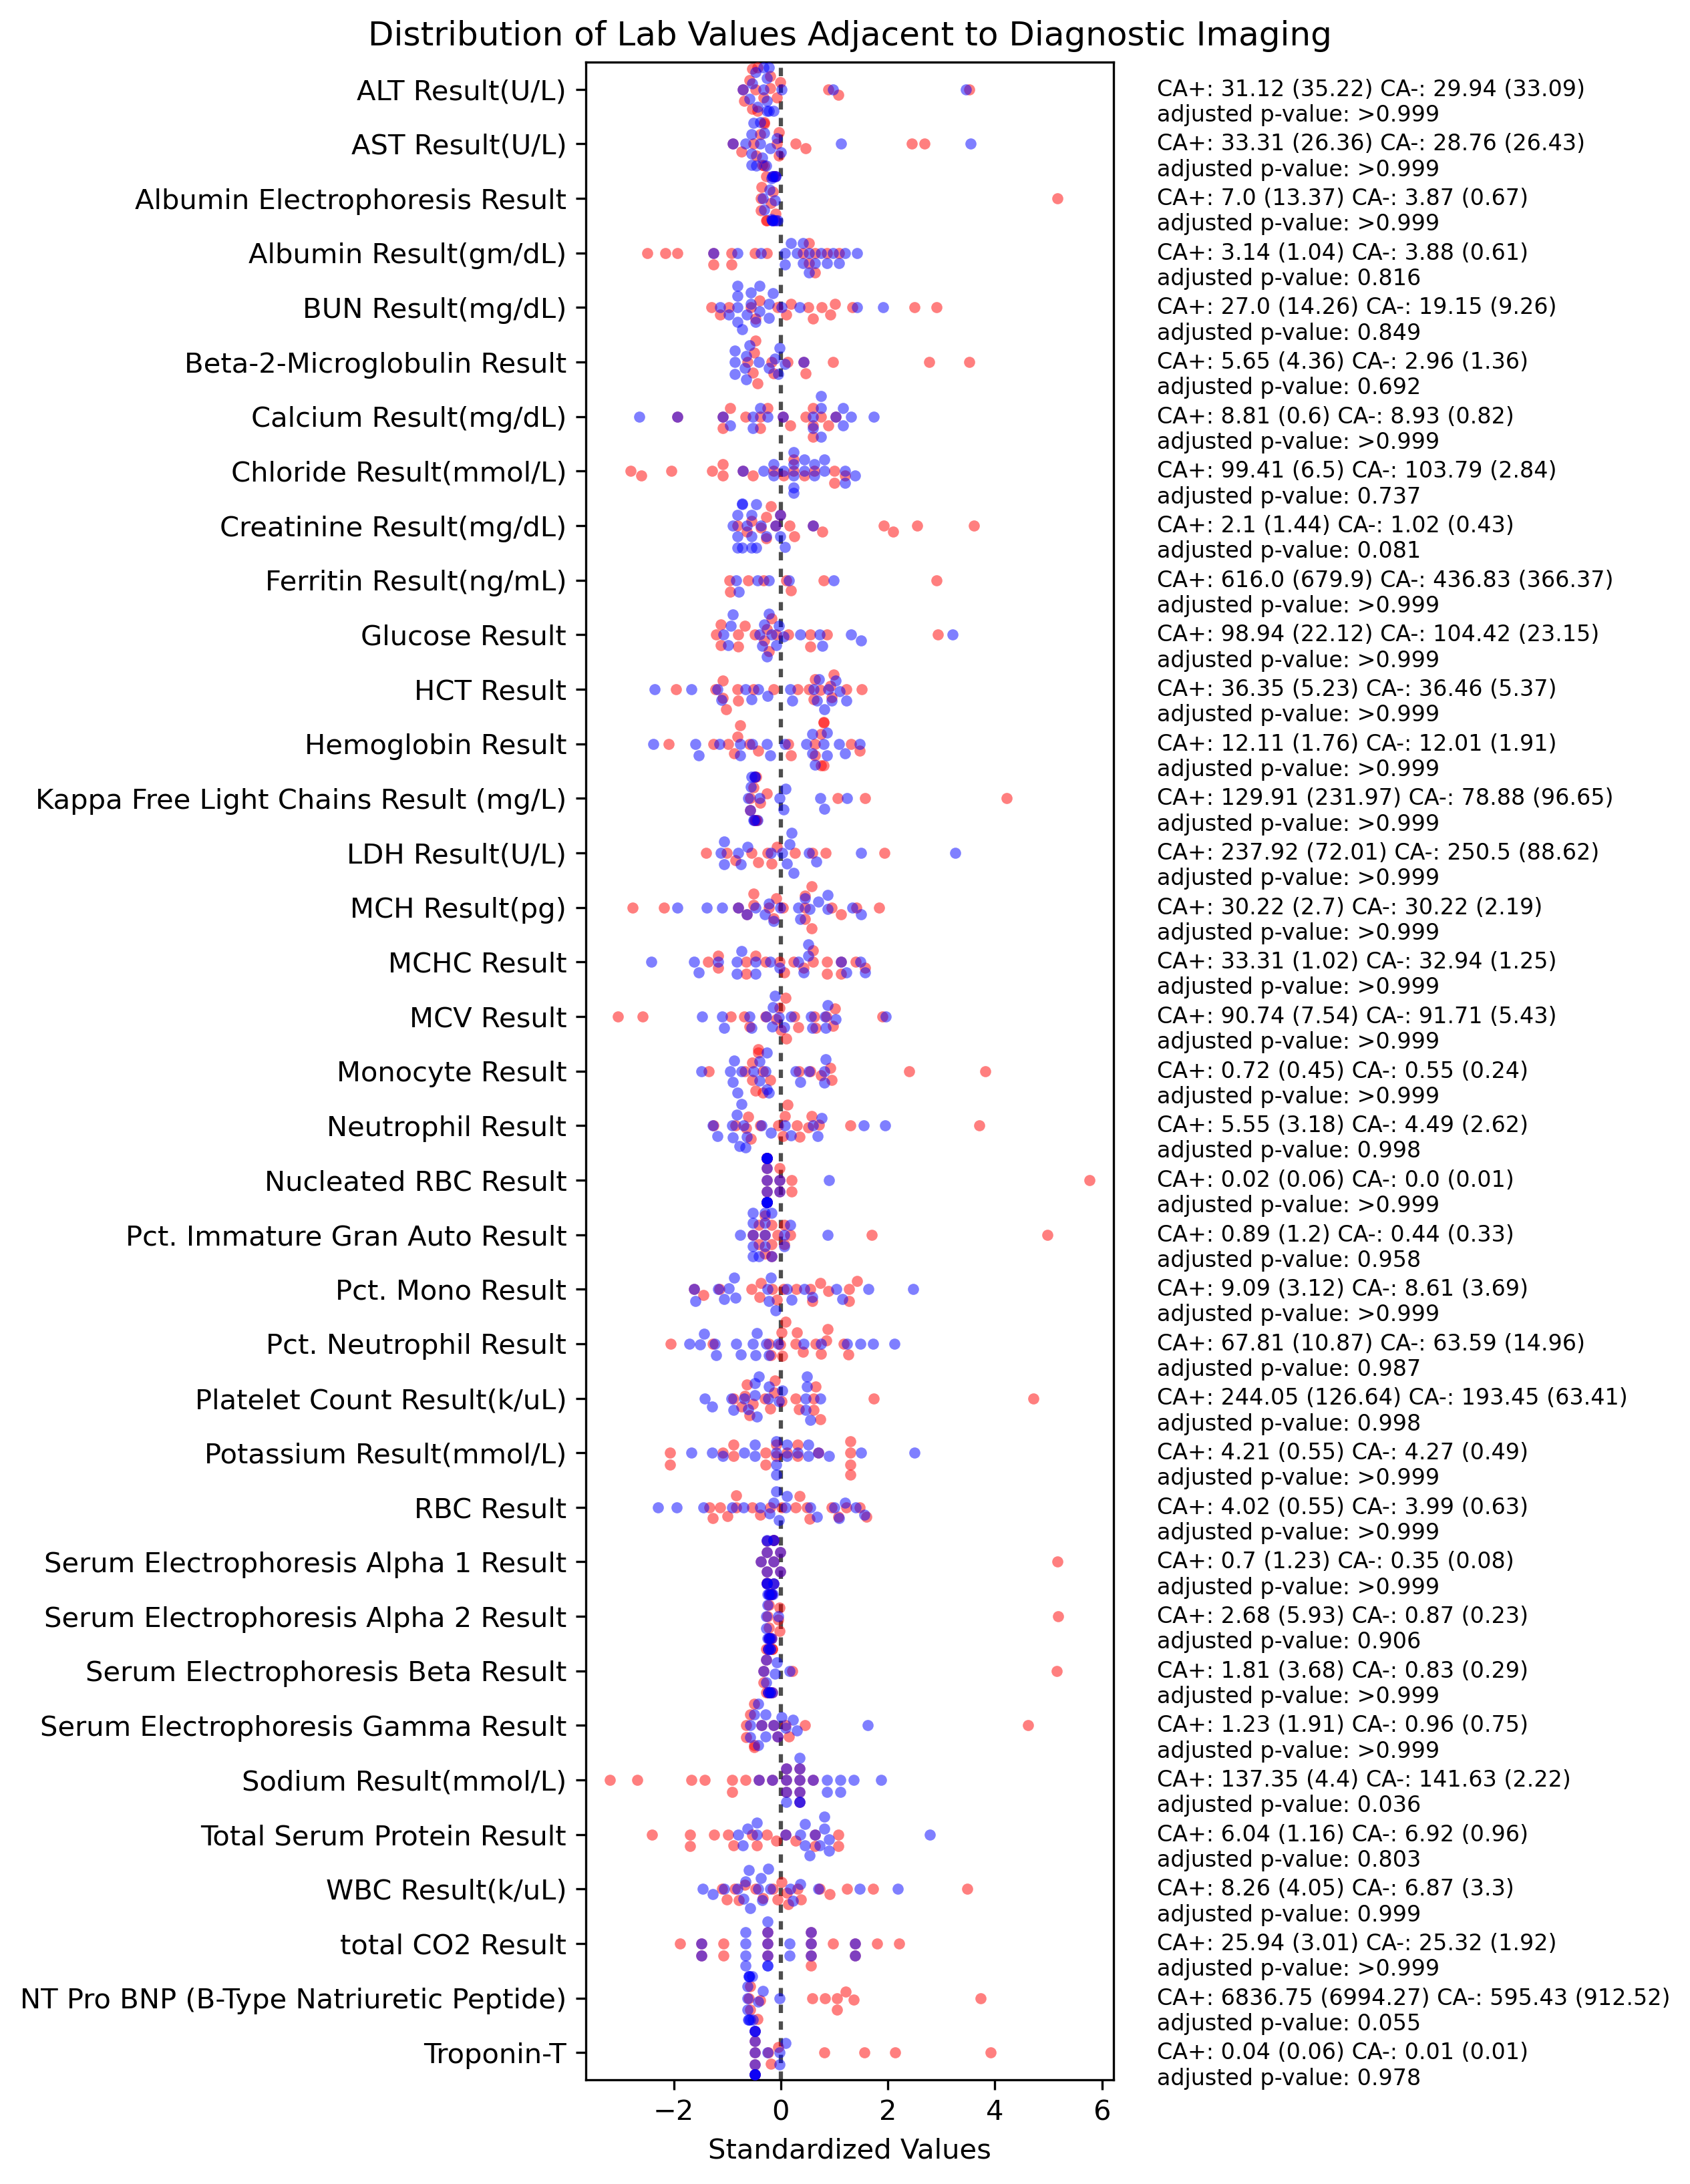

In [34]:
# Importing the statistics from an external Excel file
stats_df = pd.read_excel("060_output_analysis\EchoAdj-T-test_results_250401.xlsx", index_col=0, header=[1, 2])
stats_df.columns = ['_'.join(col).strip() for col in stats_df.columns.values]
stats_df["feature"] = stats_df.index

# Creating a two-panel figure
fig, axs = plt.subplots(1, 2, figsize=(8, 11), gridspec_kw={'width_ratios': [2, 1]})

# Left panel: Swarm plot
sns.swarmplot(EchoAdj_StandardScalar_df.drop(columns=['Amyloid Status_yes']).loc[listPositive], 
              color='red', orient='h', size=4, alpha=0.5, ax=axs[0])
sns.swarmplot(EchoAdj_StandardScalar_df.drop(columns=['Amyloid Status_yes']).loc[listNegative], 
              color='blue', orient='h', size=4, alpha=0.5, ax=axs[0])
axs[0].axvline(0, color=".3", dashes=(2, 2))
axs[0].set_title("Distribution of Lab Values Adjacent to Diagnostic Imaging")
axs[0].set_xlabel("Standardized Values")

# Right panel: Text of statistics
for i, feature in enumerate(stats_df.index.dropna()):
    ca_plus_mean = round(stats_df.loc[feature, 'CA+_mean'], 2)
    ca_plus_std = round(stats_df.loc[feature, "CA+_std"], 2)
    ca_minus_mean = round(stats_df.loc[feature, "CA-_mean"], 2)
    ca_minus_std = round(stats_df.loc[feature, "CA-_std"], 2)
    pvalue = stats_df.loc[feature, "adjusted p-value_adjusted p-value"]
    if not isinstance(pvalue, str):
        pvalue = round(pvalue, 3)
    # axs[1].text(0.05, 0.99 - i / len(stats_df), 
    #             f"{feature}\nCA+: {ca_plus_mean} ({ca_plus_std}) CA-: {ca_minus_mean} ({ca_minus_std})\nadjusted p-value: {pvalue}", 
    #             va='center', ha='left', fontsize=8, color='black', transform=axs[1].transAxes, in_layout=True)
    axs[1].text(0.05, 0.98 - i / len(stats_df), 
                f"CA+: {ca_plus_mean} ({ca_plus_std}) CA-: {ca_minus_mean} ({ca_minus_std})\nadjusted p-value: {pvalue}", 
                va='center', ha='left', fontsize=8, color='black', transform=axs[1].transAxes, in_layout=True)


axs[1].axis('off')  # Hide axes for the text panel
# axs[1].set_title("Mean and Standard Deviation")

# Adjust layout
plt.tight_layout()


fig_file_out = ptFn.outputFiguresPath(fileName_header="EchoAdj", fileName_mid="swarmplot_with_stats", 
                                      fileExtension=".jpg", fileName_suff=fileNameSuffix, 
                                      parent_dir=outputDir, folderName=folder_data_out)
fig.savefig(fig_file_out, bbox_inches="tight")

<>:2: SyntaxWarning: invalid escape sequence '\E'
<>:2: SyntaxWarning: invalid escape sequence '\E'
C:\Users\mcremer\AppData\Local\Temp\ipykernel_16852\350715914.py:2: SyntaxWarning: invalid escape sequence '\E'
  stats_df = pd.read_excel("060_output_analysis\EchoAdj-T-test_results_250401.xlsx", index_col=0, header=[1, 2])
c:\Users\mcremer\.conda\envs\BEAT_Labs_20240917_v2\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mcremer\.conda\envs\BEAT_Labs_20240917_v2\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 42.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mcremer\.conda\envs\BEAT_Labs_20240917_v2\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 30.8% of the points cannot be placed; you may want to decrease t

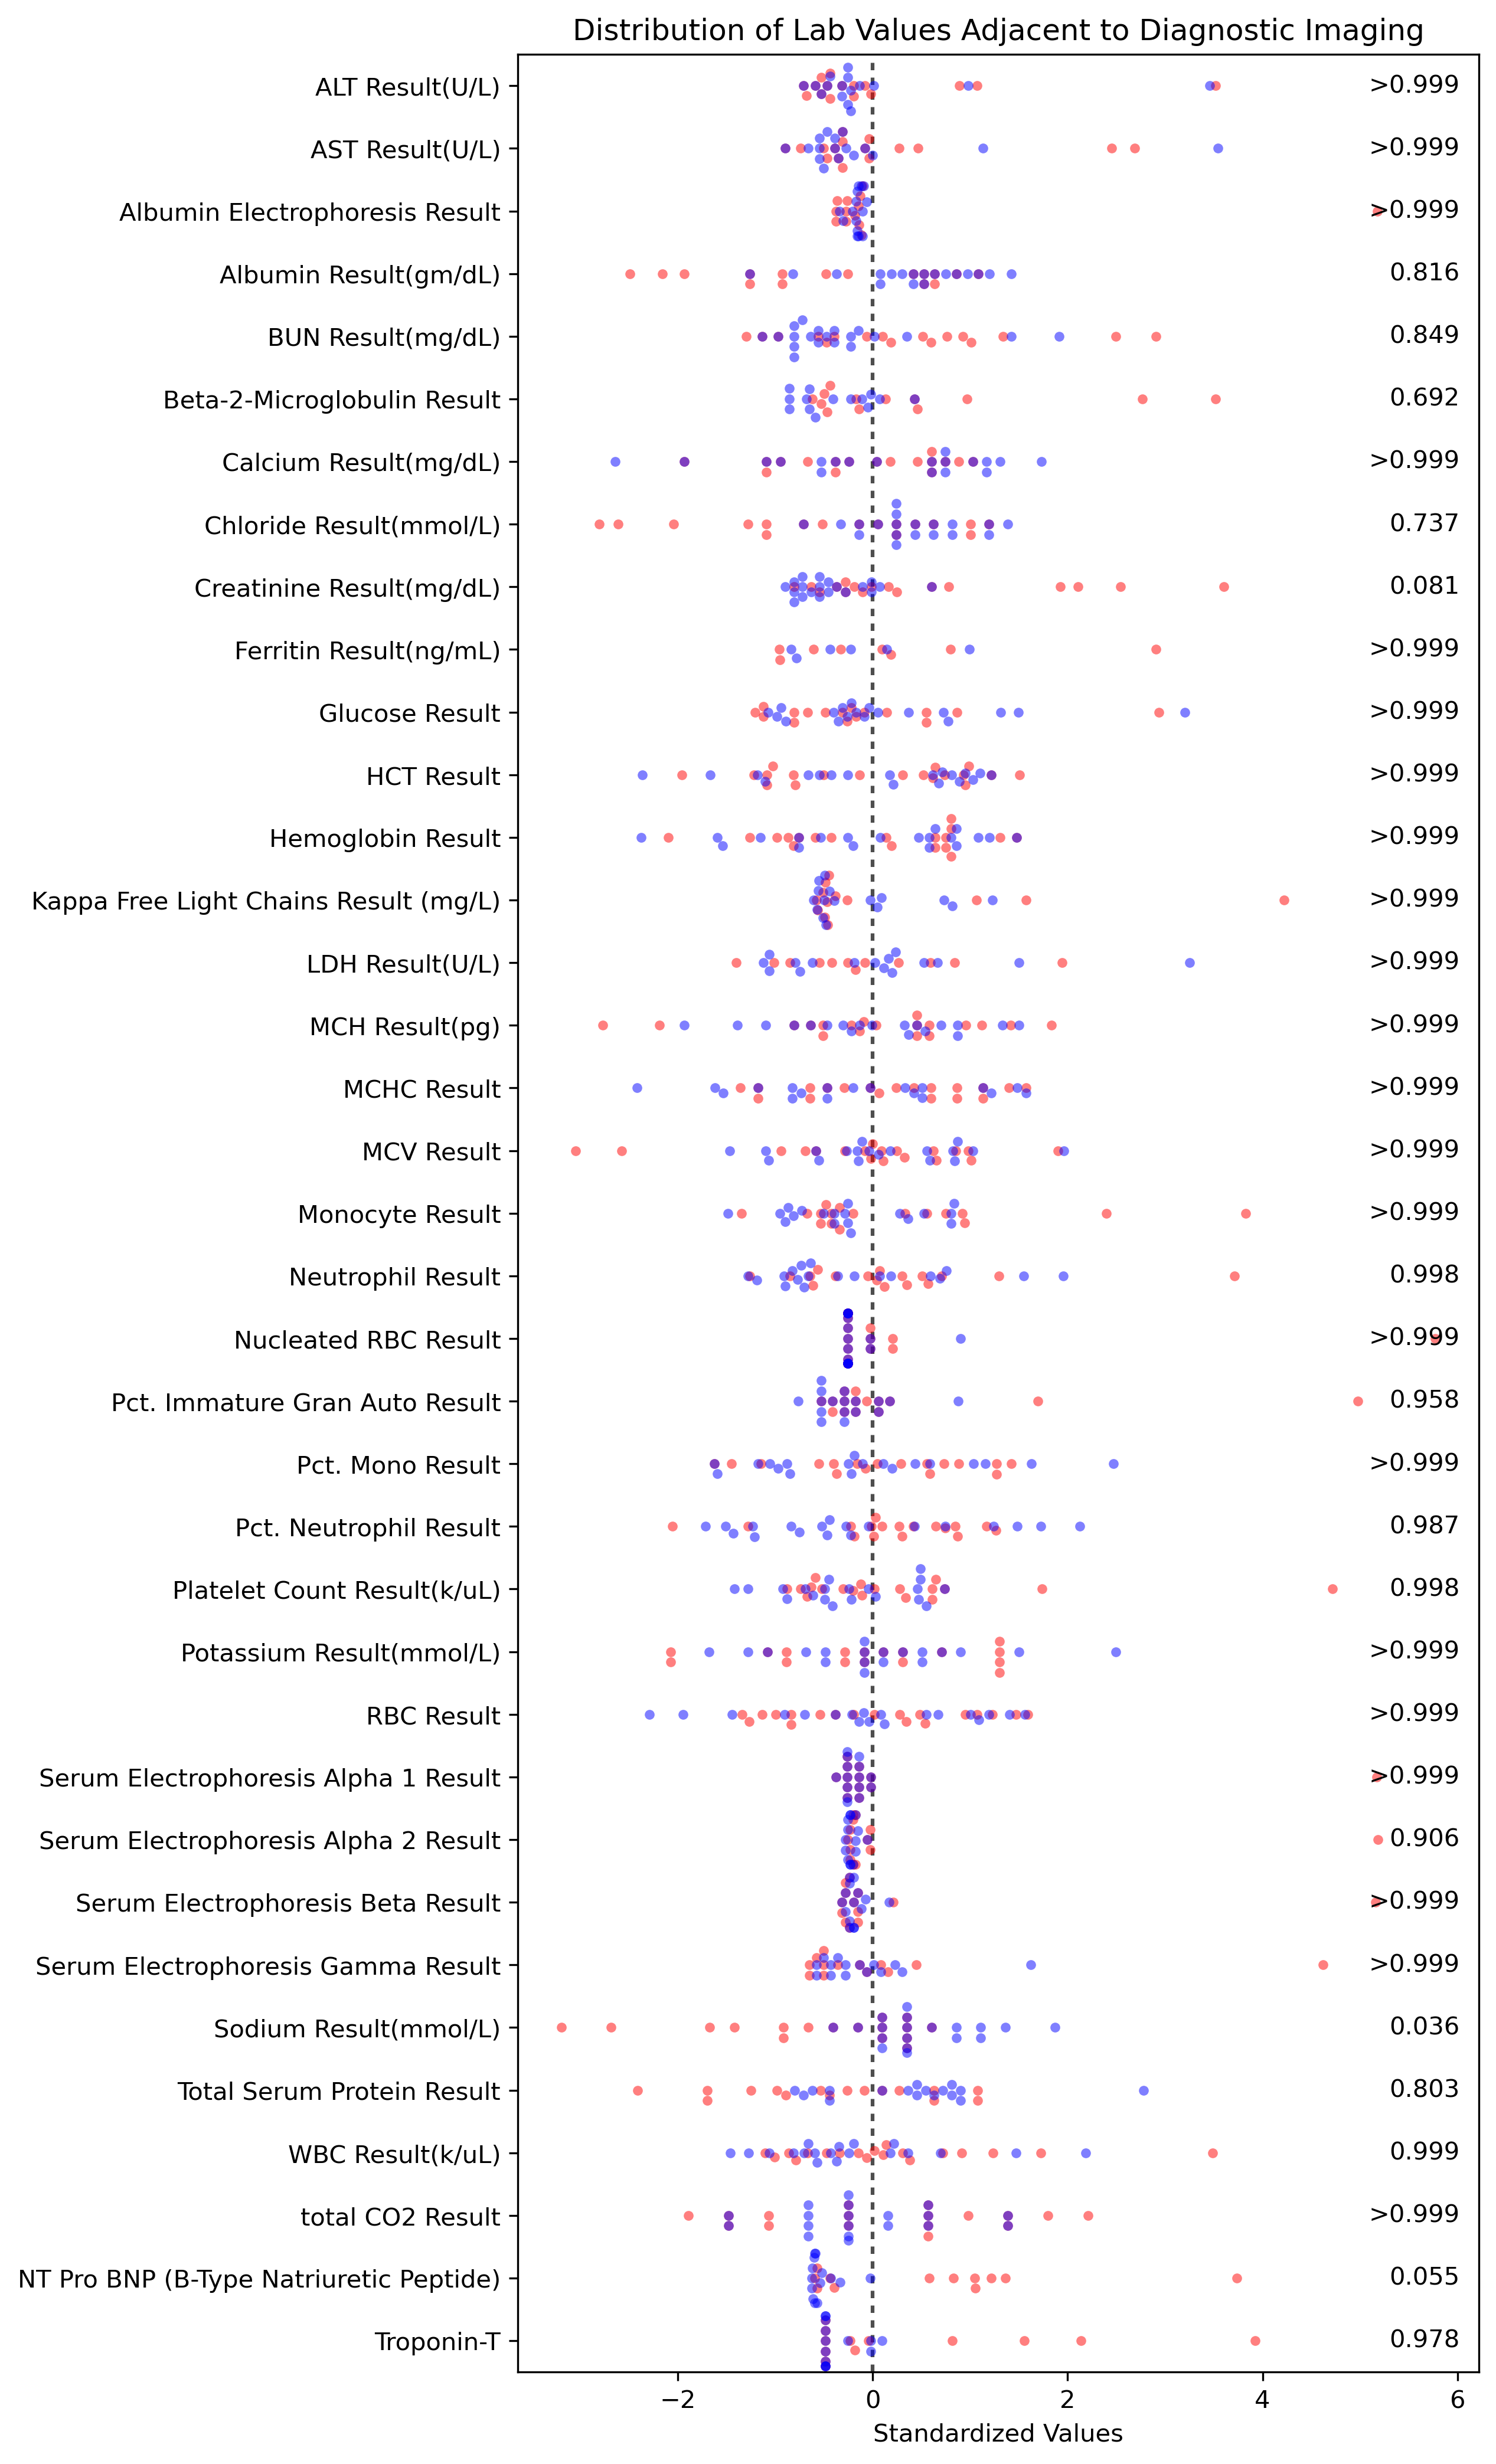

In [35]:
# Importing the statistics from an external Excel file
stats_df = pd.read_excel("060_output_analysis\EchoAdj-T-test_results_250401.xlsx", index_col=0, header=[1, 2])
stats_df.columns = ['_'.join(col).strip() for col in stats_df.columns.values]
stats_df["feature"] = stats_df.index


# Adding the swarm plot
fig, axs = plt.subplots(figsize=(7, 17))
sns.swarmplot(EchoAdj_StandardScalar_df.drop(columns=['Amyloid Status_yes']).loc[listPositive], color='red', orient='h', size=4, alpha=0.5, ax=axs)
sns.swarmplot(EchoAdj_StandardScalar_df.drop(columns=['Amyloid Status_yes']).loc[listNegative], color='blue', orient='h', size=4, alpha=0.5, ax=axs)

axs.axvline(0, color=".3", dashes=(2, 2))

# Adding text descriptions for CA+ mean (std), CA- mean (std), and adjusted p-value
#assuming that the index of stats_df corresponds to the features in EchoAdj_StandardScalar_df
#miss match uncorrectable in the index was causing the error
for i, feature in enumerate(stats_df.index.dropna()):
    ca_plus_mean = round(stats_df.loc[feature, 'CA+_mean'], 3)
    ca_plus_std = round(stats_df.loc[feature, "CA+_std"], 3)
    ca_minus_mean = round(stats_df.loc[feature, "CA-_mean"], 3)
    ca_minus_std = round(stats_df.loc[feature, "CA-_std"], 3)
    pvalue = stats_df.loc[feature, "adjusted p-value_adjusted p-value"]
    if not isinstance(pvalue, str):
        pvalue = round(pvalue, 3)
    # axs.text(0.95, i, f"CA+: {ca_plus_mean} ({ca_plus_std}) CA-: {ca_minus_mean} ({ca_minus_std})\nadjusted p-value: {pvalue}", 
    #          va='center', ha='right', fontsize=7, color='black', transform=axs.get_yaxis_transform())
    axs.text(0.98, i, f"{pvalue}", 
            va='center', ha='right', fontsize=10, color='black', transform=axs.get_yaxis_transform())
    
axs.set_xlabel("Standardized Values")
# # Saving the figure
fig_file_out = ptFn.outputFiguresPath(fileName_header="EchoAdj", fileName_mid="swarmplot_with_pvalue", 
                                      fileExtension=".jpg", fileName_suff=fileNameSuffix, 
                                      parent_dir=outputDir, folderName=folder_data_out)
plt.title("Distribution of Lab Values Adjacent to Diagnostic Imaging")
fig.savefig(fig_file_out, bbox_inches="tight")

c:\Users\mcremer\.conda\envs\BEAT_Labs_20240917_v2\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mcremer\.conda\envs\BEAT_Labs_20240917_v2\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mcremer\.conda\envs\BEAT_Labs_20240917_v2\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mcremer\.conda\envs\BEAT_Labs_20240917_v2\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c

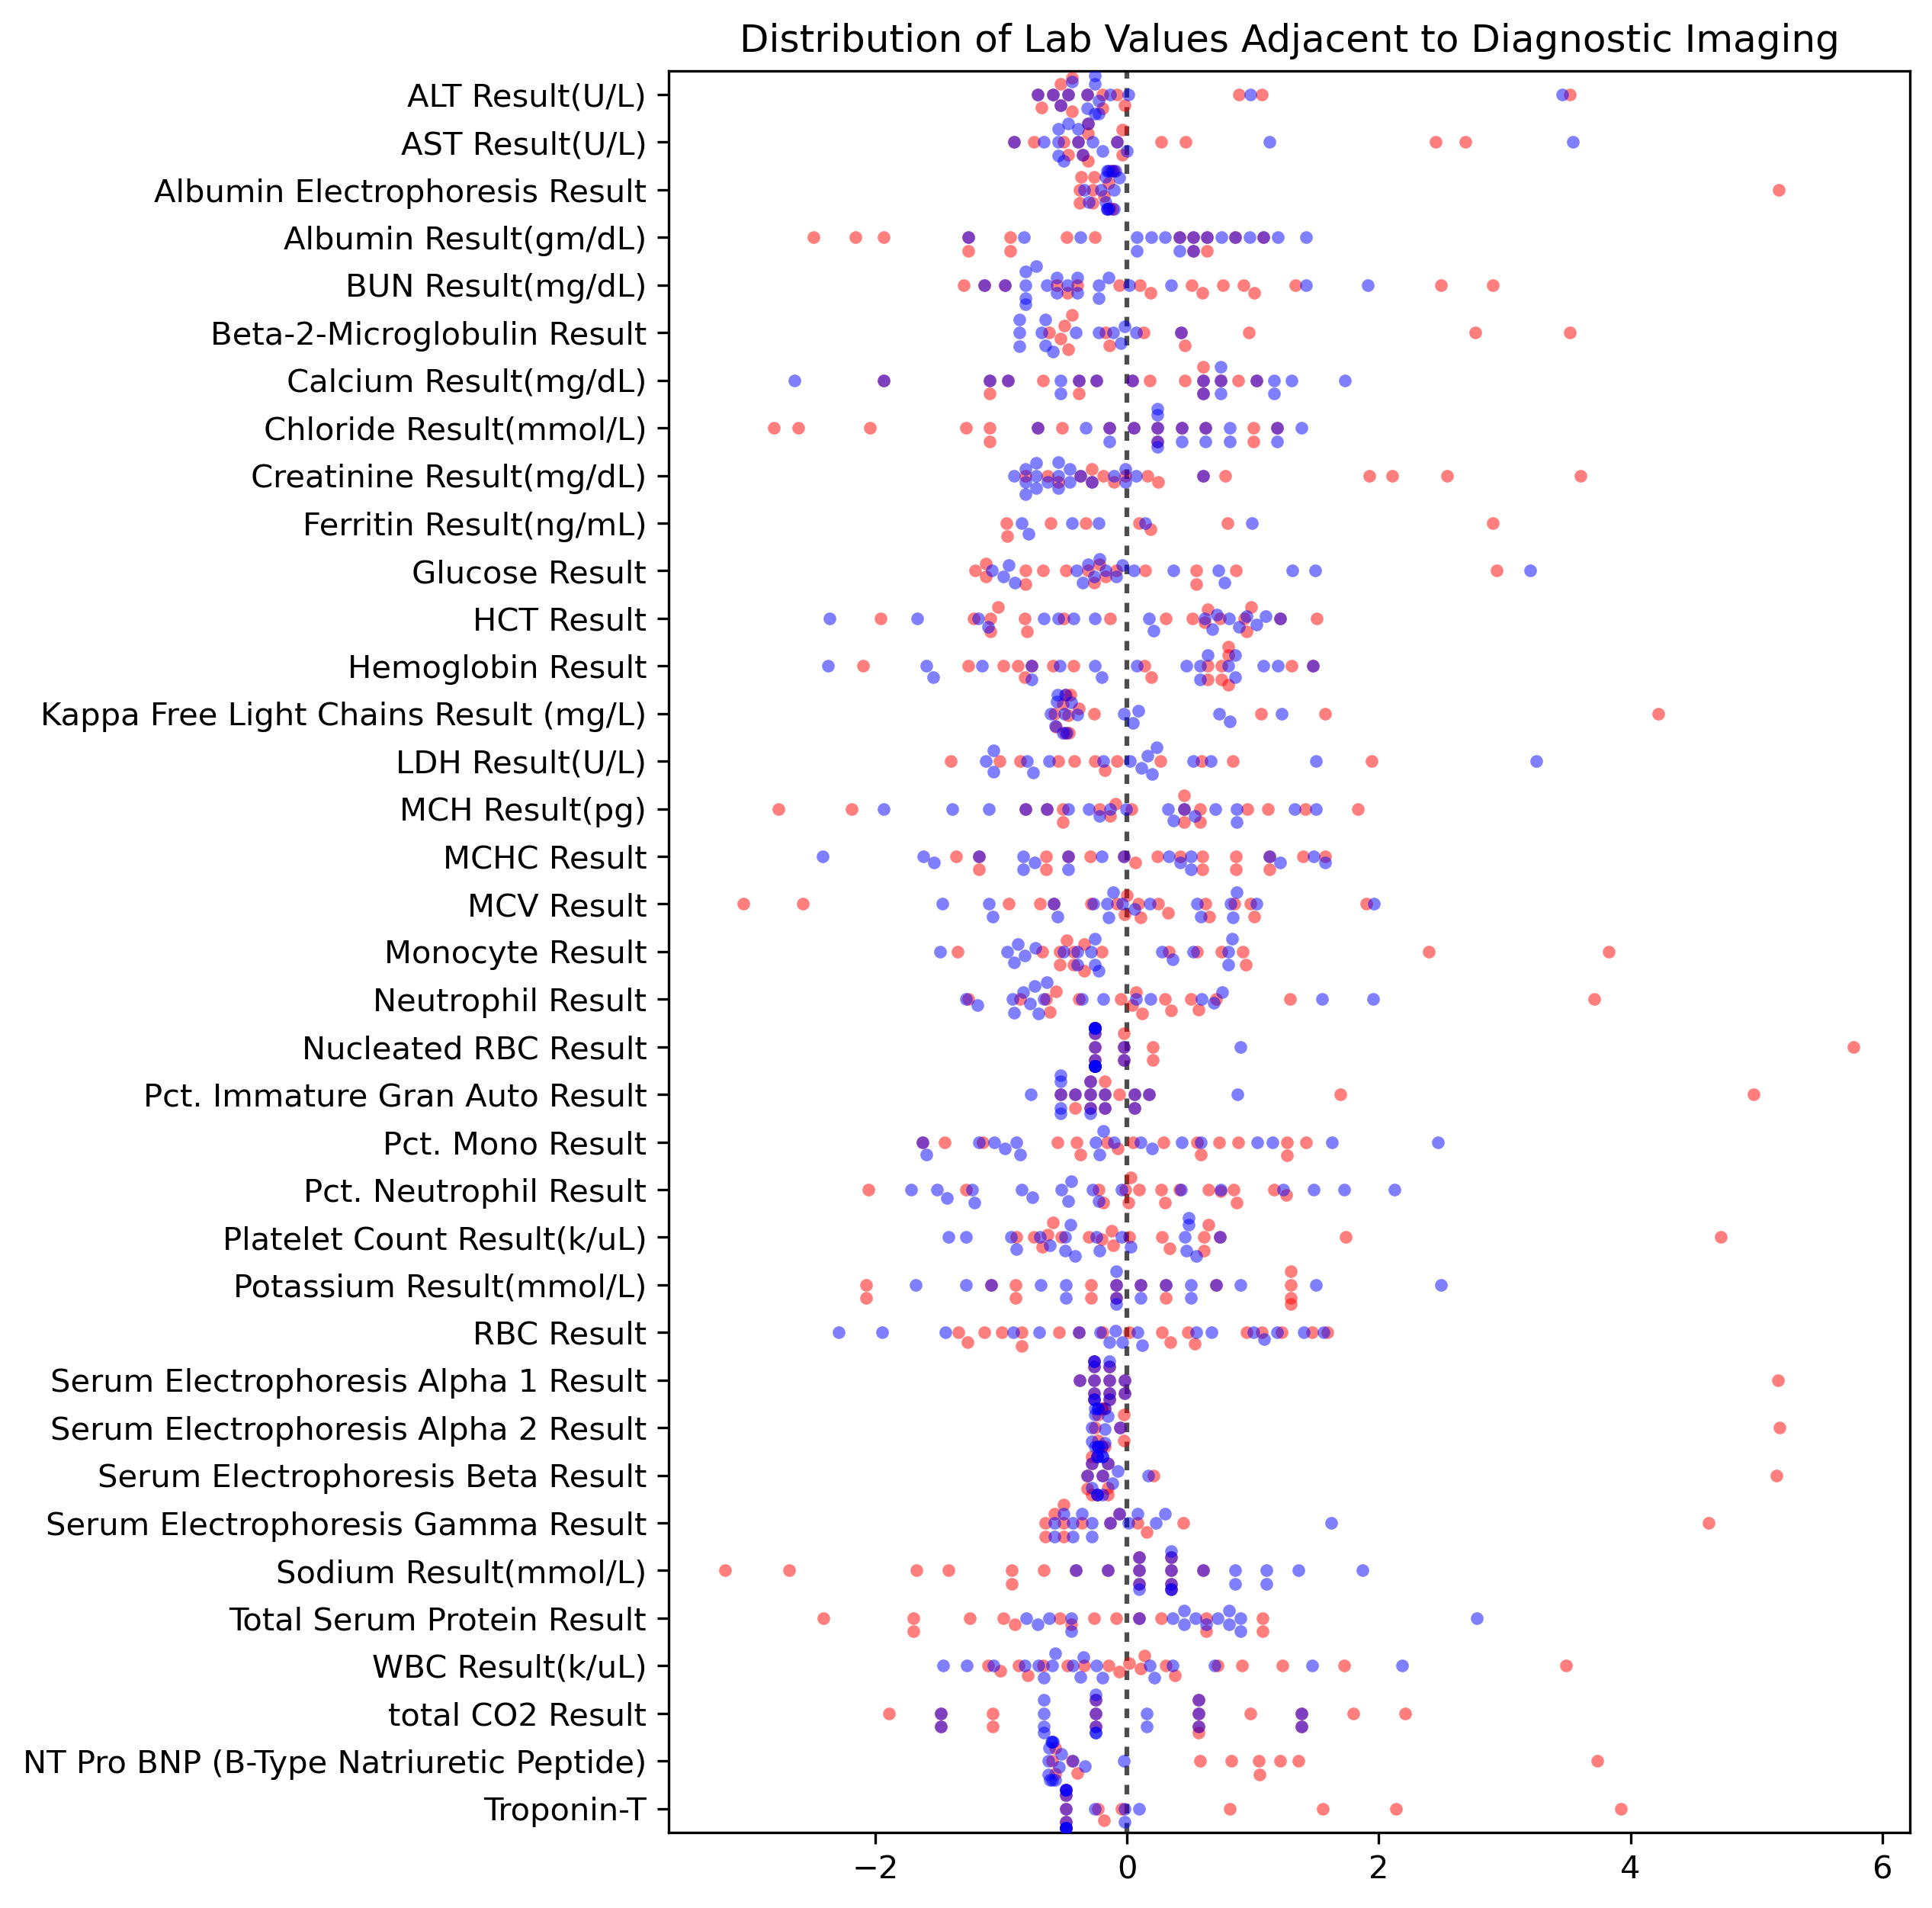

In [36]:
fig, axs = plt.subplots(figsize = (7,10))


sns.swarmplot(EchoAdj_StandardScalar_df.drop(columns= ['Amyloid Status_yes']).loc[listPositive], color = 'red',  orient = 'h', size= 4, alpha = 0.5 )
sns.swarmplot(EchoAdj_StandardScalar_df.drop(columns= ['Amyloid Status_yes']).loc[listNegative], color = 'blue', orient = 'h', size = 4, alpha = 0.5)

#addition of box plots if desired
# sns.boxplot(EchoAdj_StandardScalar_df.drop(columns= ['Amyloid Status_yes']).loc[listNegative], fill= False, orient ='h', color='cornflowerblue',
#              whis=0, width= 0.5, fliersize=0,
#             notch = True)
# sns.boxplot(EchoAdj_StandardScalar_df.drop(columns= ['Amyloid Status_yes']).loc[listPositive], fill = False, color= 'lightcoral',orient ='h', 
#             whis =0, width= 0.5, fliersize= 0, notch = True )

axs.axvline(0, color=".3", dashes=(2, 2))

fig_file_out = ptFn.outputFiguresPath(fileName_header="EchoAdj", fileName_mid="swarmplot", fileExtension= ".jpg",
                                 fileName_suff= fileNameSuffix, parent_dir=outputDir, folderName=folder_data_out)
plt.title("Distribution of Lab Values Adjacent to Diagnostic Imaging")
fig.savefig(fig_file_out, bbox_inches = "tight")

## stats for difference between features by amyloidosis status

In [37]:
# export the data for easy import to graphpad to check analysis
#make list of features with significant difference between groups using T test and Spearmans correlation

In [38]:
import scipy.stats as stats

In [39]:
dict_tstats = {}
for feature in Echo_forAnalysis.columns:
    t_statistic, p_value = stats.ttest_ind(Echo_forAnalysis.loc[listPositive][feature],
                                           Echo_forAnalysis.loc[listNegative][feature])
    dict_tstats[feature] = [t_statistic, p_value]

#convert to dataframe
df_tstats = pd.DataFrame.from_dict(dict_tstats, orient= "index", columns=["T-stat", "p-value"])
#make list of features with p values less than 0.05
significant_features = [feature for feature in df_tstats.index if df_tstats.loc[feature, 'p-value'] <= 0.05]

# #print stats 
df_tstats.loc[significant_features]

c:\Users\mcremer\.conda\envs\BEAT_Labs_20240917_v2\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\mcremer\.conda\envs\BEAT_Labs_20240917_v2\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


T-stat   p-value
Amyloid Status_no       -inf  0.000000
Amyloid Status_yes       inf  0.000000
HemeTx             -2.284611  0.027453
HemeTx Number      -2.284611  0.027453

In [40]:
#saving the statistics to an output file

In [41]:
#saving original data to an output file that can be used by graphpad
transposed_EchoAdj_Positive = Echo_forAnalysis.loc[listPositive].T
transposed_EchoAdj_Negative = Echo_forAnalysis.loc[listNegative].T

ptFn.outputToExcel(transposed_EchoAdj_Positive, fileName_header="DataTrans_", fileName_Common= "_echoAdjAll", 
              fileName_suffix= fileNameSuffix, parent_dir=outputDir, folderName = folder_data_out, sheetName= "pos")
ptFn.outputToExcel(transposed_EchoAdj_Negative, fileName_header="DataTrans_", fileName_Common= "_echoAdjAll", 
              fileName_suffix= fileNameSuffix, parent_dir= outputDir, folderName = folder_data_out, sheetName= "neg")

# import DescFits feature list

In [42]:
DescFitsFeatures = pd.read_excel("020_construction of data frames\DFsForSVM_CompLabswoEcho_exG01J01_MDfits_20241022_v1\AL-KnownPts_CompLabs_descFits_241022.xlsx", sheet_name="ALL", index_col= 'DeID')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\mcremer\AppData\Local\Temp\ipykernel_16852\328472753.py:1: SyntaxWarning: invalid escape sequence '\D'
  DescFitsFeatures = pd.read_excel("020_construction of data frames\DFsForSVM_CompLabswoEcho_exG01J01_MDfits_20241022_v1\AL-KnownPts_CompLabs_descFits_241022.xlsx", sheet_name="ALL", index_col= 'DeID')


## stats by amyloidosis status

In [43]:
# splitting data
#saving original data to an output file that can be used by graphpad
transposed_DescFitsFeatures_Positive = DescFitsFeatures.loc[listPositive].T
transposed_DescFitsFeatures_Negative = DescFitsFeatures.loc[listNegative].T

ptFn.outputToExcel(transposed_DescFitsFeatures_Positive, fileName_header="DataTrans_", fileName_Common= "_DescFits_all", 
              fileName_suffix= fileNameSuffix, parent_dir=outputDir, folderName = folder_data_out, sheetName= "pos")
ptFn.outputToExcel(transposed_DescFitsFeatures_Negative, fileName_header="DataTrans_", fileName_Common= "_DescFits_all", 
              fileName_suffix= fileNameSuffix, parent_dir= outputDir, folderName = folder_data_out, sheetName= "neg")

In [44]:
# ### T tests

# dict_tstats_descFits = {}
# for feature in DescFitsFeatures.columns:
#     t_statistic, p_value = stats.ttest_ind(DescFitsFeatures.loc[listPositive][feature],
#                                            DescFitsFeatures.loc[listNegative][feature])
#     dict_tstats_descFits[feature] = [t_statistic, p_value]

# #convert to dataframe
# df_tstats_descFits = pd.DataFrame.from_dict(dict_tstats_descFits, orient= "index", columns=["T-stat", "p-value"])
# #make list of features with p values less than 0.05
# significant_features = [feature for feature in df_tstats_descFits.index 
#                         if df_tstats_descFits.loc[feature, 'p-value'] <= 0.05]

# # #print stats 
# df_tstats_descFits.loc[significant_features]

# look at the echo data itself

In [45]:
i=0
for ptID in listPositive:
    #get the echo data 
    echoData = patientDictionary[ptID].echoData
    if i == 0: 
        positiveEchoData = echoData.copy()
    else: 
        positiveEchoData = pd.concat([positiveEchoData, echoData], axis = "index")
    i = i+1
    
#for CA - patients
i=0
for ptID in listNegative:
    #get the echo data 
    echoData = patientDictionary[ptID].echoData
    if i == 0: 
        negativeEchoData = echoData.copy()
    else: 
        negativeEchoData = pd.concat([negativeEchoData, echoData], axis = "index")
    i = i+1
    

In [46]:
positiveEchoData.index = positiveEchoData["DeID"]
negativeEchoData.index = negativeEchoData["DeID"]

In [47]:
#making one echo frame to use for standardization
EchoMeasures_forStandardScalar = pd.concat([positiveEchoData, negativeEchoData], axis= 'index')

In [48]:
EchoMeasures_forStandardScalar

Unnamed: 0  DeID amyloid  AGE  time from diagnosis to BEG_DT_TM  \
DeID                                                                    
B-02          27  B-02     yes   49                          4.433333   
C-03          54  C-03     yes   59                          7.400000   
E-01           4  E-01     yes   53                         41.266667   
E-02          30  E-02     yes   65                          4.600000   
F-03          57  F-03     yes   65                         45.300000   
G-02          32  G-02     yes   37                          4.366667   
I-01           8  I-01     yes   56                          8.333333   
I-03          60  I-03     yes   67                          1.633333   
J-02          35  J-02     yes   68                          0.900000   
K-02          36  K-02     yes   68                          0.366667   
M-02          38  M-02     yes   71                         10.466667   
N-03          65  N-03     yes   69                          2.066667   
O-03          66  O-03     yes   72                          7.233333   
Q-02          42  Q-02     yes   71                         17.533333   
Q-03          68  Q-03     yes   41                          0.700000   
T-01          19  T-01     yes   71                          2.000000   
V-02          47  V-02     yes   83                         50.300000   
W-01          22  W-01     yes   57                          1.666667   
X-01          23  X-01     yes   80                         -0.533333   
X-02          49  X-02     yes   65                         23.033333   
Y-02          50  Y-02     yes   57                          3.833333   
A-02          26  A-02      no   74                          6.800000   
B-03          53  B-03      no   44                          8.333333   
C-01           2  C-01      no   56                          1.900000   
C-02          28  C-02      no   59                          2.033333   
E-03          56  E-03      no   63                          4.466667   
F-01           5  F-01      no   66                        143.166667   
G-03          58  G-03      no   69                          1.533333   
H-01           7  H-01      no   57                          3.933333   
H-02          33  H-02      no   65                          3.200000   
M-01          12  M-01      no   52                         56.966667   
N-01          13  N-01      no   79                          0.633333   
N-02          39  N-02      no   76                          1.900000   
P-01          15  P-01      no   80                         39.566667   
P-02          41  P-02      no   65                          8.433333   
Q-01          16  Q-01      no   58                         10.566667   
R-01          17  R-01      no   68                          4.700000   
R-03          69  R-03      no   63                          5.266667   
S-02          44  S-02      no   69                          0.300000   
T-02          45  T-02      no   61                          3.566667   
V-01          21  V-01      no   66                          5.800000   
W-02          48  W-02      no   72                          5.366667   
Y-01          24  Y-01      no   59                          1.133333   
Z-01          25  Z-01      no   72                         -0.333333   

                                                 REASON  \
DeID                                                      
B-02                                r/o cardiac amyloid   
C-03                       F/up for cardiac amyloidosis   
E-01  amylodosis, with cardiac inv. has cards wants ...   
E-02                                R/O Cardiac Amyloid   
F-03                                    Cardiac Amyloid   
G-02  possible cardiac amyloidosis and after startin...   
I-01         cardiac amyloidosis f/u vol status and BMP   
I-03           Amyloidosis patient - please r/o Cardiac   
J-02                                        r/o amyloid  

In [49]:
#transpose to help with graphpad analysis, then save

transposed_positiveEchoData = positiveEchoData.T
transposed_negativeEchoData = negativeEchoData.T

ptFn.outputToExcel(transposed_positiveEchoData, fileName_header="DataTrans_", fileName_Common= "_echomeasures", 
              fileName_suffix= fileNameSuffix, parent_dir=outputDir, folderName = folder_data_out, sheetName= "pos")
ptFn.outputToExcel(transposed_negativeEchoData, fileName_header="DataTrans_", fileName_Common= "_echomeasures", 
              fileName_suffix= fileNameSuffix, parent_dir= outputDir, folderName = folder_data_out, sheetName= "neg")

## bee swarm and histogram of the echo values

In [50]:
EchoMeasures_forStandardScalar.columns #total list of columns

Index(['Unnamed: 0', 'DeID', 'amyloid', 'AGE',
       'time from diagnosis to BEG_DT_TM', 'REASON', 'Dx_How', 'score',
       'positives', 'weight (kg)', 'time from diagnosis to weight (months)',
       'other notes', 'use for study?',
       'time from diagnosis to first echo (months)', '1st_EF(avg%)',
       '1st_Diastolic grade', '1st_BSA', '1st_PWT(cm)', '1st_IVS(cm)',
       '1st_lvid(cm)', '1st_LA_dimension (cm)', '1st_Lvmass', '1st_LVMI',
       '1st_RWT', '1st_LA_grade', '1st_mv_grade', '1st_AV_grade',
       '1st_rvsp(mmHg)', '1st_LVH', '1stGLS', '1stGLSreported', 'use1stGLS',
       '1st_outerLS', '1st_midLS', '1st_innerLS', '1st_echoOSH',
       'time from diagnosis to final echo (months)', 'fin_EF(avg%)',
       'fin_Diastolic grade', 'fin_BSA', 'fin_PWT(cm)', 'fin_IVS(cm)',
       'fin_lvid(cm)', 'fin_LA_dimension (cm)', 'fin_Lvmass', 'fin_LVMI',
       'fin_RWT', '1st_LA_enlargement', 'fin_mv_disease', 'fin_av_disease',
       'fin_rvsp(mmHg)', 'fin_LVH', 'fin_GLS%', 'fin

In [51]:
#filtering list of columns of interest for plotting
EchoMeasuresList = ['1st_EF(avg%)',
       '1st_PWT(cm)', '1st_IVS(cm)',
       '1st_lvid(cm)', '1st_LA_dimension (cm)', '1st_Lvmass', '1st_LVMI',
       '1st_RWT', '1st_LA_grade', '1st_mv_grade', '1st_AV_grade',
       '1st_rvsp(mmHg)', '1stGLS',
       '1st_outerLS', '1st_midLS', '1st_innerLS',
       ]

In [52]:
EchoMeasures_forStandardScalar[EchoMeasuresList]

1st_EF(avg%) 1st_PWT(cm) 1st_IVS(cm) 1st_lvid(cm) 1st_LA_dimension (cm)  \
DeID                                                                           
B-02         67.5        1.35        1.67         3.42                   3.7   
C-03         62.5        1.35        1.36         4.34                   4.1   
E-01         62.0        1.44        1.44         4.26                   3.6   
E-02         60.0         1.5         1.5          4.4                   4.6   
F-03         none        none        none         none                  none   
G-02           50        1.64        1.65         4.01                   5.1   
I-01         62.5        1.07        1.03         4.15                   3.4   
I-03         57.5        1.37        1.26         4.52                  4.75   
J-02         47.5        1.06           1         4.22                   4.4   
K-02         62.5        1.65        1.84          4.4                   4.1   
M-02         27.5         1.6        1.65         4.27                   4.1   
N-03         47.5        1.71        1.88         4.21                   3.9   
O-03         52.5     x (OSH)     x (OSH)      x (OSH)               x (OSH)   
Q-02         47.5        1.98         1.8          4.3                   4.6   
Q-03         57.5        1.42        1.54         4.41                   4.8   
T-01         57.5        1.77        1.84         4.43                  5.02   
V-02         62.5         1.6        1.66         3.75                   3.4   
W-01         52.5        1.44        2.84         3.49                   3.4   
X-01           60           1         1.7          4.6                     4   
X-02         57.5        1.11        1.34         6.02                   4.1   
Y-02         77.5         1.1         1.1          3.6                   3.3   
A-02         64.0         1.3         1.7          3.2                   4.2   
B-03         62.5        1.54        1.27         4.59                   3.9   
C-01         62.5        1.04        1.02         3.65                   4.1   
C-02         62.5        1.12         1.0         5.35                  3.98   
E-03         62.5         1.1        0.95         4.58                   3.6   
F-01         62.5        1.25        1.29         4.56                  4.59   
G-03         52.5        0.85       0.991         3.63                   2.5   
H-01         57.5       0.971        1.09         4.41                   3.5   
H-02         57.5        1.41        1.71         5.44                   5.0   
M-01         67.5        1.13        0.86         4.69                  2.89   
N-01         62.5         0.9         0.9         4.51                   3.7   
N-02         57.5        1.17        1.22         4.75                   4.1   
P-01         37.5         1.0        0.96         6.07                   3.9   
P-02         62.5        1.03       0.842         4.77                   3.3   
Q-01         67.5       0.903       0.895         4.03                   3.1   
R-01         52.5         1.1        1.12          6.2                  3.54   
R-03         62.5        1.31        1.29         4.21                   3.5   
S-02         58.0         0.8         0.8          4.6                   4.2   
T-02         52.5        1.09       0.971         5.21                   4.3   
V-01         62.5         1.1        1.22         4.35                   3.6   
W-02         62.5        0.94         1.1         4.35                   4.9   
Y-01         62.5        1.24        1.38         4.52                   4.5   
Z-01         57.5        1.12        1.14         4.41                   4.4   

      1st_Lvmass    1st_LVMI   1st_RWT 1st_LA_grade  1st_mv_grade  \
DeID                                                                
B-02  189.537462  105.298590  0.883041            1           0.0   
C-03  224.121893  129.550227  0.624424            1           0.0   
E-01  239.122393  110.194651  0.676056          

In [53]:
#trying to remove all the strings
test_EchoMeasures = EchoMeasures_forStandardScalar[EchoMeasuresList].replace("none", np.nan).replace('x', np.nan).replace("x (OSH)", np.nan).replace('x', np.nan).replace('unable', np.nan)

C:\Users\mcremer\AppData\Local\Temp\ipykernel_16852\3045682564.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_EchoMeasures = EchoMeasures_forStandardScalar[EchoMeasuresList].replace("none", np.nan).replace('x', np.nan).replace("x (OSH)", np.nan).replace('x', np.nan).replace('unable', np.nan)


In [54]:
# transformation with standard scalar
EchoMeasures_StandardScalar = StandardScaler().fit(test_EchoMeasures[EchoMeasuresList]).transform(test_EchoMeasures[EchoMeasuresList])
EchoMeasures_StandardScalar_df = pd.DataFrame(EchoMeasures_StandardScalar)

In [55]:
EchoMeasures_StandardScalar_df.columns = EchoMeasuresList

In [56]:
EchoMeasures_StandardScalar_df.index = test_EchoMeasures.index

c:\Users\mcremer\.conda\envs\BEAT_Labs_20240917_v2\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mcremer\.conda\envs\BEAT_Labs_20240917_v2\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 84.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mcremer\.conda\envs\BEAT_Labs_20240917_v2\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 81.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mcremer\.conda\envs\BEAT_Labs_20240917_v2\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 85.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: >

c:\Users\mcremer\.conda\envs\BEAT_Labs_20240917_v2\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 55.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mcremer\.conda\envs\BEAT_Labs_20240917_v2\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 84.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mcremer\.conda\envs\BEAT_Labs_20240917_v2\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 81.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mcremer\.conda\envs\BEAT_Labs_20240917_v2\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 85.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


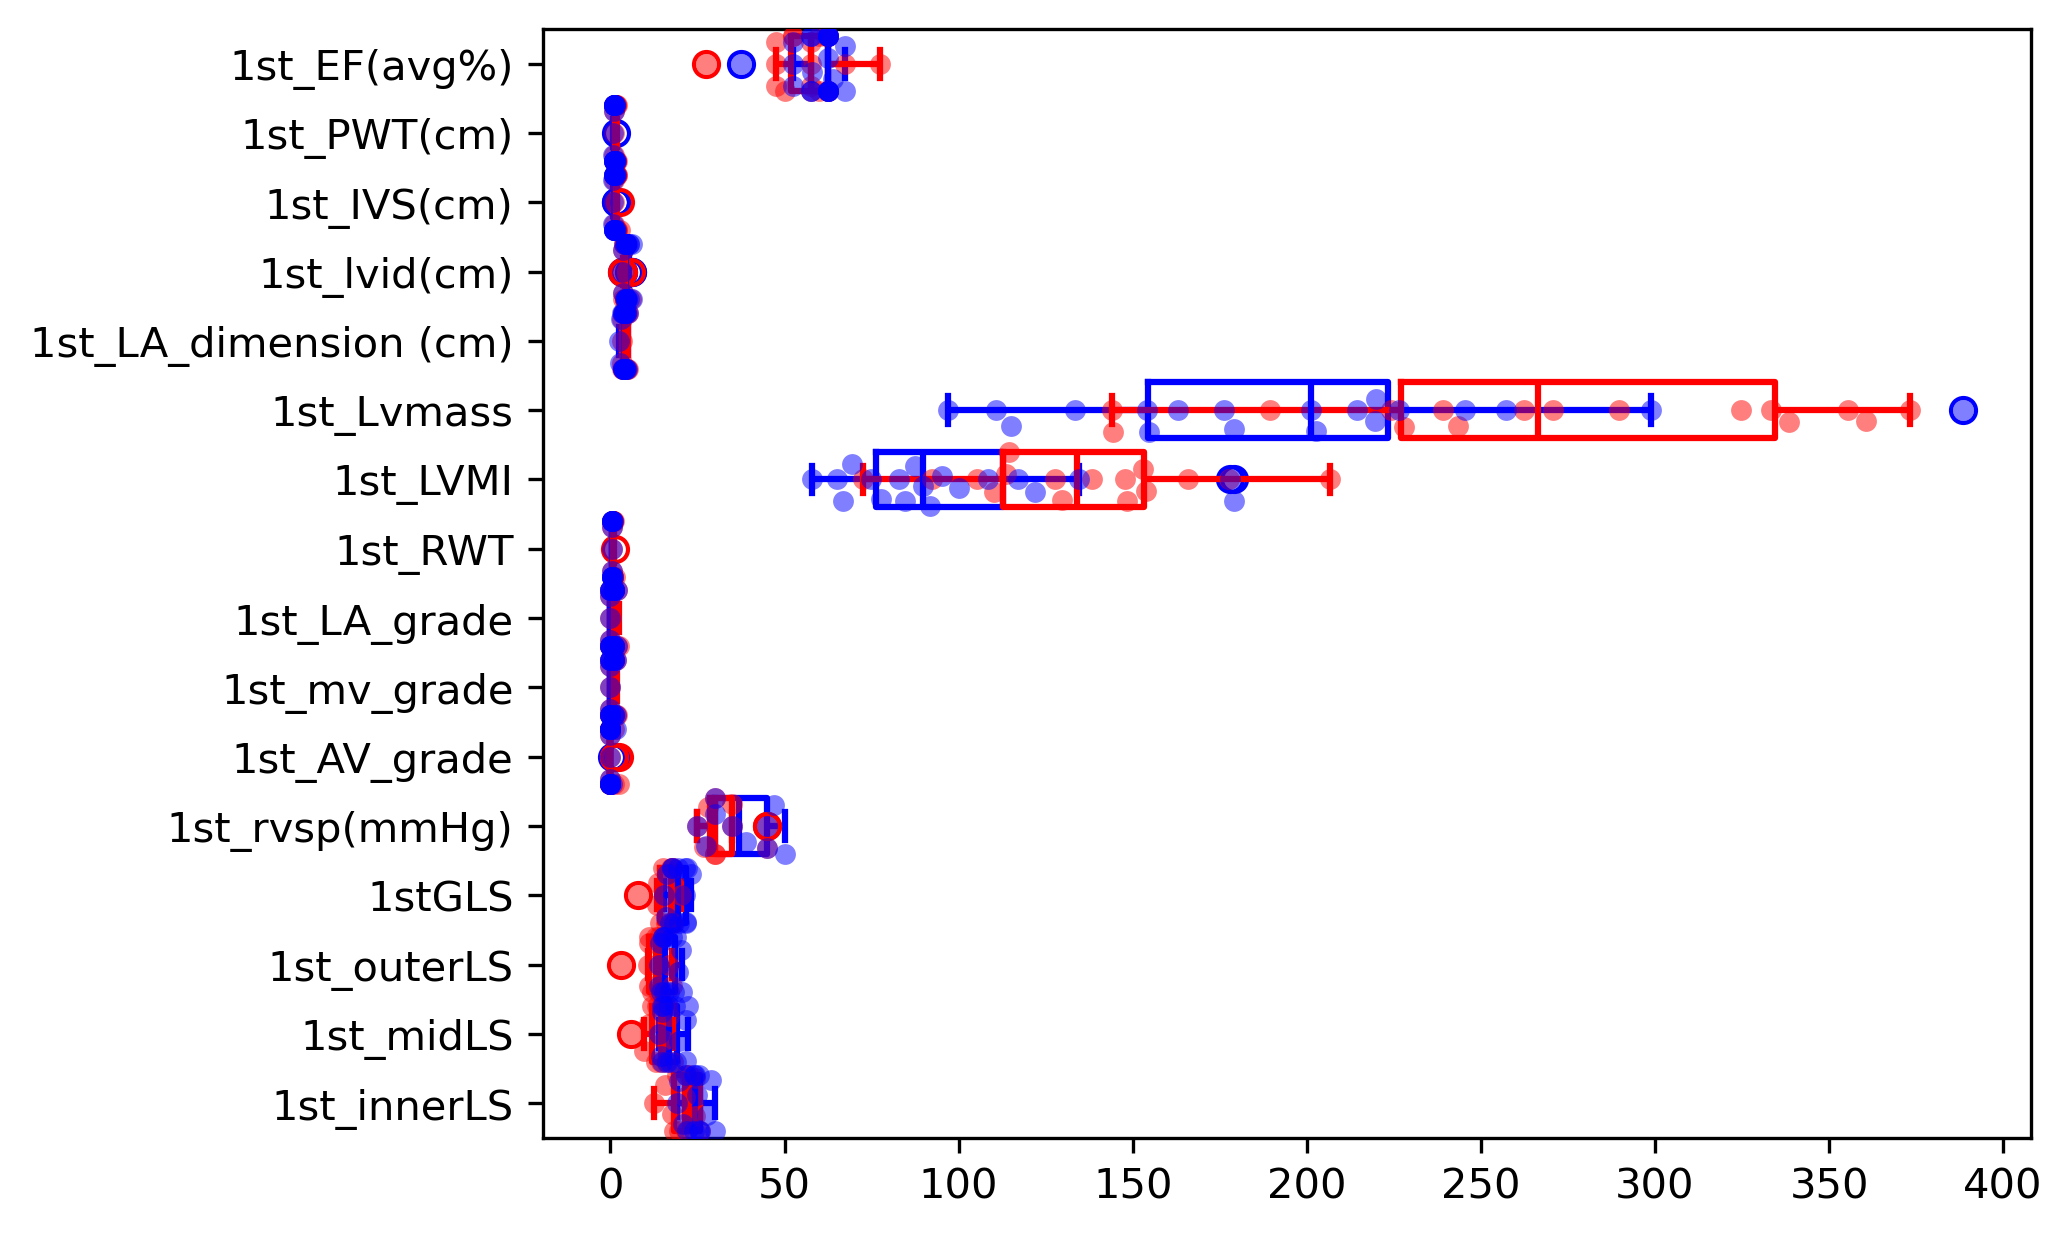

In [57]:
sns.swarmplot(test_EchoMeasures.loc[listPositive], orient= 'h', color = "red", alpha = 0.5)
sns.swarmplot(test_EchoMeasures.loc[listNegative], orient= 'h', color = "blue", alpha =0.5)
sns.boxplot(test_EchoMeasures.loc[listNegative], orient= 'h', color = "blue", fill = False)
sns.boxplot(test_EchoMeasures.loc[listPositive], orient= 'h', color = "red", fill = False)

## histograms of the echo measures

In [58]:
dict_echoMeasuresNames = {
    '1st_EF(avg%)': "Ejection Fraction",
    '1st_PWT(cm)': "Posterior Wall Thickness", '1st_IVS(cm)': "Interventricular Septal Thickness", '1st_lvid(cm)': "Left Ventricular Diastolic Internal Dimension",
    '1st_LA_dimension (cm)' : "Left Atrial Diastolic Dimension", '1st_Lvmass': "Left Ventricular Mass", 
    '1st_LVMI': "Left Ventricular Mass Indexed to BSA", '1st_RWT' : "Relative Wall Thickenss",
    '1st_LA_grade': "Left Atrial ", '1st_rvsp(mmHg)' : "Right Ventricular Systolic Pressure",
    '1stGLS' : "Global Longitudenal Strain", '1st_outerLS': "Longitudinal Strain of the Base", '1st_midLS' : "Longitudinal Strain of the Mid Wall", 
    '1st_innerLS' : "Longitudinal Strain of the Apex"
}

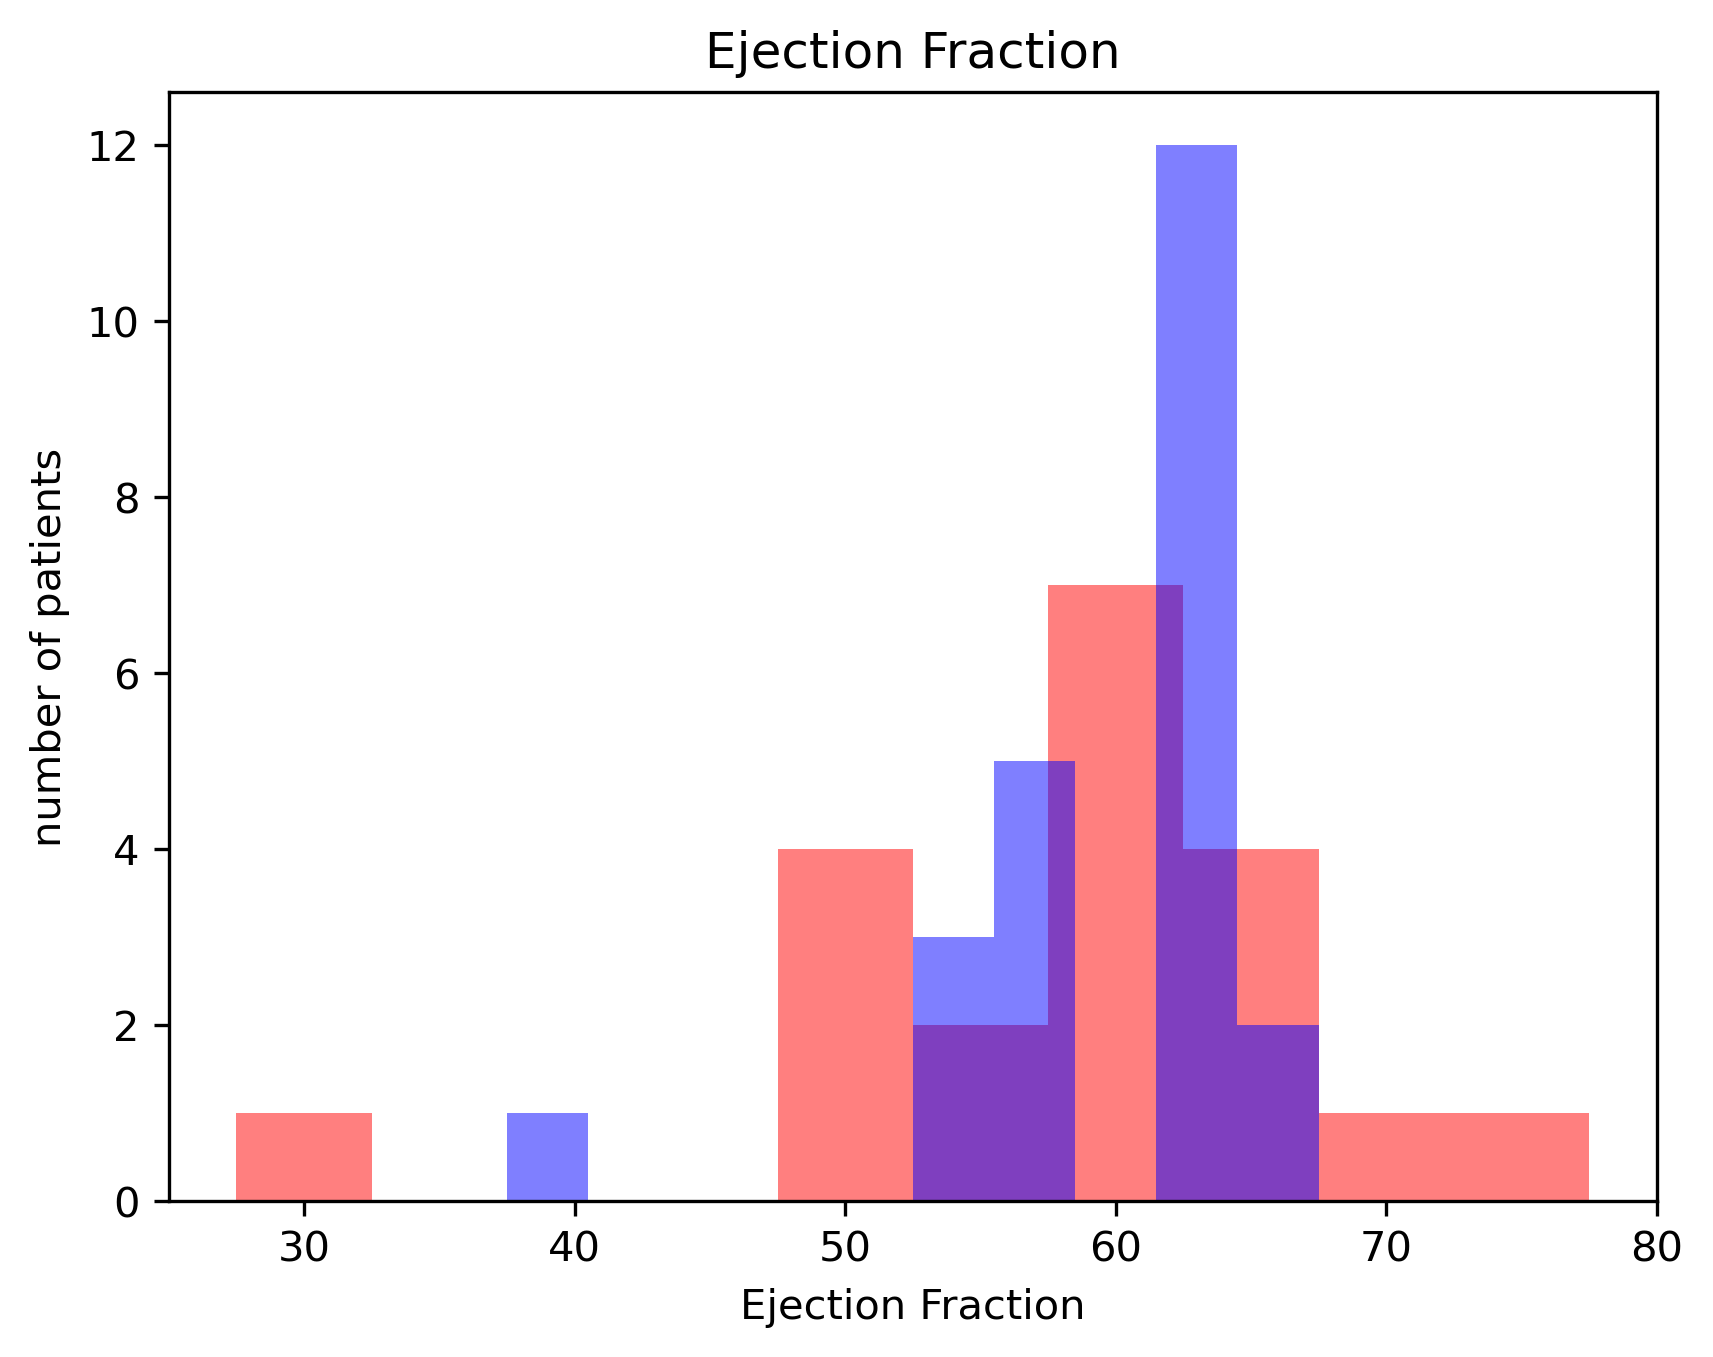

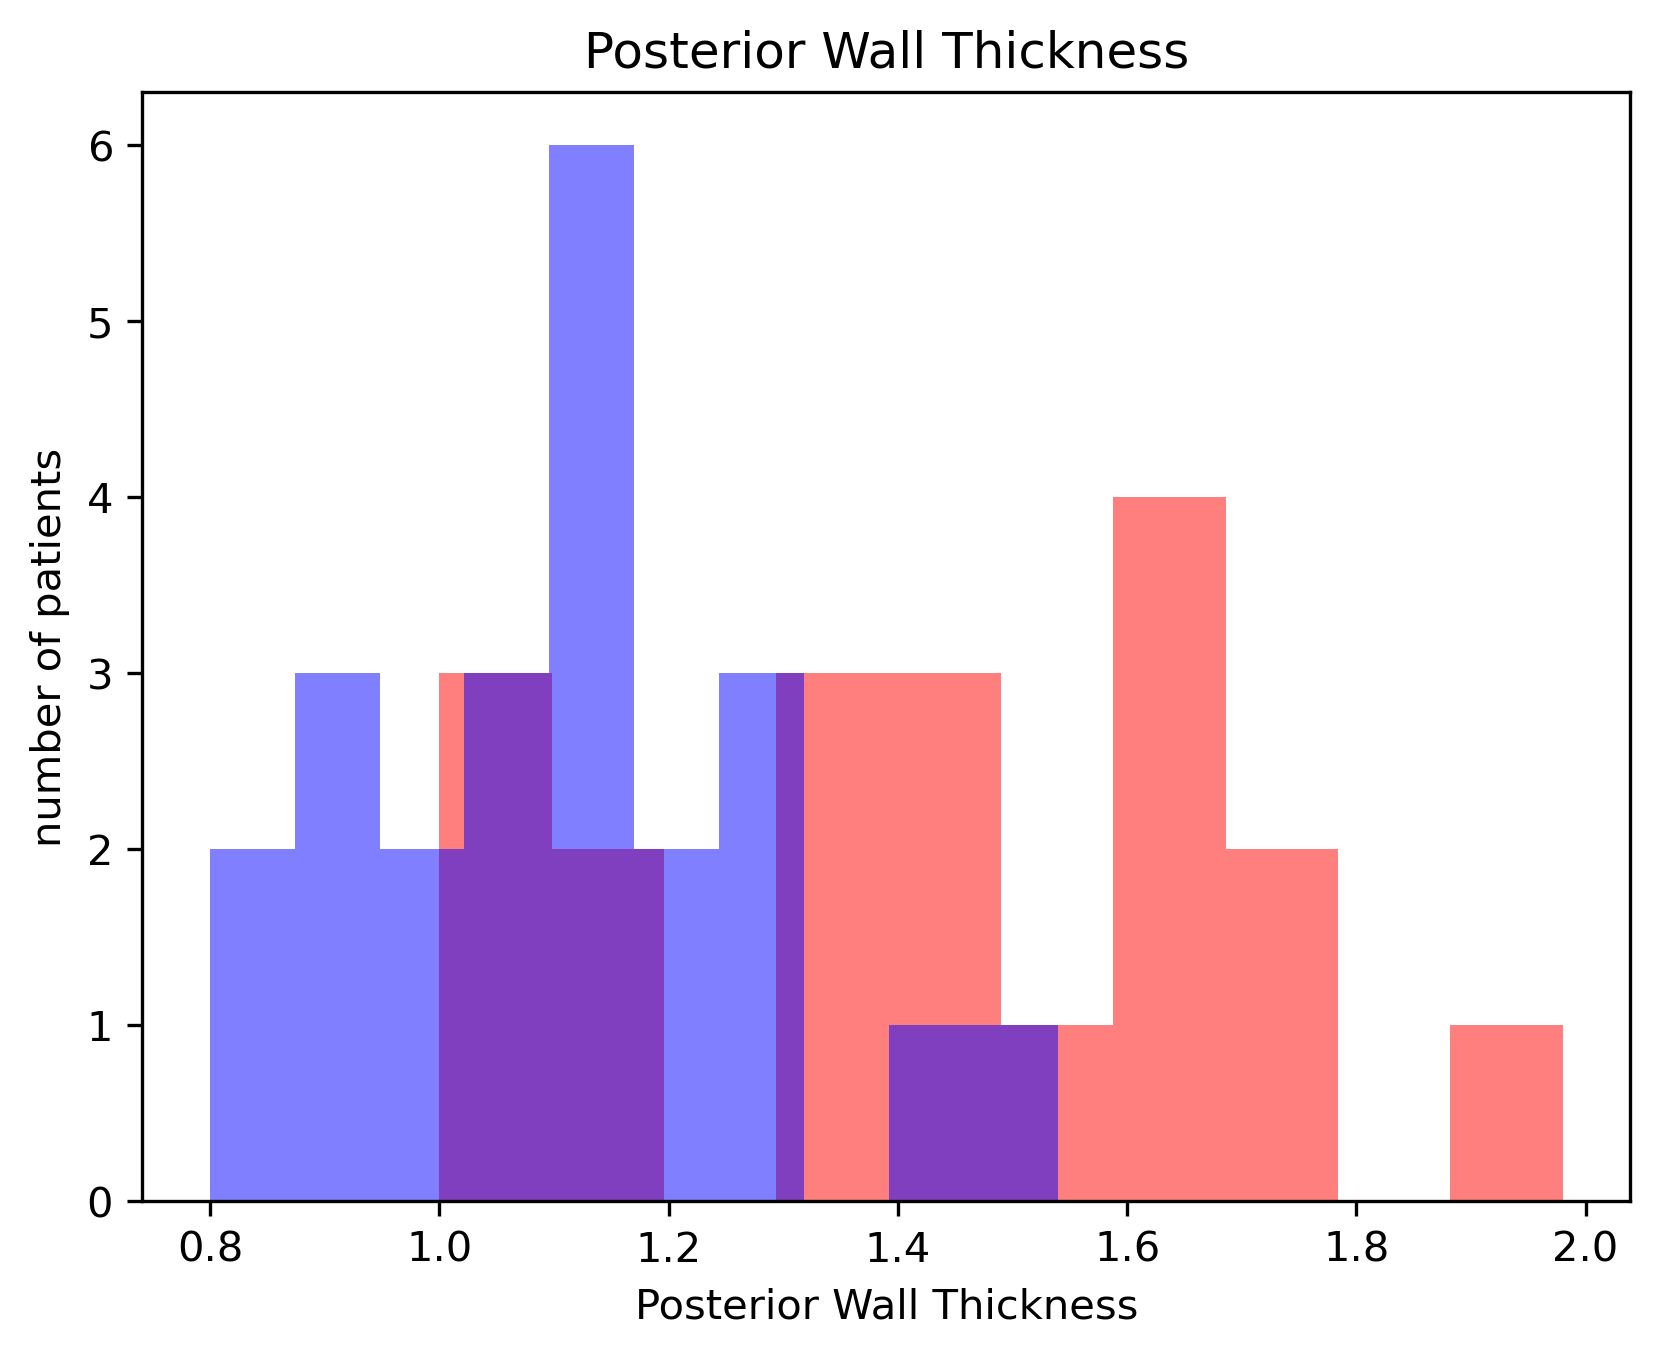

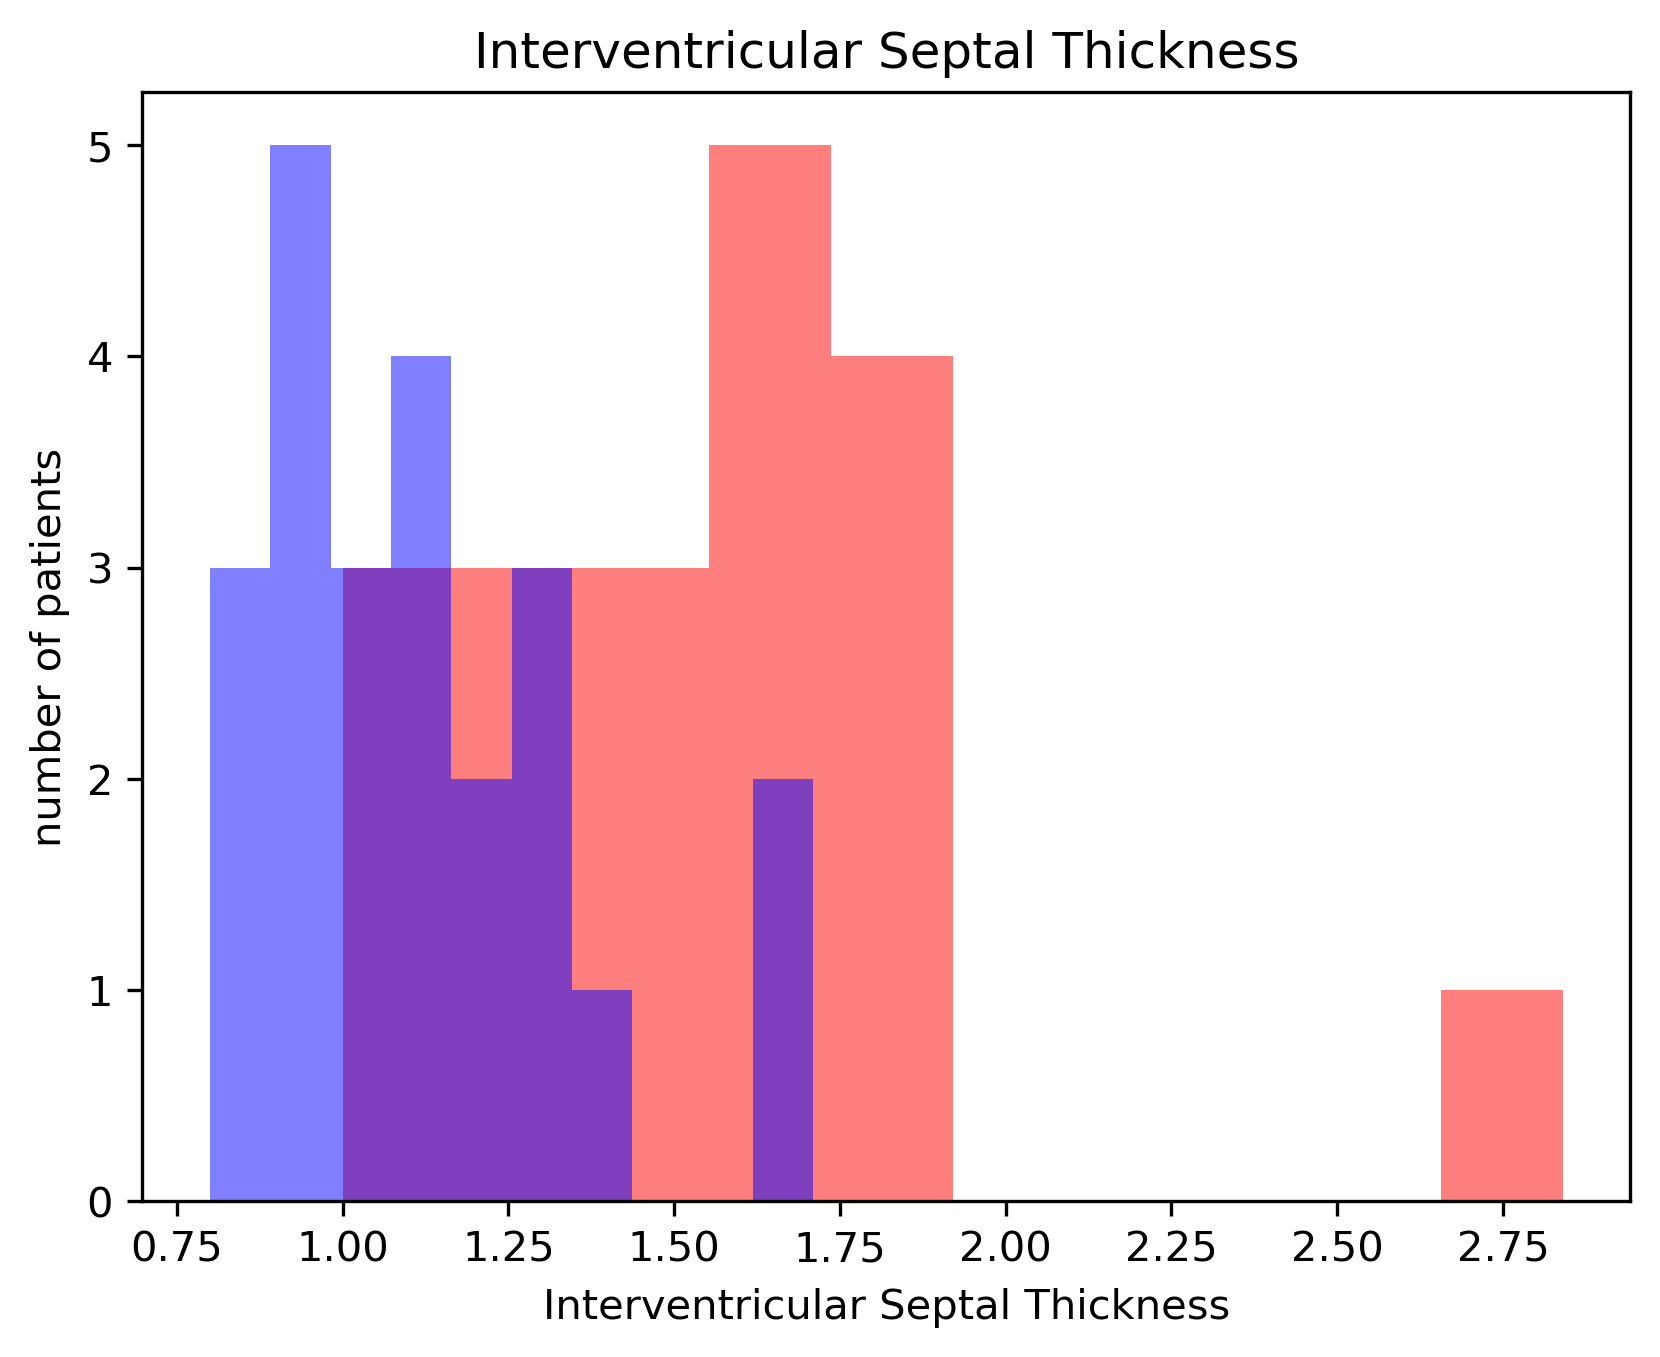

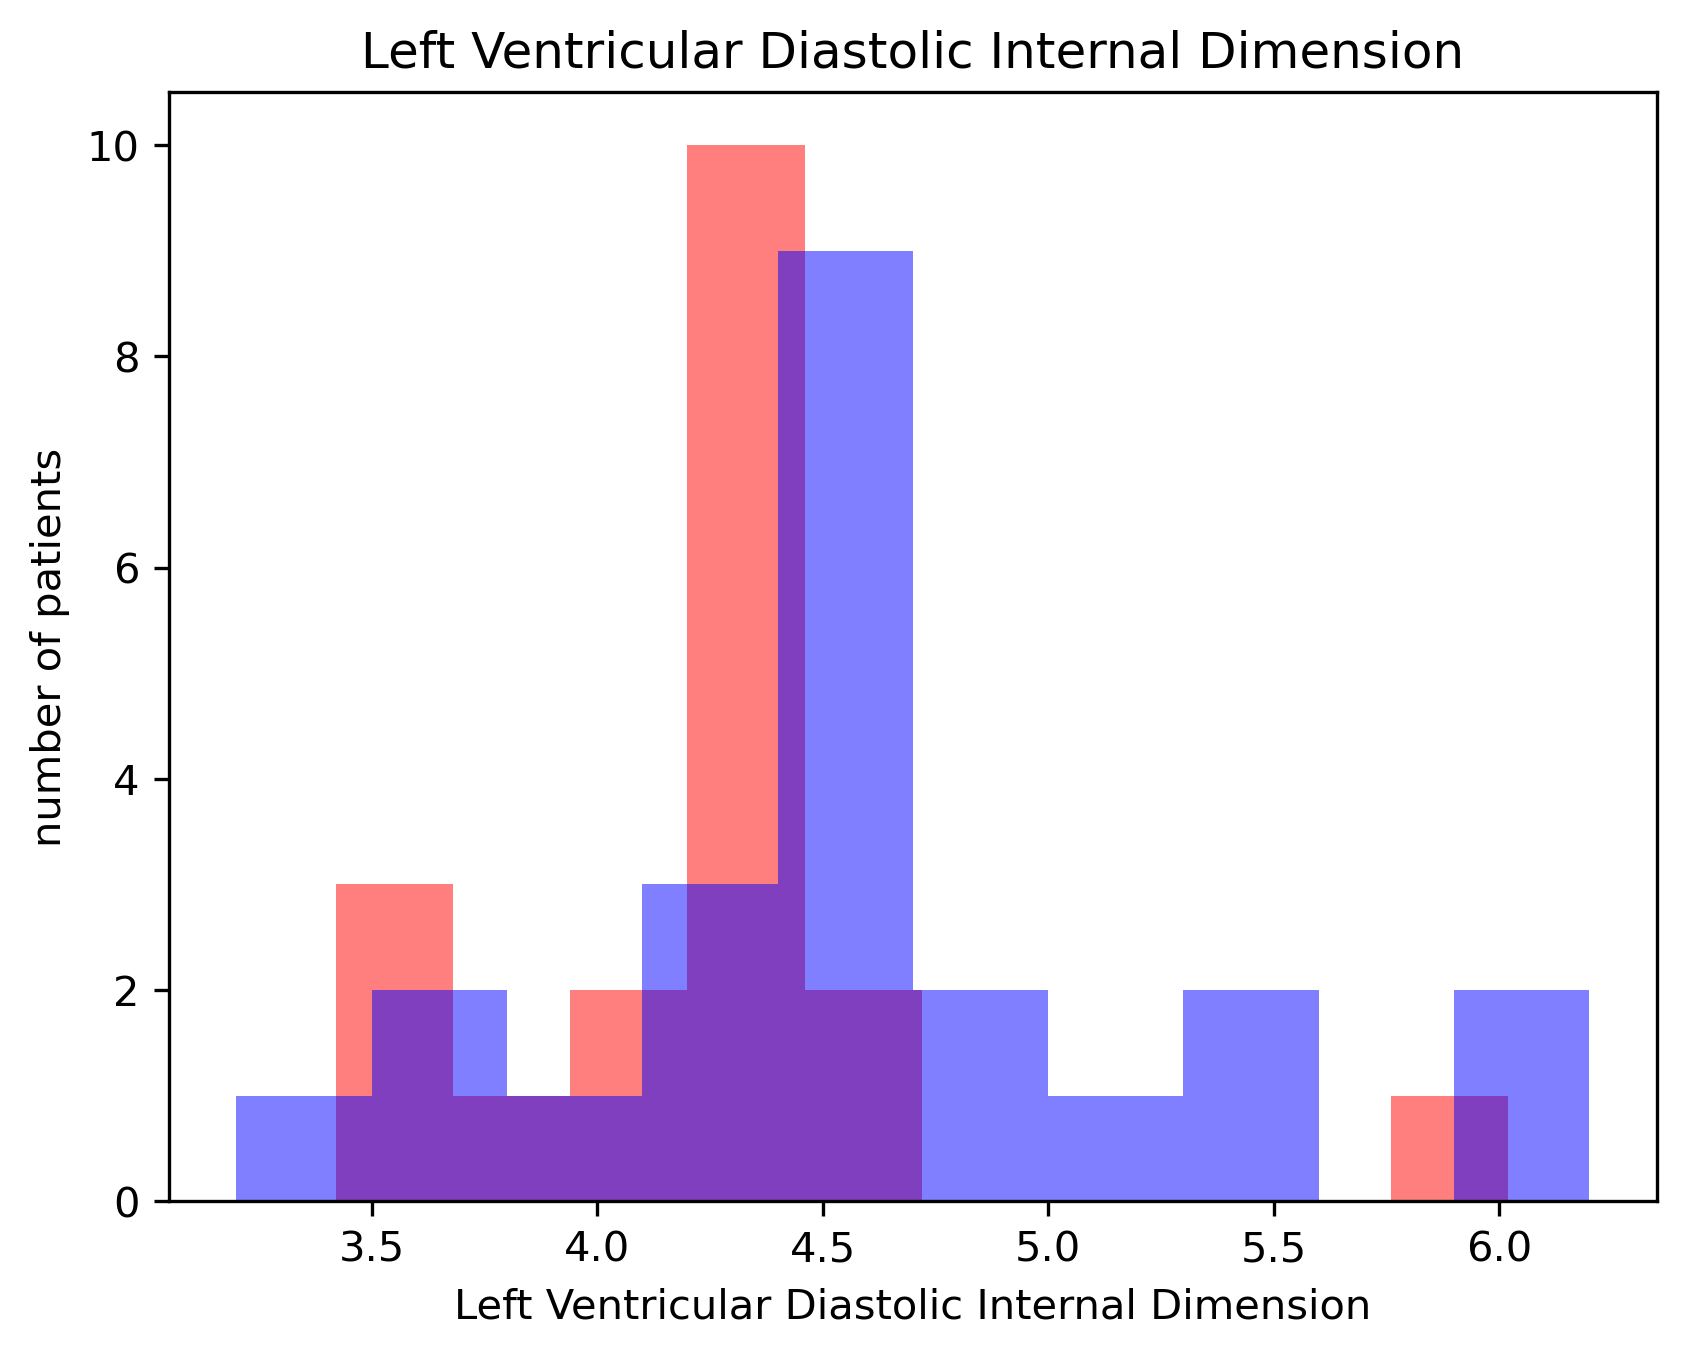

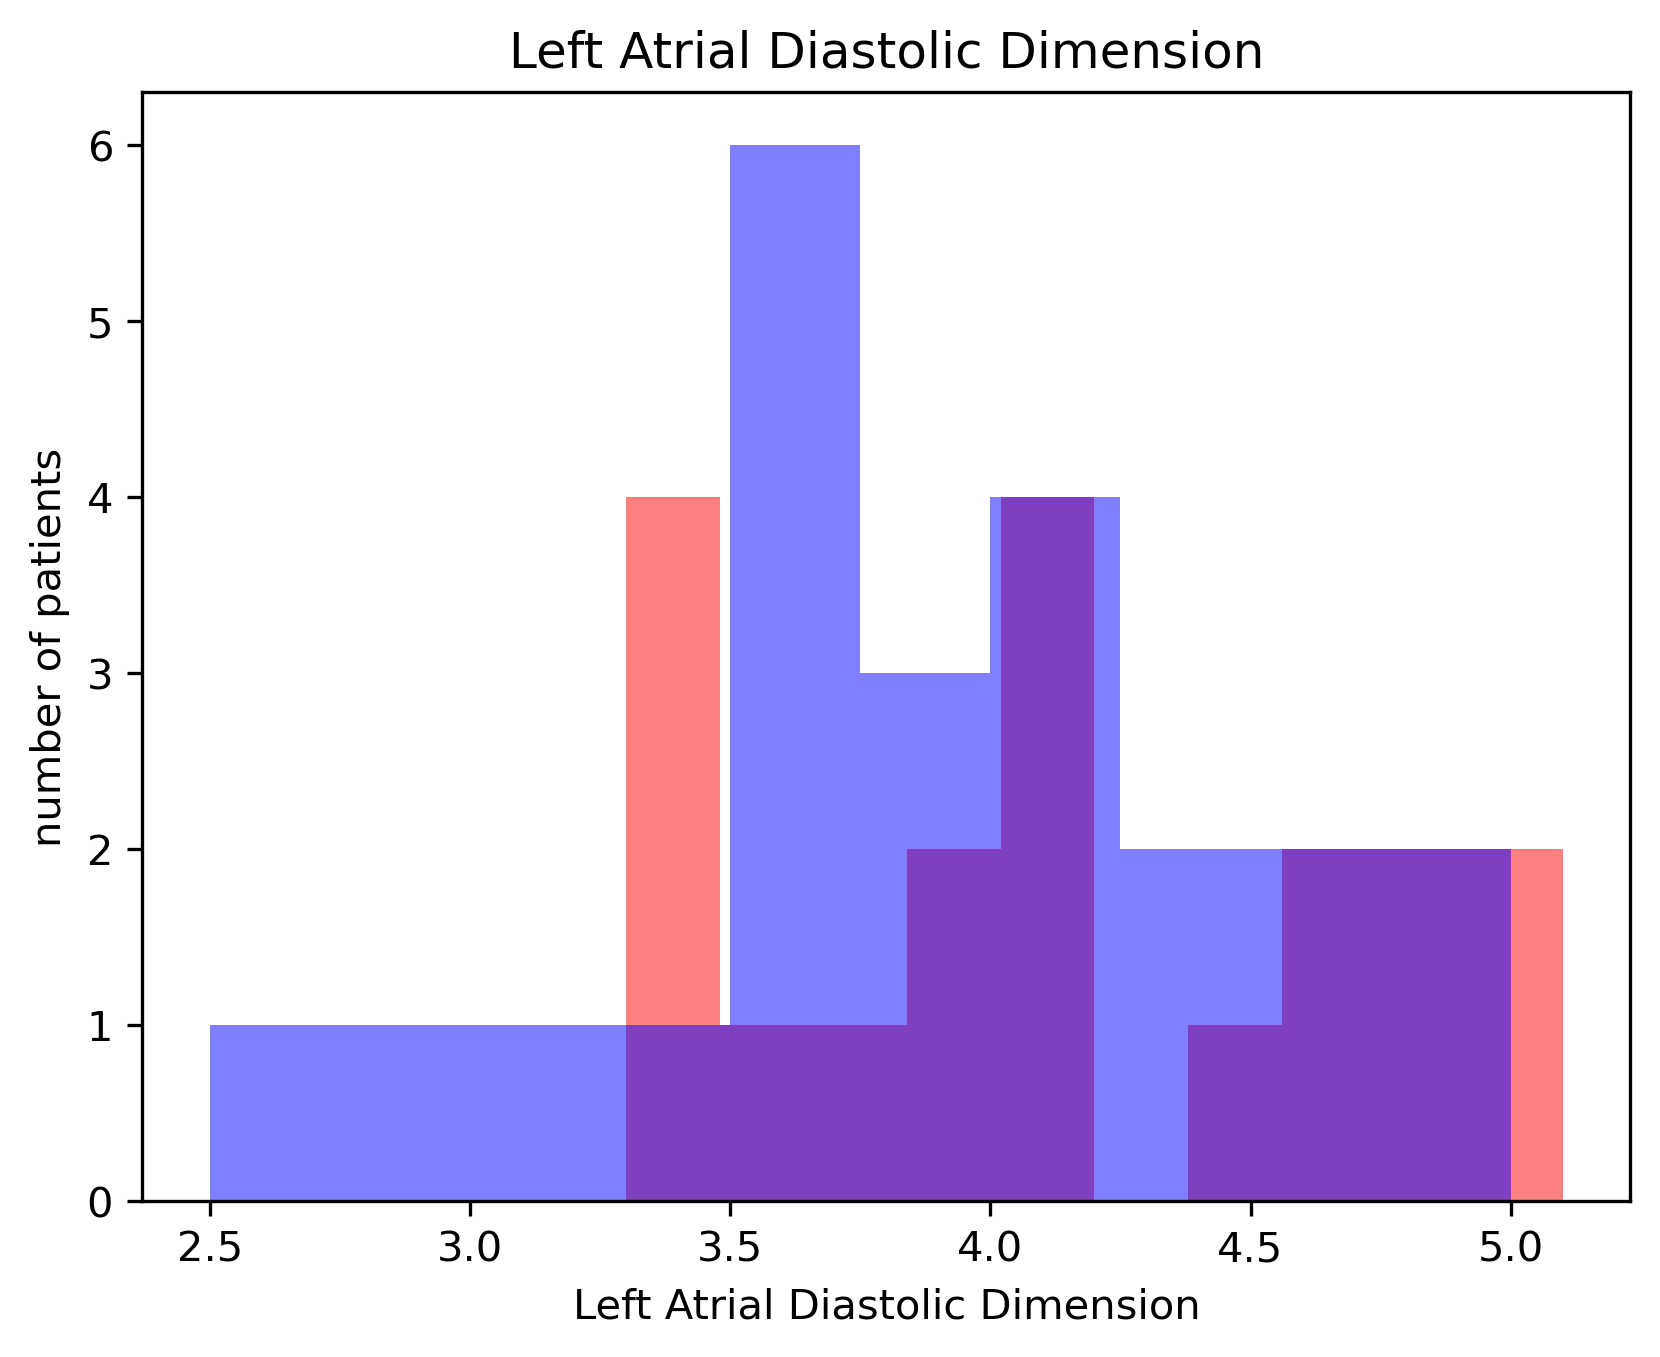

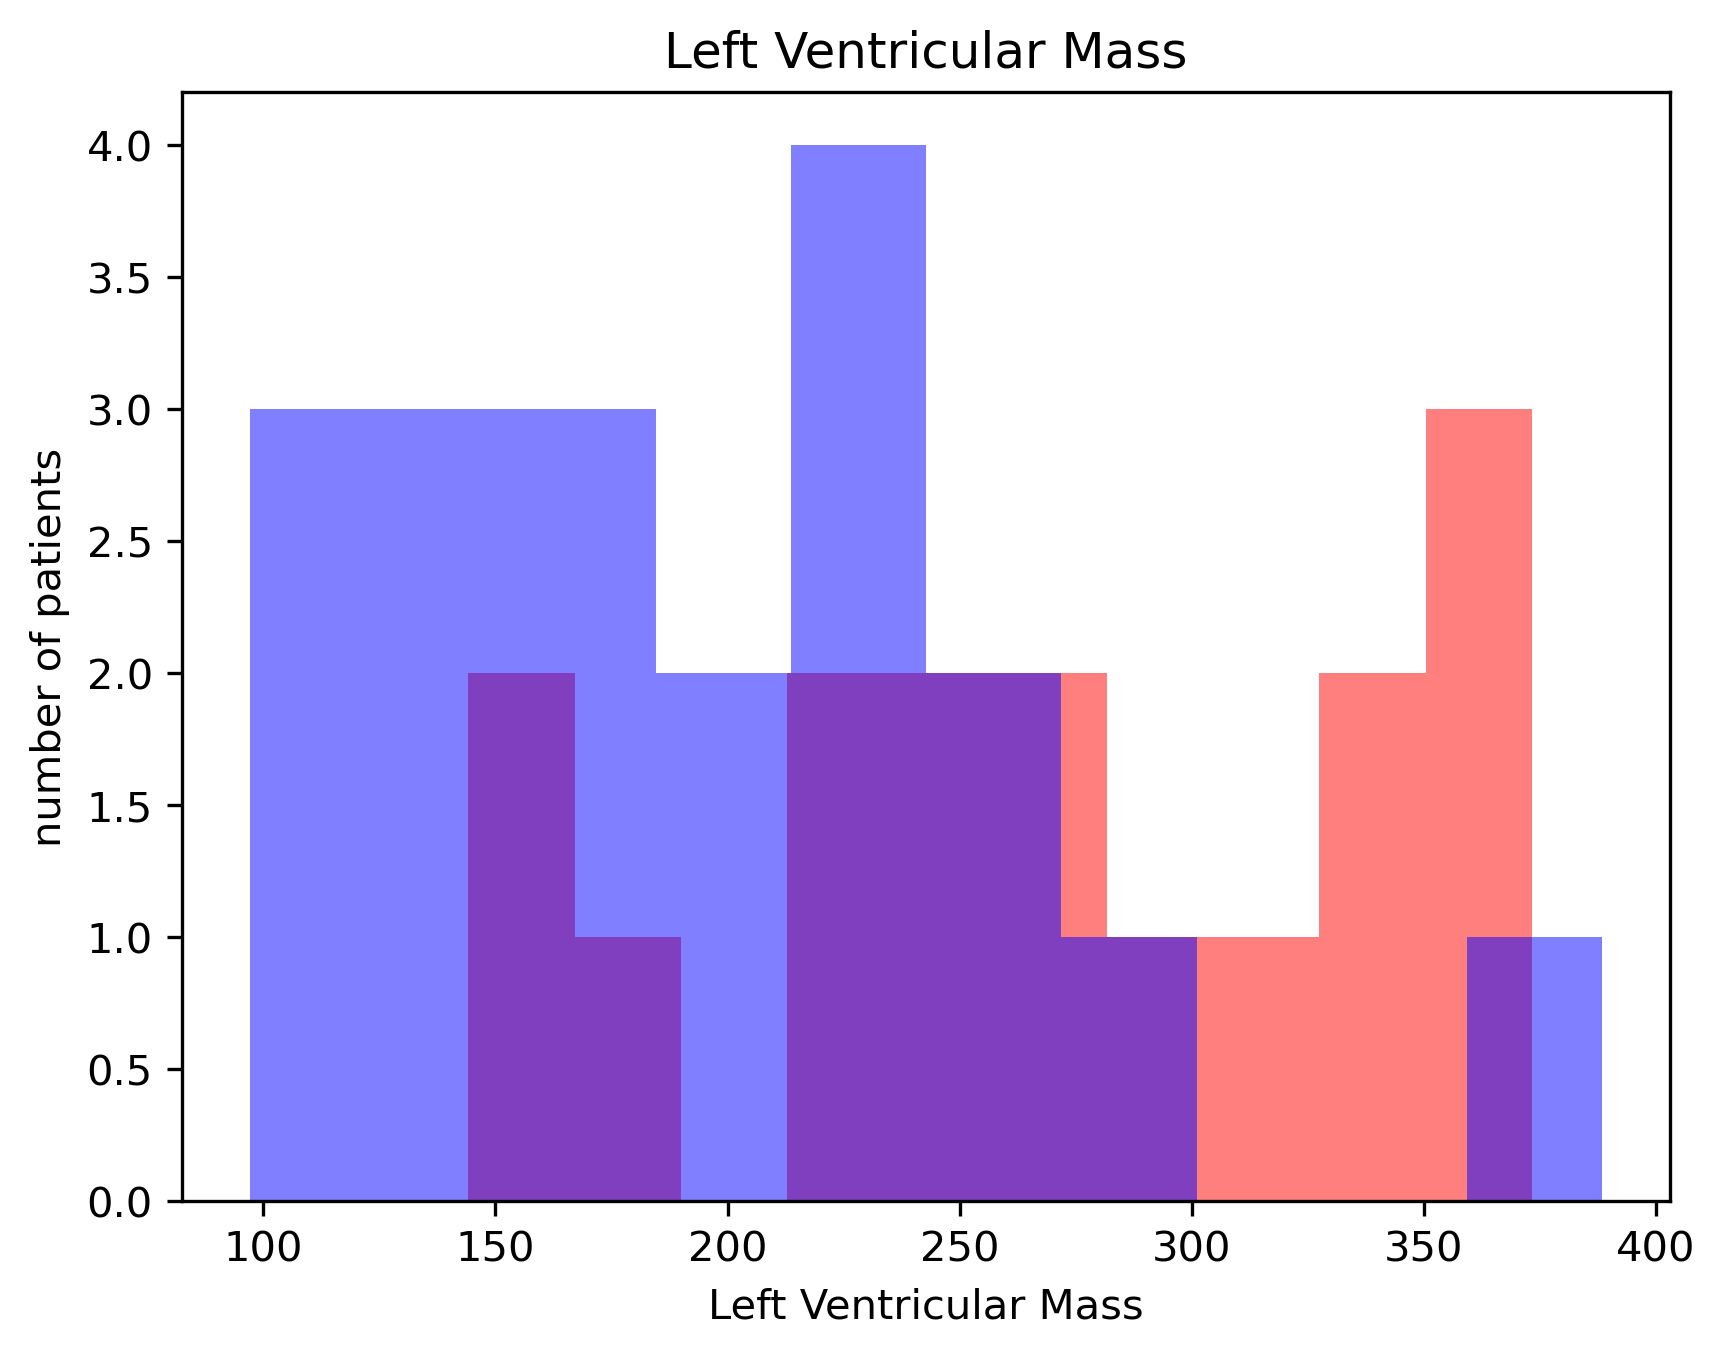

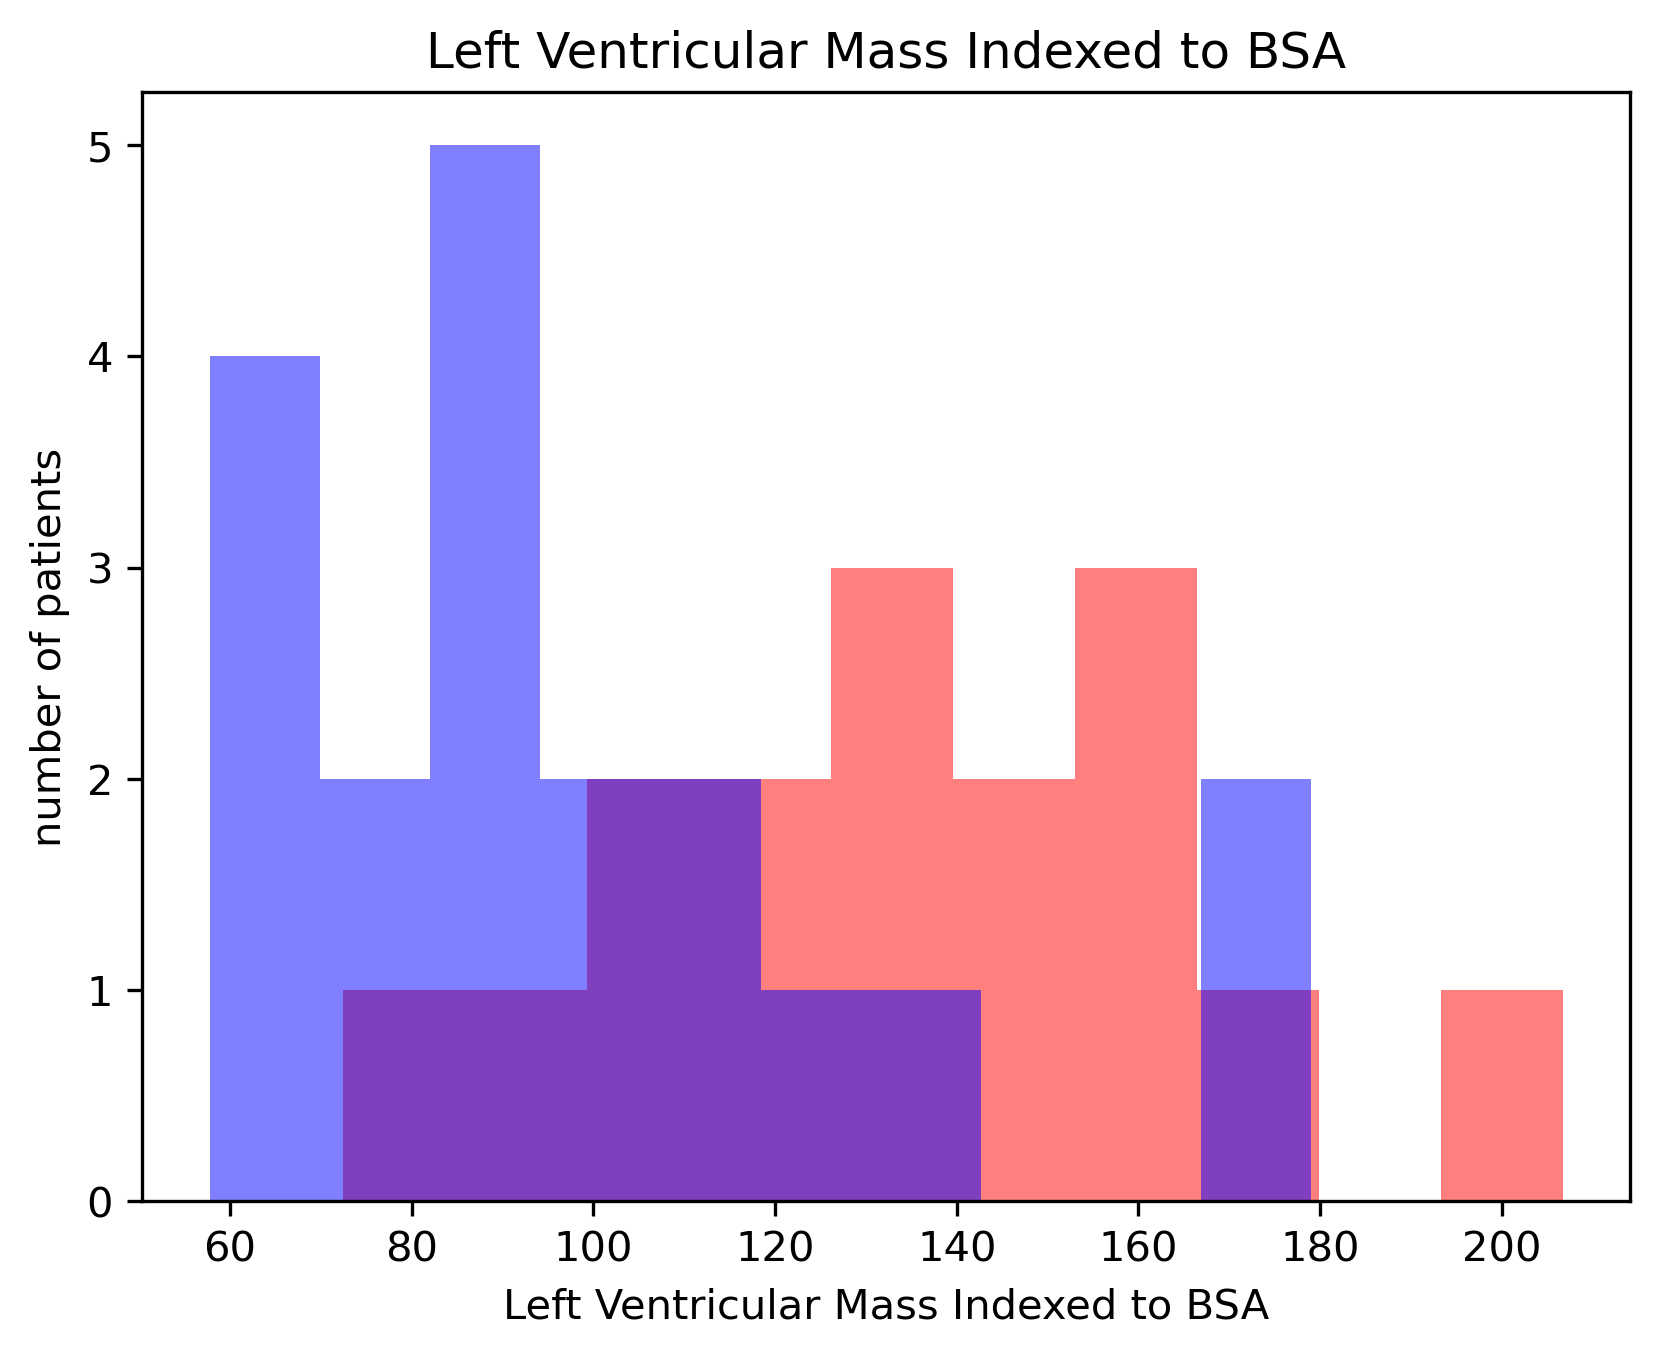

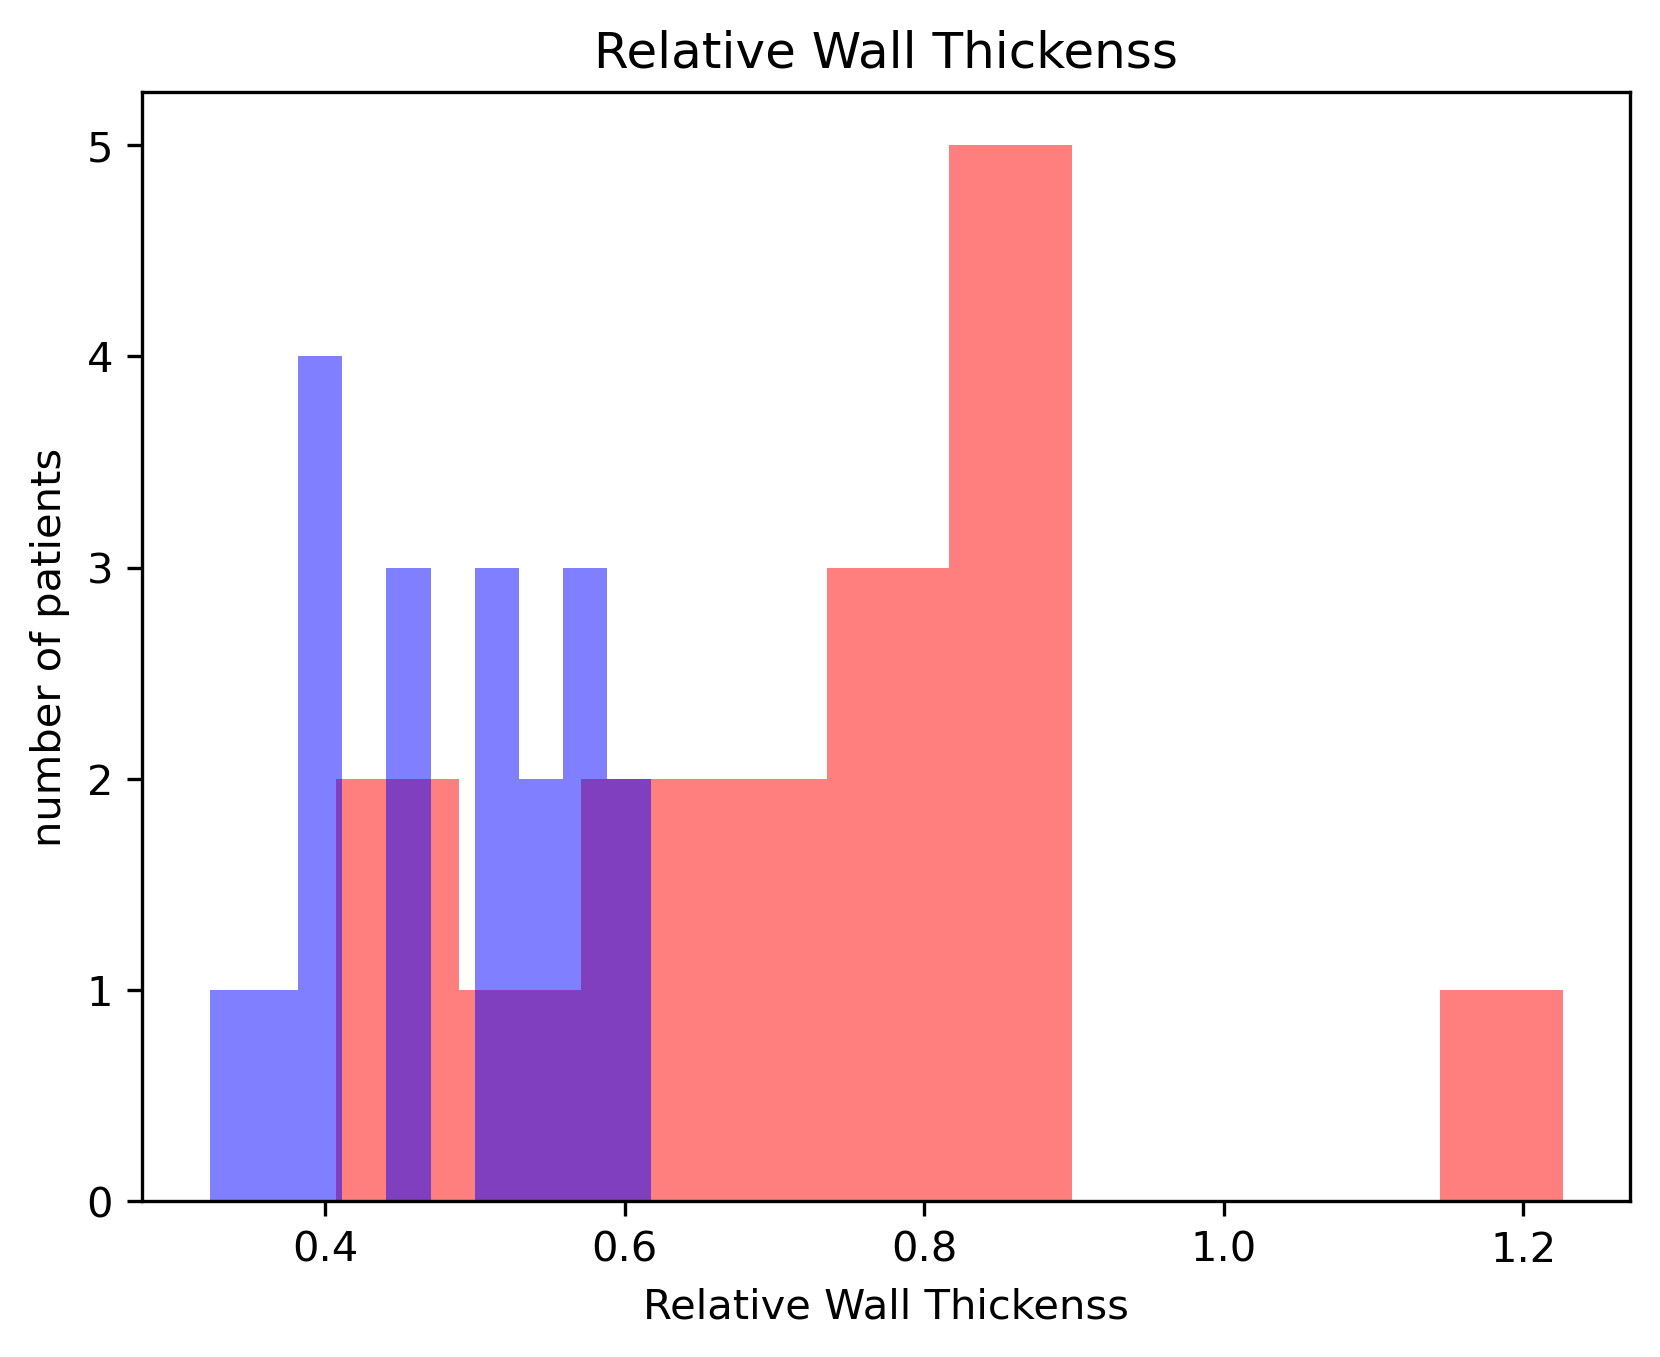

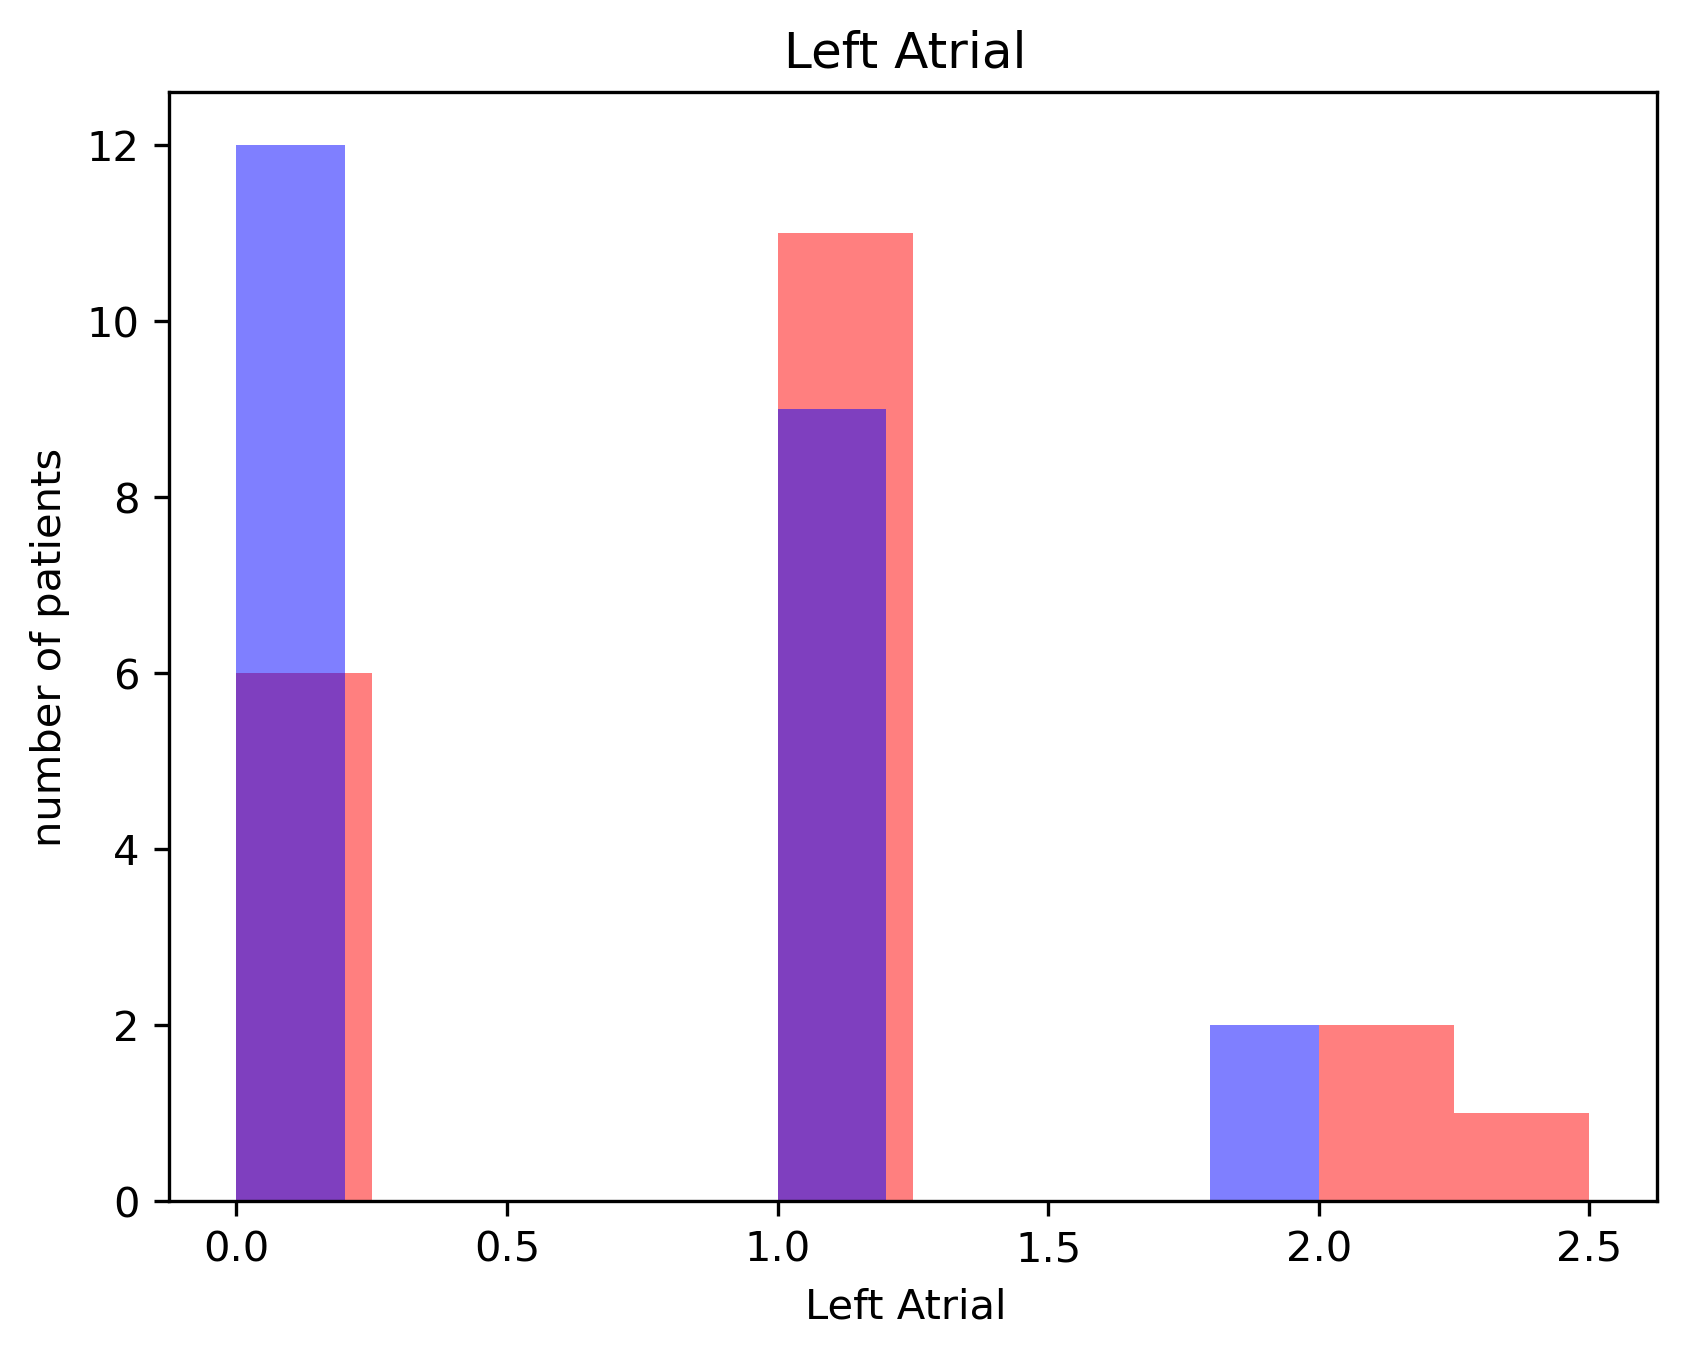

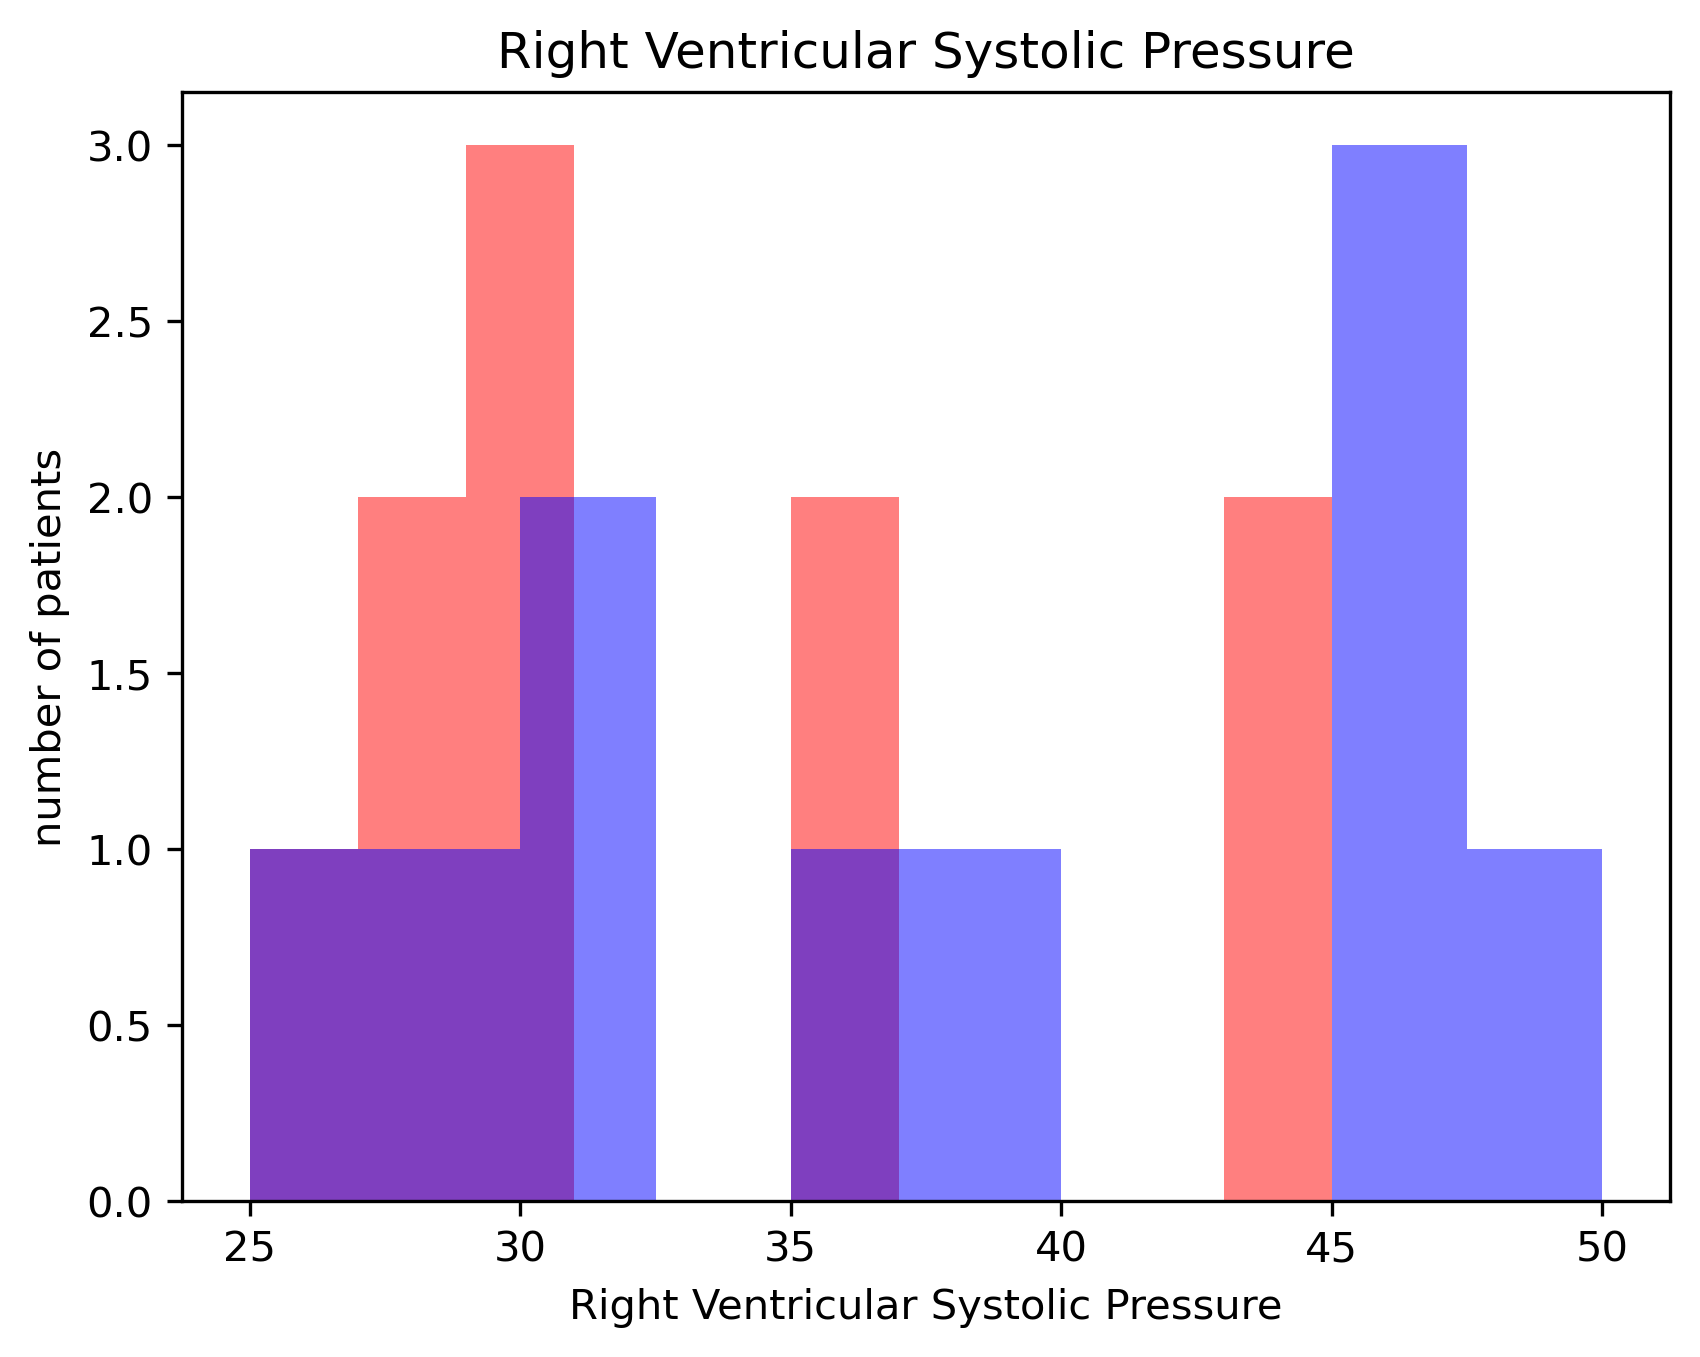

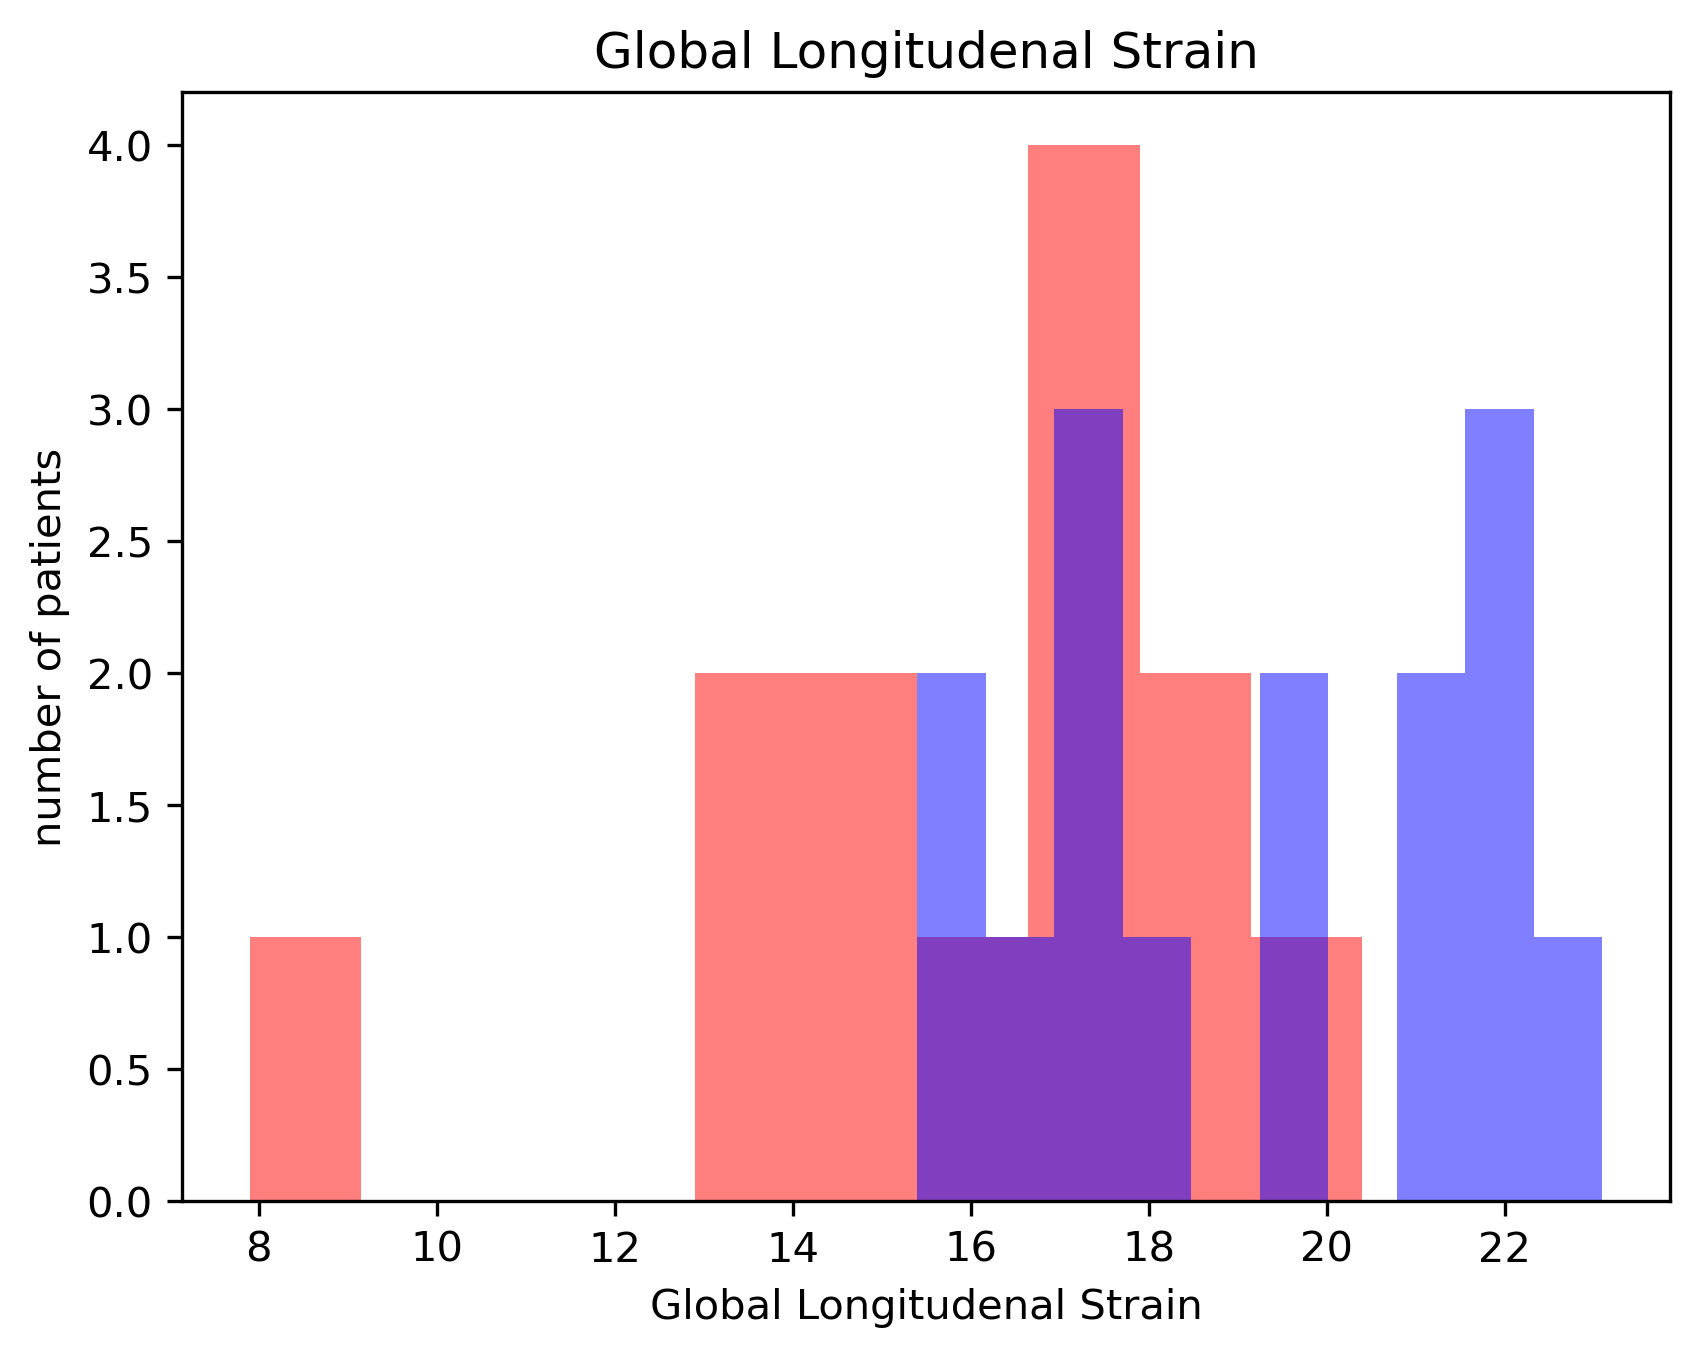

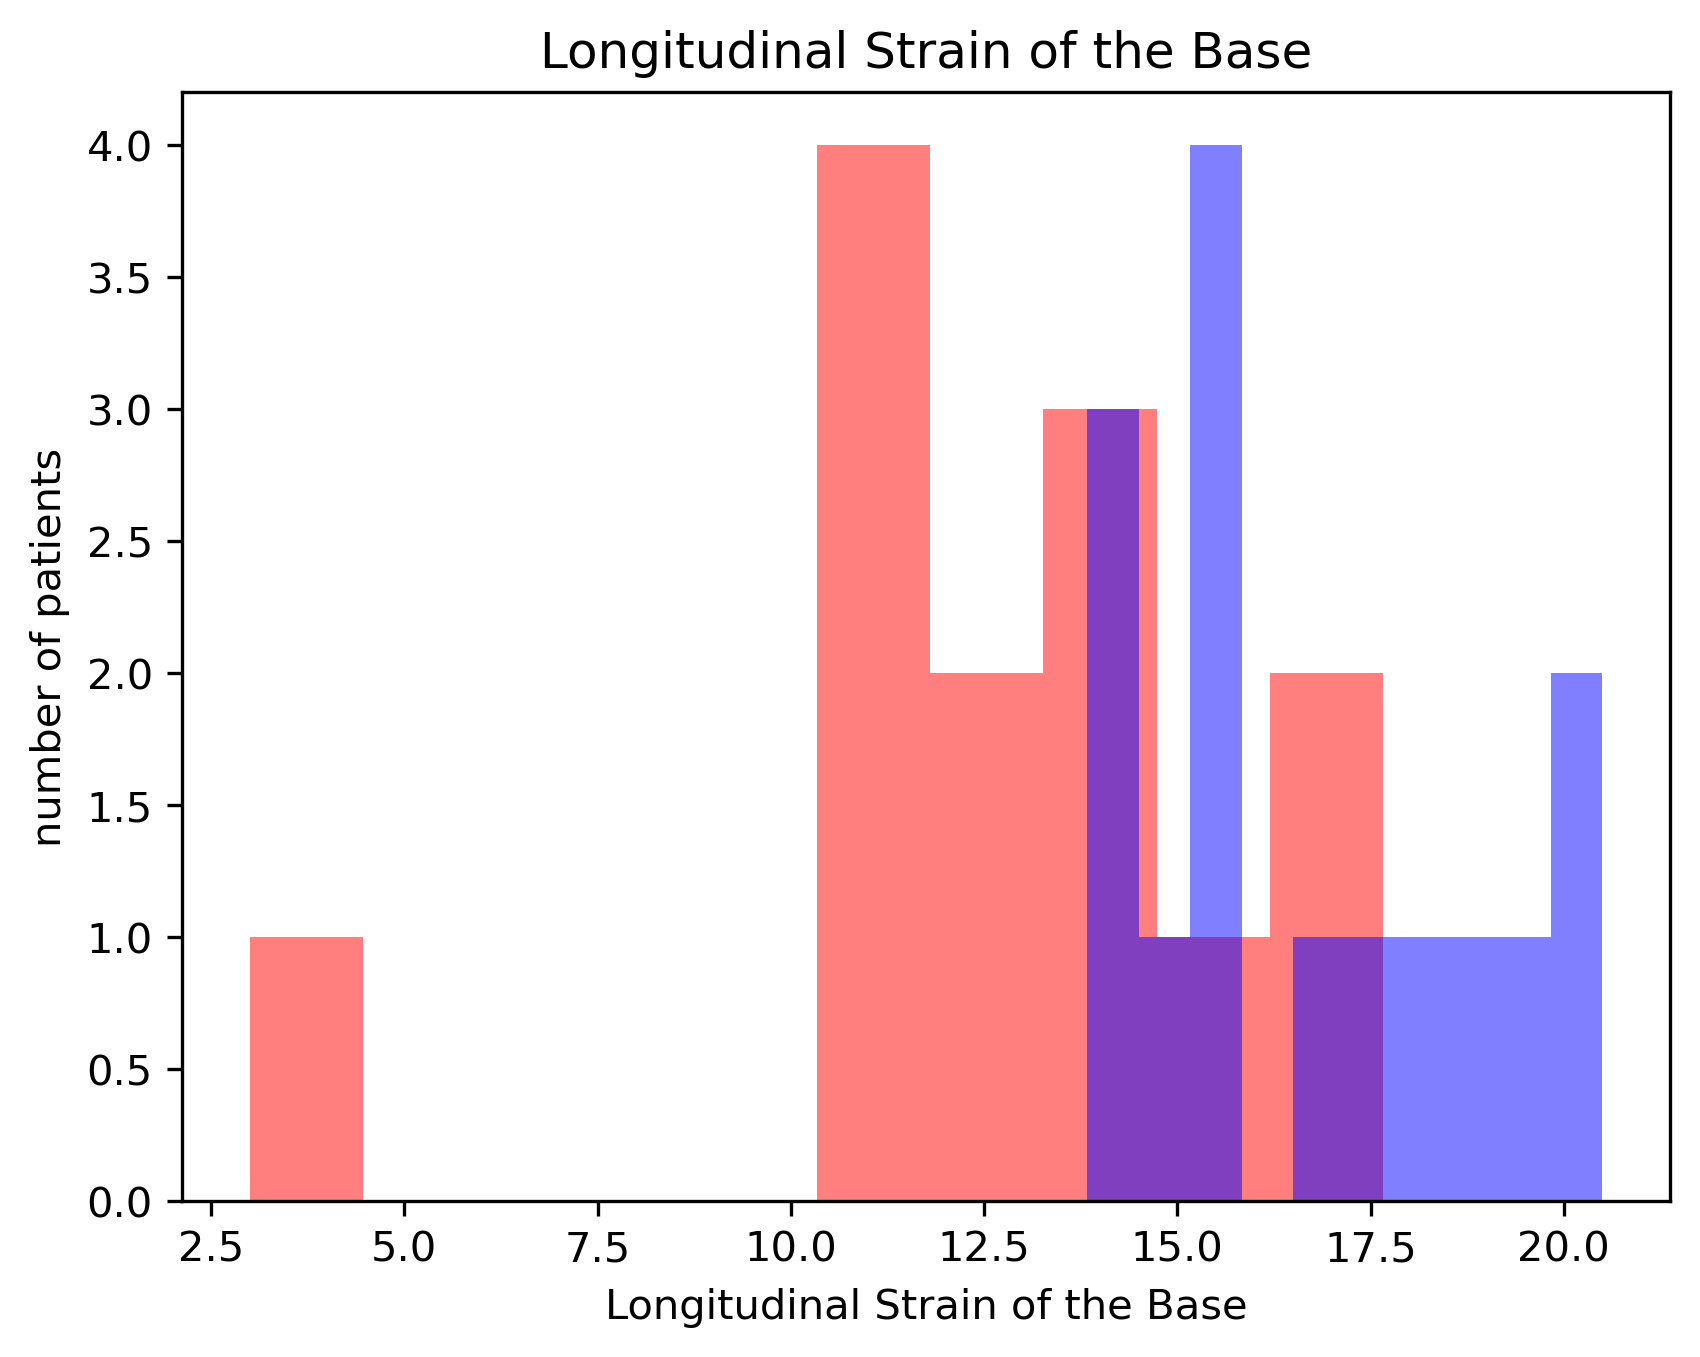

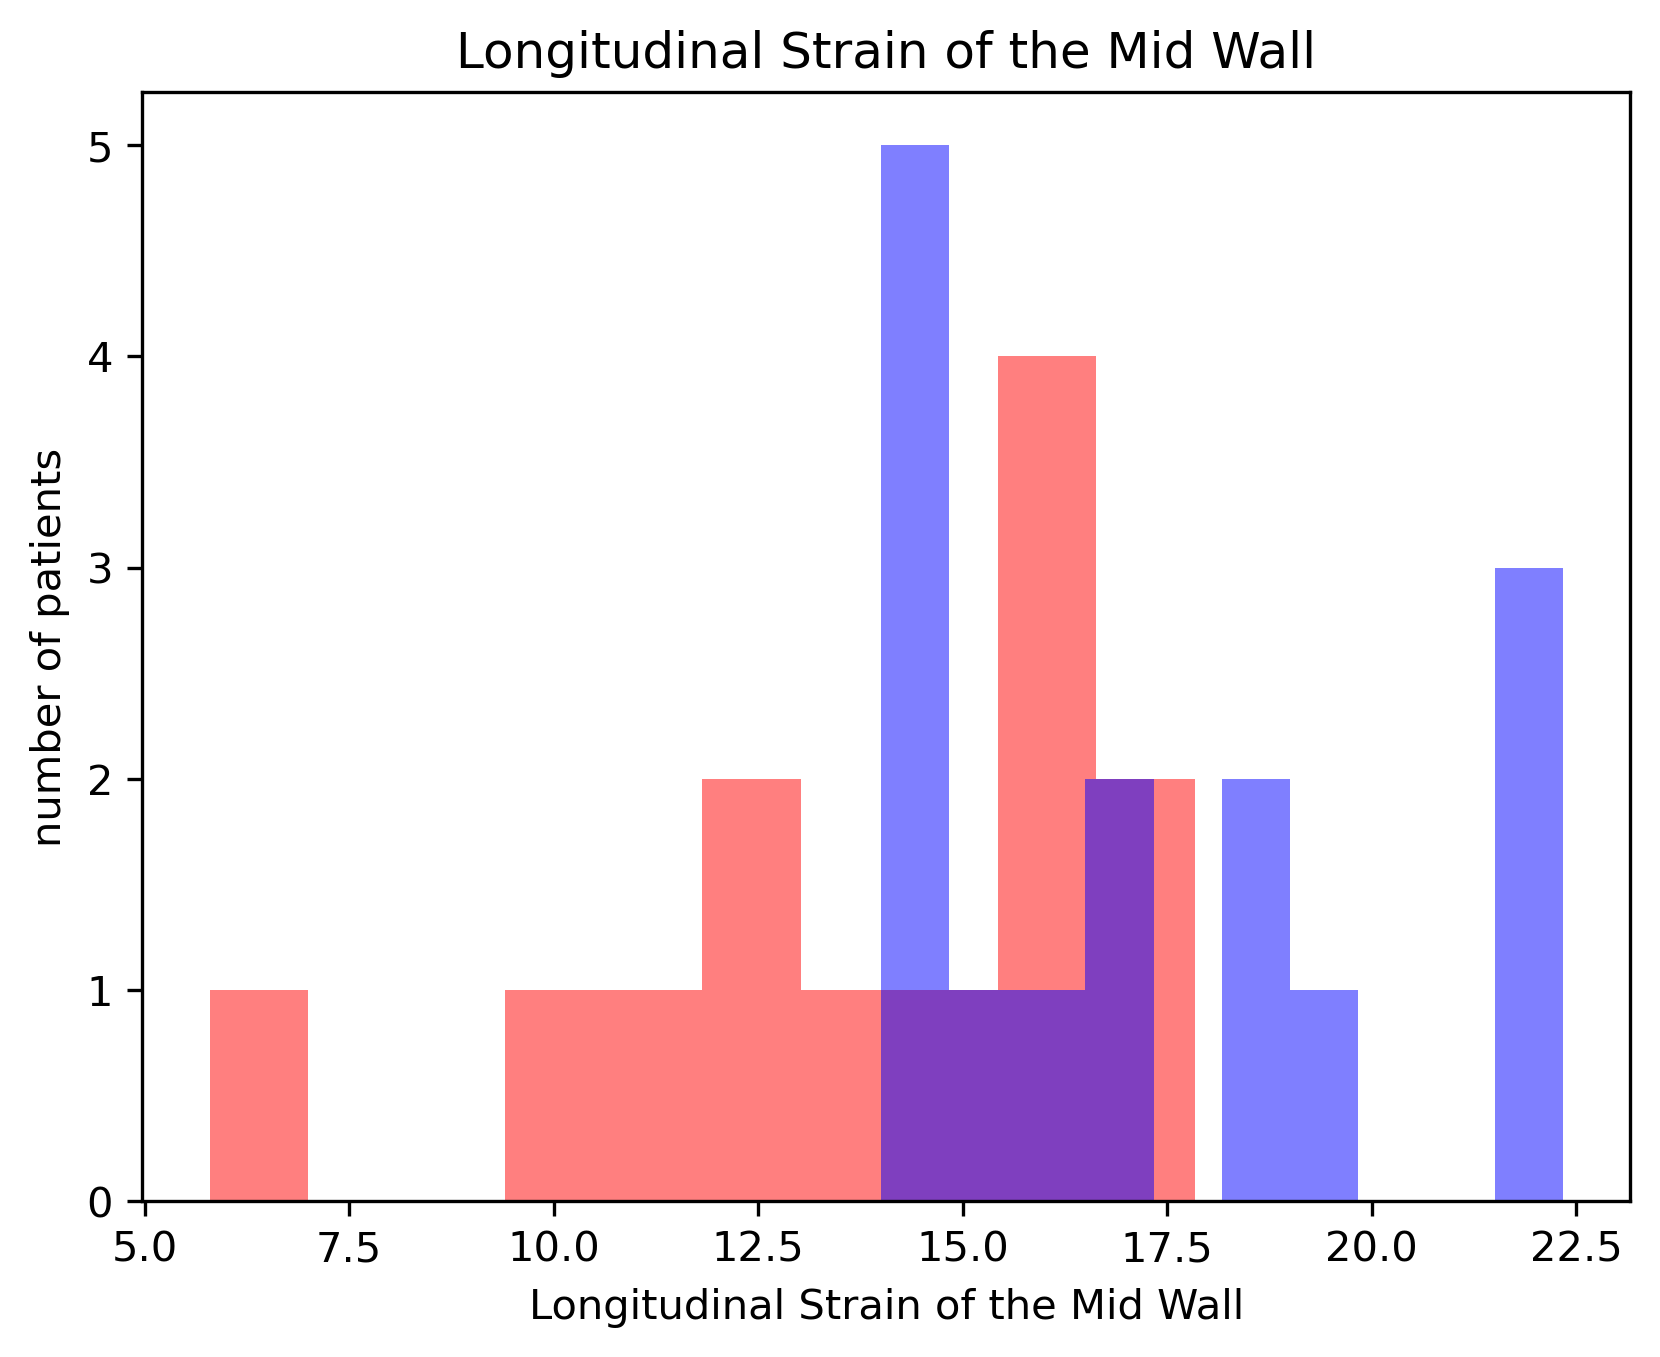

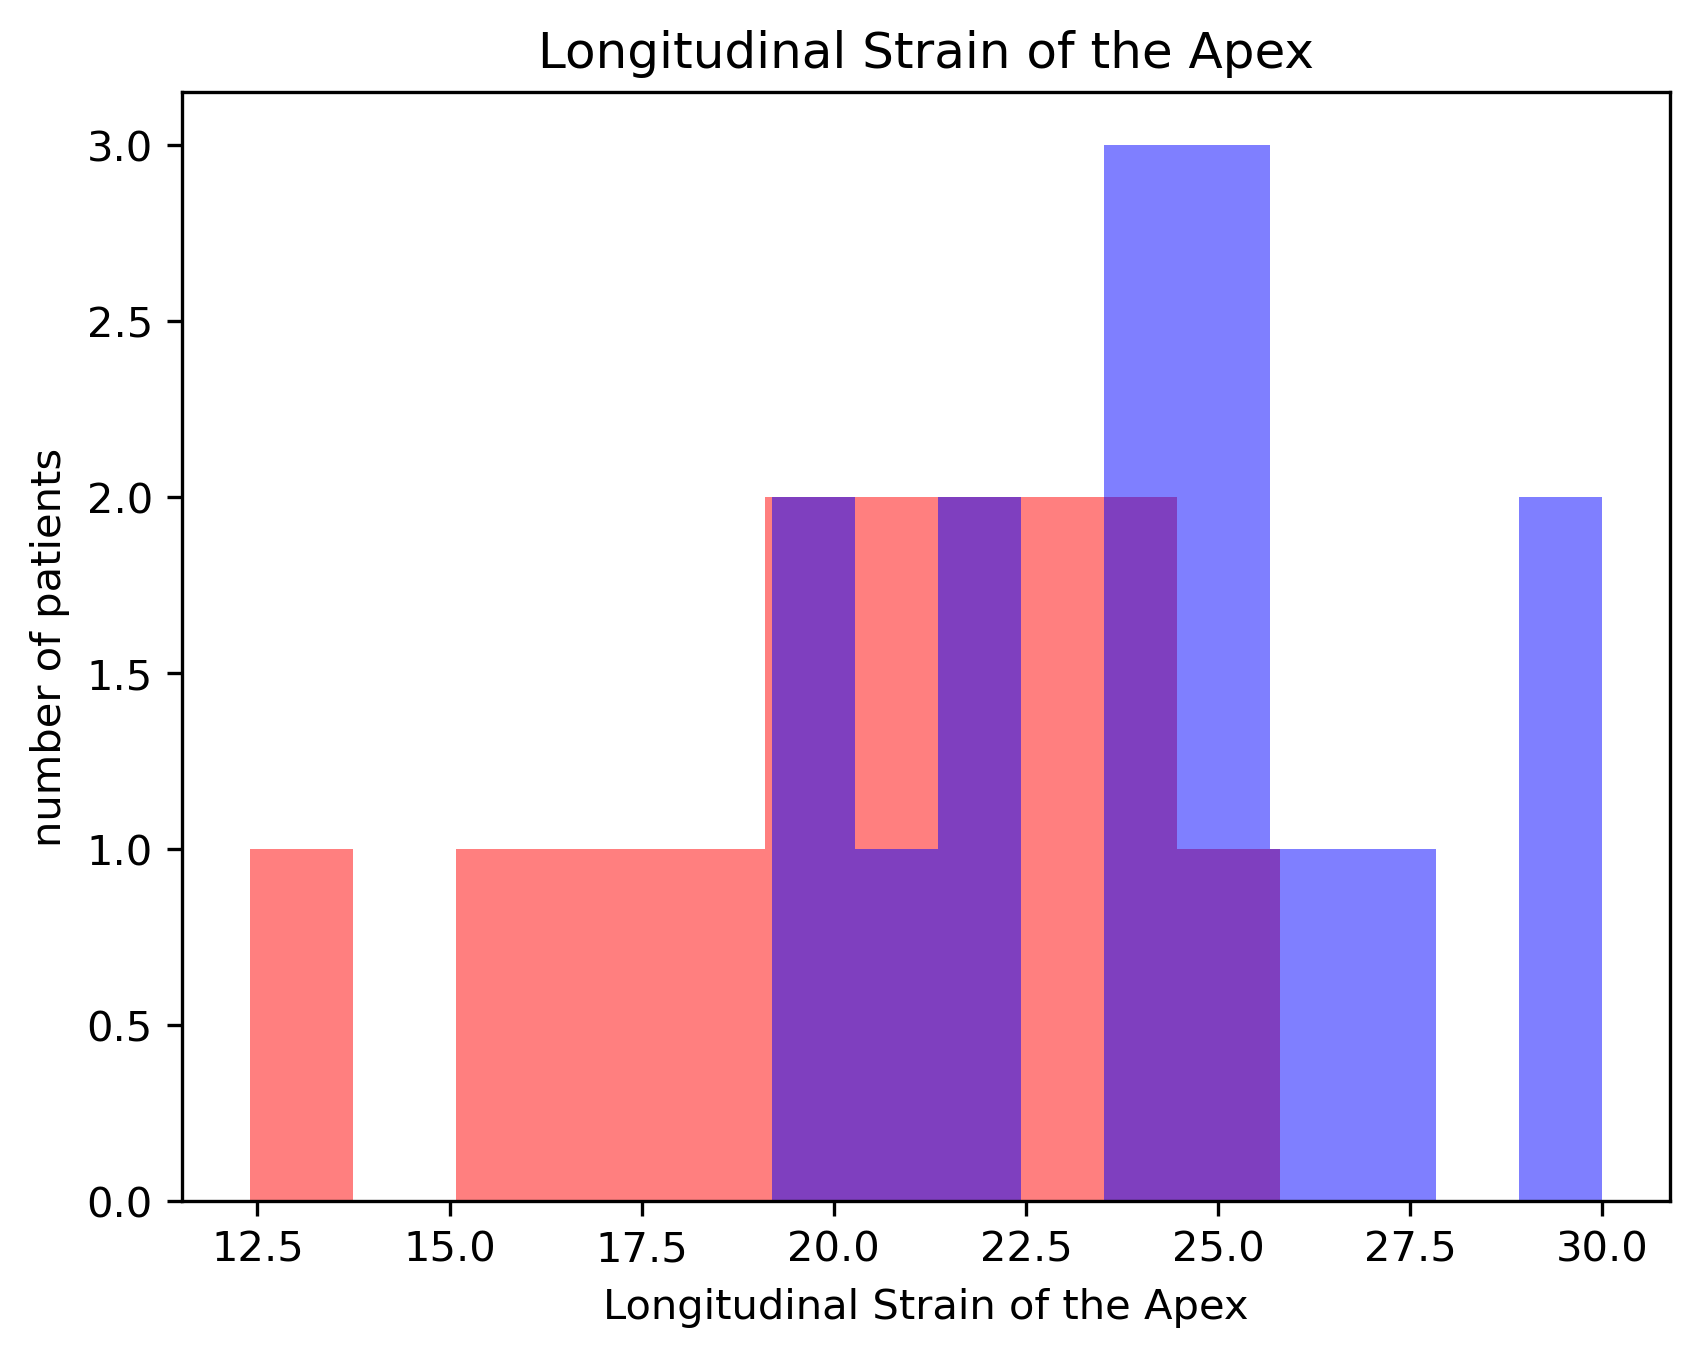

In [59]:
for measure in dict_echoMeasuresNames.keys(): 
        
    fig, ax = plt.subplots()
    ax.hist(test_EchoMeasures.loc[listPositive][measure], color = 'red', alpha = 0.5)
    ax.hist(test_EchoMeasures.loc[listNegative][measure], color = 'blue', alpha = 0.5)
    plt.title(dict_echoMeasuresNames[measure])
    ax.set_ylabel("number of patients")
    ax.set_xlabel(dict_echoMeasuresNames[measure])
    fig_file_out = ptFn.outputFiguresPath(fileName_header="EchoMeasure_hist_", fileName_mid=measure, fileExtension= ".jpg",
                                 fileName_suff= fileNameSuffix, parent_dir=outputDir, folderName=folder_data_out)
    fig.savefig(fig_file_out, bbox_inches = "tight")

## looking at standard scalar

In [60]:
EchoMeasures_forStandardScalar

Unnamed: 0  DeID amyloid  AGE  time from diagnosis to BEG_DT_TM  \
DeID                                                                    
B-02          27  B-02     yes   49                          4.433333   
C-03          54  C-03     yes   59                          7.400000   
E-01           4  E-01     yes   53                         41.266667   
E-02          30  E-02     yes   65                          4.600000   
F-03          57  F-03     yes   65                         45.300000   
G-02          32  G-02     yes   37                          4.366667   
I-01           8  I-01     yes   56                          8.333333   
I-03          60  I-03     yes   67                          1.633333   
J-02          35  J-02     yes   68                          0.900000   
K-02          36  K-02     yes   68                          0.366667   
M-02          38  M-02     yes   71                         10.466667   
N-03          65  N-03     yes   69                          2.066667   
O-03          66  O-03     yes   72                          7.233333   
Q-02          42  Q-02     yes   71                         17.533333   
Q-03          68  Q-03     yes   41                          0.700000   
T-01          19  T-01     yes   71                          2.000000   
V-02          47  V-02     yes   83                         50.300000   
W-01          22  W-01     yes   57                          1.666667   
X-01          23  X-01     yes   80                         -0.533333   
X-02          49  X-02     yes   65                         23.033333   
Y-02          50  Y-02     yes   57                          3.833333   
A-02          26  A-02      no   74                          6.800000   
B-03          53  B-03      no   44                          8.333333   
C-01           2  C-01      no   56                          1.900000   
C-02          28  C-02      no   59                          2.033333   
E-03          56  E-03      no   63                          4.466667   
F-01           5  F-01      no   66                        143.166667   
G-03          58  G-03      no   69                          1.533333   
H-01           7  H-01      no   57                          3.933333   
H-02          33  H-02      no   65                          3.200000   
M-01          12  M-01      no   52                         56.966667   
N-01          13  N-01      no   79                          0.633333   
N-02          39  N-02      no   76                          1.900000   
P-01          15  P-01      no   80                         39.566667   
P-02          41  P-02      no   65                          8.433333   
Q-01          16  Q-01      no   58                         10.566667   
R-01          17  R-01      no   68                          4.700000   
R-03          69  R-03      no   63                          5.266667   
S-02          44  S-02      no   69                          0.300000   
T-02          45  T-02      no   61                          3.566667   
V-01          21  V-01      no   66                          5.800000   
W-02          48  W-02      no   72                          5.366667   
Y-01          24  Y-01      no   59                          1.133333   
Z-01          25  Z-01      no   72                         -0.333333   

                                                 REASON  \
DeID                                                      
B-02                                r/o cardiac amyloid   
C-03                       F/up for cardiac amyloidosis   
E-01  amylodosis, with cardiac inv. has cards wants ...   
E-02                                R/O Cardiac Amyloid   
F-03                                    Cardiac Amyloid   
G-02  possible cardiac amyloidosis and after startin...   
I-01         cardiac amyloidosis f/u vol status and BMP   
I-03           Amyloidosis patient - please r/o Cardiac   
J-02                                        r/o amyloid  

KeyError: "None of [Index(['B-02', 'C-03', 'E-01', 'E-02', 'F-03', 'G-02', 'I-01', 'I-03', 'J-02',\n       'K-02', 'M-02', 'N-03', 'O-03', 'Q-02', 'Q-03', 'T-01', 'V-02', 'W-01',\n       'X-01', 'X-02', 'Y-02'],\n      dtype='object')] are in the [columns]"

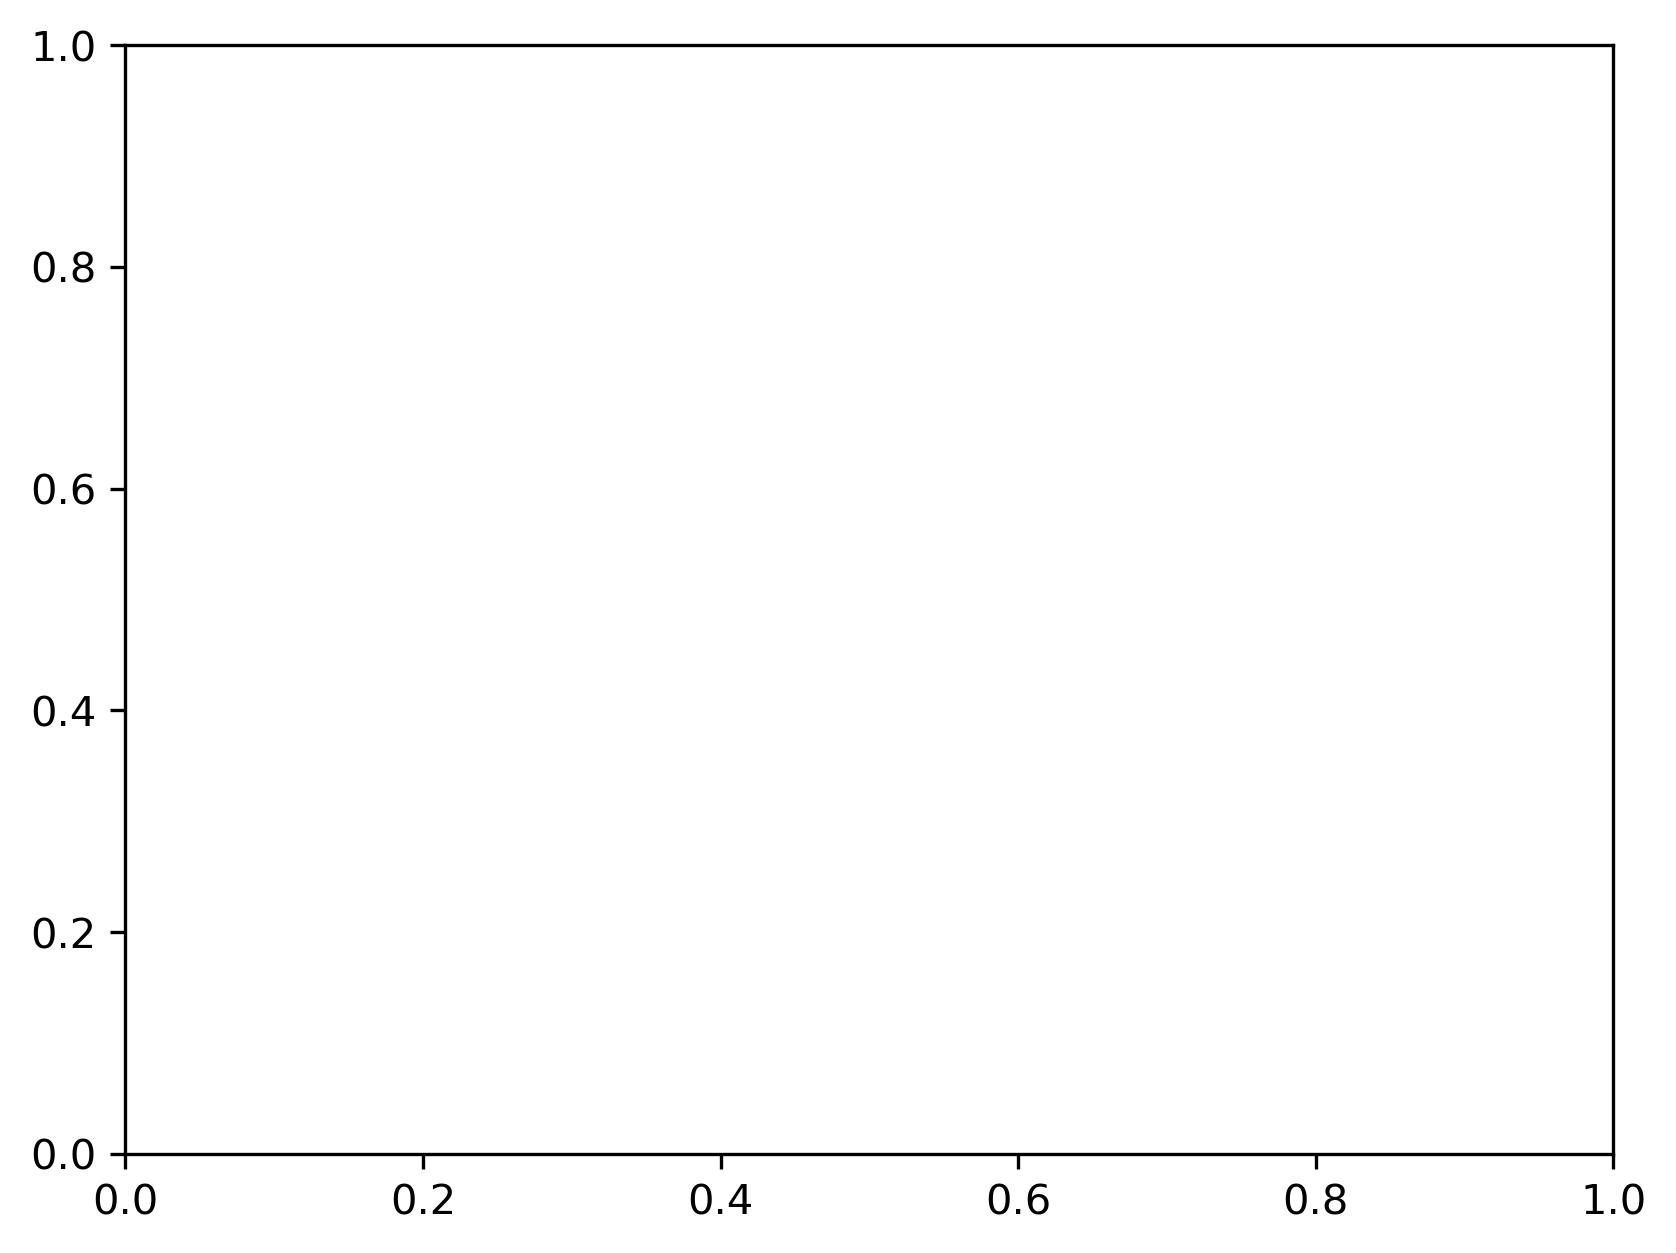

In [61]:
#plotting the data as histograms? or bee swarm using the standard scalar
fig, axs = plt.subplots()

sns.swarmplot(EchoMeasures_StandardScalar_df[listPositive], color = 'red',  orient = 'h', size= 2)
# sns.swarmplot(EchoAdj_StandardScalar_df.loc[listNegative], color = 'blue', orient = 'h', size = 2)
# sns.boxplot(EchoAdj_StandardScalar_df.loc[listNegative], color= 'blue', orient ='h')
# sns.boxplot(EchoAdj_StandardScalar_df.loc[listPositive], color= 'red',orient ='h')

# axs.axvline(0, color=".3", dashes=(2, 2))

# fig_file_out = ptFn.outputFiguresPath(fileName_header="EchoAdj", fileName_mid="swarmplot", fileExtension= ".jpg",
#                                  fileName_suff= fileNameSuffix, parent_dir=outputDir, folderName=folder_data_out)
# plt.title("Distribution of Lab Values Adjacent to Diagnostic Imaging")
# fig.savefig(fig_file_out, bbox_inches = "tight")

# Sections of dataframes using the selected features

In [63]:
#import the feature list for the best performing models
selectedFeaturesList = pd.read_excel("ComparingRBFvLinear_20241118_v1.xlsx", sheet_name= "linearforpaper3", header = [0]).T

In [64]:
selectedFeaturesList.index

Index(['EchoAdj', 'DescOnly', 'ParamsOnly', 'DescFits'], dtype='object')

In [ ]:
#going to need to drop things like units, Result, Desc... correct spelling of intercept, remove extra spaces
columns_DescFits = DescFitsFeatures.columns

adjustedColumnNames = list(columns_DescFits)
for i in range(len(adjustedColumnNames)):
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("(k/uL)", "")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("(U/L)", "")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("(ng/mL)", "")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("(mg/dL)", "")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("(mmol/L)", "")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("(gm/dL)", "")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("(pg)", "")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("(B-Type Natriuretic Peptide)", "")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("intercpet", "intercept")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("Result", "")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("Desc", "")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("   ", " ")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("  ", " ")
print(adjustedColumnNames)
DescFitsFeatures.columns = adjustedColumnNames

['Amyloid Status_no', 'Amyloid Status_unk', 'Amyloid Status_yes', 'Dx_MGUS', 'Dx_MM', 'Dx_other', 'Sex_female', 'Sex_male', 'Age', 'Survival (in months)', 'ALT count', 'ALT mean', 'ALT std', 'ALT min', 'ALT 25%', 'ALT 50%', 'ALT 75%', 'ALT max', 'AST count', 'AST mean', 'AST std', 'AST min', 'AST 25%', 'AST 50%', 'AST 75%', 'AST max', 'Albumin Electrophoresis count', 'Albumin Electrophoresis mean', 'Albumin Electrophoresis std', 'Albumin Electrophoresis min', 'Albumin Electrophoresis 25%', 'Albumin Electrophoresis 50%', 'Albumin Electrophoresis 75%', 'Albumin Electrophoresis max', 'Albumin count', 'Albumin mean', 'Albumin std', 'Albumin min', 'Albumin 25%', 'Albumin 50%', 'Albumin 75%', 'Albumin max', 'BUN count', 'BUN mean', 'BUN std', 'BUN min', 'BUN 25%', 'BUN 50%', 'BUN 75%', 'BUN max', 'Beta-2-Microglobulin count', 'Beta-2-Microglobulin mean', 'Beta-2-Microglobulin std', 'Beta-2-Microglobulin min', 'Beta-2-Microglobulin 25%', 'Beta-2-Microglobulin 50%', 'Beta-2-Microglobulin 75%',

## DescFits selected features

In [86]:
descFits_selected_positive = DescFitsFeatures.loc[listPositive][selectedFeaturesList.loc["DescFits"].dropna()]
descFits_selected_negative = DescFitsFeatures.loc[listNegative][selectedFeaturesList.loc["DescFits"].dropna()]

# transposed_positiveEchoData = positiveEchoData.T
# transposed_negativeEchoData = negativeEchoData.T

ptFn.outputToExcel(descFits_selected_positive.T, fileName_header="DataTrans", fileName_Common= "_descFits_selected", 
              fileName_suffix= fileNameSuffix, parent_dir=outputDir, folderName = folder_data_out, sheetName= "pos")
ptFn.outputToExcel(descFits_selected_negative.T, fileName_header="DataTrans", fileName_Common= "_descFits_selected", 
              fileName_suffix= fileNameSuffix, parent_dir= outputDir, folderName = folder_data_out, sheetName= "neg")

## DescOnly selected features

In [87]:
descOnly_selected_positive = DescFitsFeatures.loc[listPositive][selectedFeaturesList.loc["DescOnly"].dropna()]
descOnly_selected_negative = DescFitsFeatures.loc[listNegative][selectedFeaturesList.loc["DescOnly"].dropna()]

# transposed_positiveEchoData = positiveEchoData.T
# transposed_negativeEchoData = negativeEchoData.T

ptFn.outputToExcel(descOnly_selected_positive.T, fileName_header="DataTrans", fileName_Common= "_descOnly_selected", 
              fileName_suffix= fileNameSuffix, parent_dir=outputDir, folderName = folder_data_out, sheetName= "pos")
ptFn.outputToExcel(descOnly_selected_negative.T, fileName_header="DataTrans", fileName_Common= "_descOnly_selected", 
              fileName_suffix= fileNameSuffix, parent_dir= outputDir, folderName = folder_data_out, sheetName= "neg")

In [81]:
os.getcwd()

'C:\\Users\\mcremer\\UFL Dropbox\\Maegan Cremer\\research-share\\Maegan\\Projects\\Cardiac-Amyloidosis-Multiple-Myeloma\\014_Mistic2'

In [ ]:
#all descOnly features

descOnlyInput = pd.read_excel("020_construction of data frames\DFsForSVM_CompLabswoEcho_descOnly_20241018_v1\Features_descOnly_ 2024-10-28.xlsx", sheet_name= "ALL")
descOnlyInput.index = descOnlyInput["DeID"]

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\mcremer\AppData\Local\Temp\ipykernel_9564\759220086.py:3: SyntaxWarning: invalid escape sequence '\D'
  descOnlyInput = pd.read_excel("020_construction of data frames\DFsForSVM_CompLabswoEcho_descOnly_20241018_v1\Features_descOnly_ 2024-10-28.xlsx", sheet_name= "ALL")


In [109]:
descOnly_all_positive = descOnlyInput.loc[listPositive]
descOnly_all_negative = descOnlyInput.loc[listNegative]

ptFn.outputToExcel(descOnly_all_positive.T, fileName_header="DataTrans", fileName_Common= "_descOnly_all", 
              fileName_suffix= fileNameSuffix, parent_dir=outputDir, folderName = folder_data_out, sheetName= "pos")
ptFn.outputToExcel(descOnly_all_negative.T, fileName_header="DataTrans", fileName_Common= "_descOnly_all", 
              fileName_suffix= fileNameSuffix, parent_dir= outputDir, folderName = folder_data_out, sheetName= "neg")

## ParamsOnly selected features

In [88]:
selectedFeaturesList.loc["ParamsOnly"].dropna()

0                        NT Pro BNP Exp intercept
1                              Pct. Mono Exp coef
2                              total CO2 Exp coef
3              Beta-2-Microglobulin Exp intercept
4                              Chloride Linear R2
5        ECOG Performance Status Linear intercept
6                                 Monocyte Exp R2
7                              Monocyte Linear R2
8                           total CO2 Linear coef
9                                 ALT Linear coef
10                                   MCV Exp coef
11              Total Serum Protein Exp intercept
12                        Sodium Linear intercept
13                           Sodium Exp intercept
14     Pct. Immature Gran Auto Exp residual error
15                         Ferritin Exp intercept
16                                MCV Linear coef
17                              Creatinine Exp R2
18                           Ferritin Linear coef
19    Serum Electrophoresis Alpha 2 Exp intercept


In [89]:
paramsOnly_selected_positive = DescFitsFeatures.loc[listPositive][selectedFeaturesList.loc["ParamsOnly"].dropna()]
paramsOnly_selected_negative = DescFitsFeatures.loc[listNegative][selectedFeaturesList.loc["ParamsOnly"].dropna()]

# transposed_positiveEchoData = positiveEchoData.T
# transposed_negativeEchoData = negativeEchoData.T

ptFn.outputToExcel(paramsOnly_selected_positive.T, fileName_header="DataTrans", fileName_Common= "_paramsOnly_selected", 
              fileName_suffix= fileNameSuffix, parent_dir=outputDir, folderName = folder_data_out, sheetName= "pos")
ptFn.outputToExcel(paramsOnly_selected_negative.T, fileName_header="DataTrans", fileName_Common= "_paramsOnly_selected", 
              fileName_suffix= fileNameSuffix, parent_dir= outputDir, folderName = folder_data_out, sheetName= "neg")

In [90]:
#all paramsOnly features arranged for graphpad
paramsFeaturesInput = pd.read_excel("020_construction of data frames\DFsForSVM_CompLabswoEcho_paramsOnly_MDfits_20241018_v1\Features_paramsOnly_2024-10-18.xlsx", sheet_name="ALL")
paramsFeaturesInput.index = paramsFeaturesInput["DeID"]

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\mcremer\AppData\Local\Temp\ipykernel_16852\3235985466.py:2: SyntaxWarning: invalid escape sequence '\D'
  paramsFeaturesInput = pd.read_excel("020_construction of data frames\DFsForSVM_CompLabswoEcho_paramsOnly_MDfits_20241018_v1\Features_paramsOnly_2024-10-18.xlsx", sheet_name="ALL")


In [91]:
paramsOnly_all_positive = paramsFeaturesInput.loc[listPositive]
paramsOnly_all_negative = paramsFeaturesInput.loc[listNegative]

# transposed_positiveEchoData = positiveEchoData.T
# transposed_negativeEchoData = negativeEchoData.T

ptFn.outputToExcel(paramsOnly_all_positive.T, fileName_header="DataTrans", fileName_Common= "_paramsOnly_all", 
              fileName_suffix= fileNameSuffix, parent_dir=outputDir, folderName = folder_data_out, sheetName= "pos")
ptFn.outputToExcel(paramsOnly_all_negative.T, fileName_header="DataTrans", fileName_Common= "_paramsOnly_all", 
              fileName_suffix= fileNameSuffix, parent_dir= outputDir, folderName = folder_data_out, sheetName= "neg")

## EchoAdj selected features

In [93]:
#going to need to drop things like units, Result, Desc... correct spelling of intercept, remove extra spaces
columns_EchoAdj = EchoAdjInput.columns

adjustedColumnNames = list(columns_EchoAdj)
for i in range(len(adjustedColumnNames)):
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("(k/uL)", "")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("(U/L)", "")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("(ng/mL)", "")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("(mg/dL)", "")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("(mmol/L)", "")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("(gm/dL)", "")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("(pg)", "")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("(B-Type Natriuretic Peptide)", "")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("intercpet", "intercept")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("Result", "")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("Desc", "")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("   ", " ")
    adjustedColumnNames[i] = adjustedColumnNames[i].replace("  ", " ")
print(adjustedColumnNames)
EchoAdjInput.columns = adjustedColumnNames


['Amyloid Status_no', 'Amyloid Status_unk', 'Amyloid Status_yes', 'Dx_MGUS', 'Dx_MM', 'Dx_other', 'Sex_female', 'Sex_male', 'Age', 'Survival (in months)', 'ChemoTx', 'ChemoTx Number', 'ImmunoTx', 'ImmunoTx Number', 'HemeTx', 'HemeTx Number', 'RadTx', 'RadTx Number', 'OtherTx', 'OtherTx Number', 'RelTime(Days)', 'ALT ', 'AST ', 'Albumin Electrophoresis ', 'Albumin ', 'BUN ', 'Beta-2-Microglobulin ', 'Calcium ', 'Chloride ', 'Creatinine ', 'Ferritin ', 'Glucose ', 'HCT ', 'Hemoglobin ', 'Kappa Free Light Chains (mg/L)', 'LDH ', 'MCH ', 'MCHC ', 'MCV ', 'Monocyte ', 'Neutrophil ', 'Nucleated RBC ', 'Pct. Immature Gran Auto ', 'Pct. Mono ', 'Pct. Neutrophil ', 'Platelet Count ', 'Potassium ', 'RBC ', 'Serum Electrophoresis Alpha 1 ', 'Serum Electrophoresis Alpha 2 ', 'Serum Electrophoresis Beta ', 'Serum Electrophoresis Gamma ', 'Sodium ', 'Total Serum Protein ', 'WBC ', 'total CO2 ', 'NT Pro BNP ', 'Troponin-T', 'DeID']


In [94]:
EchoAdj_selected_positive = EchoAdjInput.loc[listPositive][selectedFeaturesList.loc["EchoAdj"].dropna()]
EchoAdj_selected_negative = EchoAdjInput.loc[listNegative][selectedFeaturesList.loc["EchoAdj"].dropna()]

# transposed_positiveEchoData = positiveEchoData.T
# transposed_negativeEchoData = negativeEchoData.T

ptFn.outputToExcel(EchoAdj_selected_positive.T, fileName_header="DataTrans", fileName_Common= "_EchoAdj_selected", 
              fileName_suffix= fileNameSuffix, parent_dir=outputDir, folderName = folder_data_out, sheetName= "pos")
ptFn.outputToExcel(EchoAdj_selected_negative.T, fileName_header="DataTrans", fileName_Common= "_EchoAdj_selected", 
              fileName_suffix= fileNameSuffix, parent_dir= outputDir, folderName = folder_data_out, sheetName= "neg")